In [67]:
!pip install pypapago

In [68]:
import pandas as pd
import numpy as np
import os 
import sys 
import urllib.request
import re

import nltk
nltk.download('punkt')

%pip install soynlp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DeepLearning_3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


C:\Users\DeepLearning_3\anaconda3\lib\site-packages\soynlp\tokenizer\_tokenizer.py:19: FutureWarning: Possible nested set at position 13
  ('english & latin', re.compile(u"[a-zA-ZÀ-ÿ]+[[`']?s]*|[a-zA-ZÀ-ÿ]+", re.UNICODE))


In [69]:
Combine = pd.read_csv('./data/all_Combine.csv',encoding='utf-8-sig') 
en_token = pd.read_csv('./data/Combine_EN.csv',encoding='utf-8-sig')
ko_token = pd.read_csv('./data/Combine_KO.csv',encoding='utf-8-sig')
co = pd.read_csv('./data/KO_token.txt',encoding='utf-8') #조사 불용어

In [70]:
reg = re.compile(r'[^ㄱ-ㅣ가-힣]+')

In [71]:
#papago API id, pw
client_id = "U9UBbQtpSbWt6Mzn6WdC"
client_secret = "rHPIy0JgYq"

In [72]:
input_str = input()
ko_response_word = ''
en_response_word = ''
ko_word =input_str
en_word = input_str
if reg.match(input_str):
    print("영어 --> 한글")
    encText = urllib.parse.quote(input_str) 
    data = "source=en&target=ko&text=the " + encText
    url = "https://openapi.naver.com/v1/papago/n2mt"
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request, data=data.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        print(response_body)
        ko_response_word =response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)
else:
    print("한글 --> 영어")
    encText = urllib.parse.quote(input_str) 
    data = "source=ko&target=en&text=" + encText
    url = "https://openapi.naver.com/v1/papago/n2mt"
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request, data=data.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        print(response_body)
        en_response_word =response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)

machine
영어 --> 한글
b'{"message":{"@type":"response","@service":"naverservice.nmt.proxy","@version":"1.0.0","result":{"srcLangType":"en","tarLangType":"ko","translatedText":"\xea\xb8\xb0\xea\xb3\x84","engineType":"N2MT","pivot":null}}}'


In [73]:
# 번역한 것만 추출
if len(ko_response_word)!= 0:
    ko_word = ko_response_word[ko_response_word.index('translatedText')+17:ko_response_word.index('engineType')-3]
if len(en_response_word)!= 0:
    en_word = en_response_word[en_response_word.index('translatedText')+17:en_response_word.index('engineType')-3]

In [74]:
en_word =en_word.lower()
print(ko_word)
print(en_word)

기계
machine


In [80]:
#조사 없애기
string_list=co['KO'].tolist()

clean_words = [] 
for word in nltk.tokenize.word_tokenize(ko_word):
    if word not in string_list: #불용어 제거
        clean_words.append(word)
print(clean_words)
ko_word = ''.join(clean_words)        
print(ko_word) 

['기계']
기계


In [85]:
search = Combine
result_ko = search[search['NM_KO'].str.contains(ko_word, na=False)]
#for index in result_ko['NM_KO']:
  #print(index)
result_en = search[search['NM_EN'].str.contains(en_word, na=False)]
result_en = result_en.drop_duplicates(['NM_EN'])
result_en

Unnamed: 0      HSCODE  HSCODE_6  \
9359        35184  2710197250    271019   
11255        8920  3004909400    300490   
17048       14041  3926300000    392630   
17205       14177  3926300000    392630   
17285       14498  3926901000    392690   
...           ...         ...       ...   
40084       33804  9506990000    950699   
40115       33847  9508900000    950890   
40147       33878  9603290000    960329   
40166       40279  9603500000    960350   
40229       40311  9612102000    961210   

                                                   NM_EN  LVL  LVL1_CD  \
9359                          refrigerating machine oil   4.0     27.0   
11255  antismoking containing ginsengstop smoking mac...  NaN      NaN   
17048  other articles plastics use machinery tgate ha...  NaN      NaN   
17205  other parts plastic use machinery bhdecoreatio...  NaN      NaN   
17285   other articles plastics use machinery clip stre   NaN      NaN   
...                                                  ...  ...      ...   
40084                         sline line health machine   NaN      NaN   
40115                                     rodeo machine   NaN      NaN   
40147                      brush manual washing machine   NaN      NaN   
40166  other brushes constituting parts machines appl...  4.0     96.0   
40229                                     edps machines   4.0     96.0   

                                              LVL1_NM_EN      LVL1_NM_KO  \
9359   Chapter 27 Mineral fuels,mineral oils and prod...  제27류 광물성연료,에너지   
11255                                                NaN             NaN   
17048                                                NaN             NaN   
17205                                                NaN             NaN   
17285                                                NaN             NaN   
...                                                  ...             ...   
40084                                                NaN             NaN   
40115                                                NaN             NaN   
40147                                                NaN             NaN   
40166     Chapter 96 Miscellaneous manufactured articles          제96류 잡   
40229     Chapter 96 Miscellaneous manufactured articles          제96류 잡   

       LVL2_CD                                         LVL2_NM_EN  ...  \
9359      10.0  Petroleum oils and oils obtained from bitumino...  ...   
11255      NaN                                                NaN  ...   
17048      NaN                                                NaN  ...   
17205      NaN                                                NaN  ...   
17285      NaN                                                NaN  ...   
...        ...                                                ...  ...   
40084      NaN                                                NaN  ...   
40115      NaN                                                NaN  ...   
40147      NaN                                                NaN  ...   
40166      3.0  Brooms, brushes (including brushes constitutin...  ...   
40229     12.0  Typewriter or similar ribbons, inked or otherw...  ...   

      LVL3_CD                                         LVL3_NM_EN  \
9359     19.0                                              Other   
11255     NaN                                                NaN   
17048     NaN                                                NaN   
17205     NaN                                                NaN   
17285     NaN                                                NaN   
...       ...                                                ...   
40084     NaN                                                NaN   
40115     NaN                                                NaN   
40147     NaN                                                NaN   
40166    50.0  Other brushes constituting parts of machines, ...   
40229    10.0                                      

In [86]:
result_en=result_en.drop_duplicates(['NM_EN'])

In [87]:
# 한글 검색 결과
result_ko=result_ko.drop_duplicates(['NM_EN'])
result_ko

Unnamed: 0      HSCODE  HSCODE_6  \
12748       36527  3401300000    340130   
17300       36954  3926901000    392690   
17469       36955  3926902000    392690   
18235       37005  4011620000    401162   
18348       37030  4016991010    401699   
...           ...         ...       ...   
38884       40067  9101110000    910111   
38921       40081  9108110000    910811   
38983       40131  9208903000    920890   
40166       40279  9603500000    960350   
40229       40311  9612102000    961210   

                                                   NM_EN  LVL  LVL1_CD  \
12748  organic surface-active products preparations w...  4.0     34.0   
17300         parts use machinery mechanical appliances   4.0     39.0   
17469  fans hand screens non-mechanical frames handle...  4.0     39.0   
18235  kind used construction industrial handling veh...  4.0     40.0   
18348  parts balloons airships flying machines glider...  4.0     40.0   
...                                                  ...  ...      ...   
38884                                mechanical display   4.0     91.0   
38921  mechanical display device mechanical display i...  4.0     91.0   
38983                          mechanical singing birds   4.0     92.0   
40166  other brushes constituting parts machines appl...  4.0     96.0   
40229                                     edps machines   4.0     96.0   

                                              LVL1_NM_EN        LVL1_NM_KO  \
12748  Chapter 34 Soap,organic surface-active agents,...  제34류 비누,계면활성제·왁스   
17300           Chapter 39 Plastics and articles thereof      제39류 플라스틱과그제   
17469           Chapter 39 Plastics and articles thereof      제39류 플라스틱과그제   
18235             Chapter 40 Rubber and articles thereof      제40류 고무와 그 제   
18348             Chapter 40 Rubber and articles thereof        제40류 고무와그제   
...                                                  ...               ...   
38884    Chapter 91 Clocks and watches and parts thereof           제91류 시계   
38921    Chapter 91 Clocks and watches and parts thereof           제91류 시계   
38983  Chapter 92 Musical instruments; parts and acce...           제92류 악기   
40166     Chapter 96 Miscellaneous manufactured articles            제96류 잡   
40229     Chapter 96 Miscellaneous manufactured articles            제96류 잡   

       LVL2_CD                                         LVL2_NM_EN  ...  \
12748      1.0  Soap; organic surface-active products and prep...  ...   
17300     26.0  Other articles of plastics and articles of oth...  ...   
17469     26.0  Other articles of plastics and articles of oth...  ...   
18235     11.0                    New pneumatic tyres, of rubber.  ...   
18348     16.0  Other articles of vulcanised rubber other than...  ...   
...        ...                                                ...  ...   
38884      1.0  Wrist-watches,pocket-watches and other watches...  ...   
38921      8.0           Watch movements, complete and assembled.  ...   
38983      8.0  Musical boxes, fairground organs, mechanical s...  ...   
40166      3.0  Brooms, brushes (including brushes constitutin...  ...   
40229     12.0  Typewriter or similar ribbons, inked or otherw...  ...   

      LVL3_CD                                         LVL3_NM_EN  \
12748    30.0  Organic surface-active products and preparatio...   
17300    90.0                                              Other   
17469    90.0                                              Other   
18235    62.0  Of a kind used on construction or industrial h...   
18348    99.0                                              Other   
...       ...                                                ...   
38884    11.0                       With mechanical display only   
38921    11.0  With mechanical display only or with a device ...   
38983    90.0                                              Other   
40166    50.0  Other brushes constituting parts of machines, ...   
40229    10.0              

# 유사어 해보자

In [ ]:
def top_match(data, name, index = 3, cosine_sim=cosine_sim):
    li = []
    for i in data:
        if name != i:
            li.append((sim_))
    

In [88]:
#토큰화 확인
%time tokens = result_en['NM_EN'].apply(tokenizer.tokenize)
tokens[:]

Wall time: 47.9 ms


9359                         [refrigerating, machine, oil]
11255    [antis, moking, containing, ginsengs, top, smo...
17048    [other, articles, plastics, us, e, machinery, ...
17205    [other, parts, plas, tic, us, e, machinery, bh...
17285    [other, articles, plastics, us, e, machinery, ...
                               ...                        
40084                       [sline, line, health, machine]
40115                                     [rodeo, machine]
40147                [brus, h, manual, was, hing, machine]
40166    [other, brushes, cons, tituting, parts, machin...
40229                                     [edps, machines]
Name: NM_EN, Length: 1191, dtype: object

In [89]:
Combine = Combine.replace(np.nan, '', regex=True)
result_en.reset_index(inplace = True, drop = True)

In [124]:
tfidf = TfidfVectorizer(stop_words='english')
# overview에 대해서 tf-idf 수행
tfidf_matrix = tfidf.fit_transform(en_token['sentence'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(result_en.index, index=result_en['NM_EN']).drop_duplicates()

In [138]:
indices.head()

NM_EN
refrigerating machine oil                                  0
antismoking containing ginsengstop smoking machine age     1
other articles plastics use machinery tgate hanger         2
other parts plastic use machinery bhdecoreation body       3
other articles plastics use machinery clip stre            4
dtype: int64

In [147]:
cosine_sim

array([[1.        , 0.38757226, 0.60043757, ..., 0.00698029, 0.00681515,
        0.        ],
       [0.38757226, 1.        , 0.18838394, ..., 0.008416  , 0.00821689,
        0.        ],
       [0.60043757, 0.18838394, 1.        , ..., 0.00984388, 0.009611  ,
        0.        ],
       ...,
       [0.00698029, 0.008416  , 0.00984388, ..., 1.        , 0.79123804,
        0.        ],
       [0.00681515, 0.00821689, 0.009611  , ..., 0.79123804, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [199]:
from konlpy.tag import Okt 
from numpy import dot 
from numpy.linalg import norm 
import numpy as np
from collections import defaultdict

In [175]:
def cos_sim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

In [176]:
def make_matrix(feats, list_data): 
    freq_list = [] 
    for feat in feats: 
        freq = 0 
        for word in list_data: 
            if feat == word: 
                freq += 1 
        freq_list.append(freq) 
    return freq_list


In [232]:
def get_recommendations(test, count, cosine_sim=cosine_sim):
    #idx = indices['brush manual washing machine']

    # 유사도

    my_default_dict = defaultdict(list)

    for i in range(count):
        v1_arr = np.array(make_matrix(test, result_en.loc[i,'NM_EN']))
        cs1 = cos_sim(v1_arr,v1_arr)
        my_default_dict[cs1].append(i)
        #print(r'----{}-----{}'.format(cs1, i))
    #print(my_default_dict)
    sdict = sorted(my_default_dict.items(), reverse=True)
    print(sdict)
    for dic in sdict:
        for key, value in dic.items():
            print(key, value)
        print(key, value)
    #print(sdict)
    if count > 6:
        count = 6
    #print(cs1)
    #print(cosine_sim[1])
    #sim_scores = list(enumerate(cosine_sim[0]))
    #print(sim_scores)
    # 유사도에 따라 정렬
    #print(cs1)
    #sim_scores = sorted(cs1,reverse=True)
    # 가장 유사한 5개
    #print(count)
    
    sim_scores = sim_scores[1:count]
    # 가장 유사한 5개 인덱스
    word_indices = [i[1] for i in sim_scores]
    return result_en.iloc[word_indices]

In [233]:
print_search=get_recommendations(en_word,len(result_en))

print_search

[(1.0000000000000002, [3, 4, 6, 14, 15, 16, 18, 19, 25, 30, 31, 32, 37, 41, 44, 48, 50, 52, 53, 54, 58, 59, 61, 64, 75, 91, 93, 94, 97, 98, 99, 100, 104, 109, 110, 118, 122, 135, 141, 148, 152, 157, 160, 162, 165, 168, 171, 175, 176, 179, 180, 184, 186, 188, 190, 195, 209, 210, 212, 219, 222, 224, 230, 233, 238, 253, 257, 258, 264, 265, 266, 267, 268, 273, 278, 280, 289, 291, 292, 293, 294, 303, 311, 312, 313, 315, 325, 328, 330, 338, 351, 352, 353, 354, 355, 358, 363, 364, 377, 380, 391, 399, 401, 402, 418, 419, 424, 425, 426, 427, 436, 442, 443, 444, 446, 451, 464, 469, 473, 475, 477, 478, 497, 508, 510, 513, 519, 527, 528, 539, 542, 548, 554, 567, 569, 574, 594, 599, 602, 606, 610, 619, 621, 622, 625, 627, 628, 629, 632, 637, 638, 639, 641, 650, 653, 656, 657, 661, 663, 669, 673, 677, 689, 707, 711, 712, 713, 714, 718, 720, 730, 734, 736, 738, 744, 752, 753, 759, 762, 763, 766, 768, 769, 772, 781, 782, 783, 793, 798, 799, 800, 803, 808, 809, 811, 814, 824, 830, 832, 836, 838, 849, 8

AttributeError: 'tuple' object has no attribute 'items'

In [136]:
def get_recommendations(test, count, cosine_sim=cosine_sim):
    #idx = indices['brush manual washing machine']

    if count > 6:
        count = 6
    # 유사도
    sim_scores = list(enumerate(cosine_sim[0]))
    # 유사도에 따라 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # 가장 유사한 5개
    print(count)
    
    sim_scores = sim_scores[1:count]
    # 가장 유사한 5개 인덱스
    word_indices = [i[1] for i in sim_scores]
    return result_en.iloc[word_indices]

In [140]:
print_search=get_recommendations(en_word,len(result_en))
print_search

6


ValueError: invalid literal for int() with base 10: 'm'

In [115]:
result = print_search.append(result_ko, ignore_index=True)

In [116]:
result = result[['HSCODE_6','HSCODE','NM_EN','NM_KO']]
# 5 result
result.reset_index(inplace = True, drop = True)
result[:5]

HSCODE_6      HSCODE                       NM_EN  NM_KO
0    271019  2710197250  refrigerating machine oil   냉동기오일
1    271019  2710197250  refrigerating machine oil   냉동기오일
2    271019  2710197250  refrigerating machine oil   냉동기오일
3    271019  2710197250  refrigerating machine oil   냉동기오일
4    271019  2710197250  refrigerating machine oil   냉동기오일

# 딥러닝

In [283]:
!pip install rhinoMorph
!pip install JPype1
!pip install keras

In [284]:
%pip install konlpy
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [285]:
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
import matplotlib.pyplot as plt

# %tensorflow_version 2.x  --> error
import sys 
!{sys.executable} -m pip install tensorflow==2.5 --user

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow.python.keras as keras

import math
import rhinoMorph
rn = rhinoMorph.startRhino()

from konlpy.tag import Okt
import urllib.request


filepath:  C:\Users\DeepLearning_3\anaconda3\Lib\site-packages
classpath:  C:\Users\DeepLearning_3\anaconda3\Lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~


RHINO started!


In [286]:
def read_data(filename, encoding='utf-8'):#->[]
    with open(filename, 'r',encoding=encoding) as f:
        data= [line.split(' ') for line in f.read().splitlines()]
    return data

In [287]:
tokenized_data = read_data('./data/all_morphed_big.txt')
stopwords = read_data('./data/stopwords.txt')
Combine  = pd.read_csv('./data/all_Combine.csv',encoding = 'utf-8-sig')

In [288]:
# Nan check
Combine.isnull().values.any()

True

In [289]:
print('HSCODE 열의 중복을 제거한 값의 개수 : {}'.format(Combine['HSCODE'].nunique()))
#print('NM_KO 열의 중복을 제거한 값의 개수 : {}'.format(Combine.NM_KO.nunique()))
print('NM_EN 열의 중복을 제거한 값의 개수 : {}'.format(Combine.NM_EN.nunique()))

HSCODE 열의 중복을 제거한 값의 개수 : 9019
NM_EN 열의 중복을 제거한 값의 개수 : 37155


In [290]:
print('Tag 열의 각각의 값의 개수 카운트')
print('================================')
print(Combine.groupby('HSCODE_6').size().reset_index(name='count'))

Tag 열의 각각의 값의 개수 카운트
      HSCODE_6  count
0        10121      1
1        10129      1
2        10221      2
3        10231      2
4        10290      1
...        ...    ...
4608    970200      4
4609    970300      5
4610    970400      2
4611    970500      7
4612    970600      3

[4613 rows x 2 columns]


In [291]:
Combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40344 entries, 0 to 40343
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    40344 non-null  int64  
 1   HSCODE        40344 non-null  int64  
 2   HSCODE_6      40344 non-null  int64  
 3   NM_EN         40344 non-null  object 
 4   LVL           6343 non-null   float64
 5   LVL1_CD       6343 non-null   float64
 6   LVL1_NM_EN    6343 non-null   object 
 7   LVL1_NM_KO    6343 non-null   object 
 8   LVL2_CD       6343 non-null   float64
 9   LVL2_NM_EN    6343 non-null   object 
 10  LVL2_NM_KO    6343 non-null   object 
 11  LVL3_CD       6343 non-null   float64
 12  LVL3_NM_EN    6343 non-null   object 
 13  LVL3_NM_KO    6343 non-null   object 
 14  LVL4_CD       6343 non-null   float64
 15  LVL4_NM_EN    6343 non-null   object 
 16  LVL4_NM_KO    6343 non-null   object 
 17  NM_KO         6343 non-null   object 
 18  REGDATE       6343 non-nul

In [292]:
data_en = Combine.dropna(subset = ['NM_EN'],how = 'any',axis = 0)
print(len(data_en),'\n')
print(data_en['NM_EN'].isnull().sum())

40344 

0


In [293]:
data_en.isnull().sum()

Unnamed: 0          0
HSCODE              0
HSCODE_6            0
NM_EN               0
LVL             34001
LVL1_CD         34001
LVL1_NM_EN      34001
LVL1_NM_KO      34001
LVL2_CD         34001
LVL2_NM_EN      34001
LVL2_NM_KO      34001
LVL3_CD         34001
LVL3_NM_EN      34001
LVL3_NM_KO      34001
LVL4_CD         34001
LVL4_NM_EN      34001
LVL4_NM_KO      34001
NM_KO           34001
REGDATE         34001
Unnamed: 0.1    34001
VALID_TF        34001
dtype: int64

In [294]:
X_data = data_en['NM_EN'].tolist()
y_data = data_en['HSCODE_6'].tolist()
print('품목의 개수: {}'.format(len(X_data)))
print('HSCODE 개수: {}'.format(len(y_data)))

품목의 개수: 40344
HSCODE 개수: 40344


In [295]:
data_en['NM_EN'] = data_en['NM_EN'].str.lower()
print('NM_EN 열의 중복을 제거한 값의 개수 : {}'.format(data_en.NM_EN.nunique()))

NM_EN 열의 중복을 제거한 값의 개수 : 37155


In [296]:
data_en['NM_EN'].values.tolist()[5]

'meat '

In [297]:
data_en.reset_index(inplace = True, drop = True)

In [298]:
# 품명을 split 으로 나누는 코드
result_df4 = pd.DataFrame(columns=['HSCODE_6','HSCODE','NM_EN','NM_KO'])
print(len(data_en))
for i in range(0,len(data_en)):
    print(i)
    if data_en.loc[i,'NM_EN'].split():
        for sp in data_en.loc[i,'NM_EN'].split():
            print(sp,data_en.loc[i,"HSCODE_6"])

            result_df4 = result_df4.append({"NM_EN":sp,"HSCODE_6":data_en.loc[i,"HSCODE_6"],"HSCODE":data_en.loc[i,"HSCODE"],"NM_KO":data_en.loc[i,"NM_KO"]}, ignore_index=True)
result_df4        

40344
0
farm 10121
breeding 10121
1
horses 10129
racing 10129
2
milk 10221
3
meat 10221
4
milk 10231
5
meat 10231
6
milk 10290
7
weighing 10391
8
weighing 10392
9
milk 10420
goats 10420
10
geese 10514
11
guinea 10515
fowls 10515
12
pure-bred 10594
breeding 10594
animals 10594
13
turkeys 10599
14
primates 10611
15
whales 10612
dolphins 10612
porpoises 10612
mammals 10612
order 10612
cetacea 10612
manatees 10612
dugongs 10612
mammals 10612
order 10612
sirenia 10612
16
seals 10612
sea 10612
lions 10612
walruses 10612
mammals 10612
suborder 10612
pinnipedia 10612
17
camels 10613
other 10613
camelids 10613
camelidae 10613
18
dogs 10619
19
deer 10619
20
bears 10619
21
snakes 10620
22
fresh-water 10620
tortoises 10620
23
turtles 10620
24
birds 10631
prey 10631
25
psittaciformes 10632
including 10632
parrots 10632
parakeets 10632
macaws 10632
cockatoos 10632
26
ostriches 10633
dromaius 10633
novaehollandiae 10633
27
honey 10641
bees 10641
28
amphibia 10690
29
lug 10690
worms 10690
30
sludge 10

scomberomorus 30289
niphonius 30289
166
puffers 30289
167
pomfret 30289
168
angler 30289
monkfish 30289
169
roes 30290
170
roes 30291
milt 30291
171
shark 30292
fins 30292
172
sockeye 30311
salmon 30311
red 30311
salmon 30311
oncorhynchus 30311
nerka 30311
173
other 30312
pacific 30312
salmon 30312
oncorhynchus 30312
gorbuscha 30312
keta 30312
tschawytscha 30312
kisutch 30312
masou 30312
rhodurus 30312
174
carp 30325
cyprinus 30325
spp. 30325
carassius 30325
spp. 30325
ctenopharyngodon 30325
idellus 30325
hypophthalmichthys 30325
spp. 30325
cirrhinus 30325
spp. 30325
mylopharyngodon 30325
piceus 30325
catla 30325
catla 30325
labeo 30325
spp. 30325
osteochilus 30325
hasselti 30325
leptobarbus 30325
hoeveni 30325
megalobrama 30325
spp 30325
175
eels 30326
anguilla 30326
spp 30326
176
halibut 30331
reinhardtius 30331
hippoglossoides 30331
hippoglossus 30331
hippoglossus 30331
hippoglossus 30331
stenolepis 30331
177
frozen 30342
yellowfin 30342
tuna 30342
head 30342
178
yellowfin 30342
tun

309
sweetened 40299
milk 40299
310
fluid 40310
311
butter 40390
milk 40390
312
curdled 40390
milk 40390
cream 40390
313
kephir 40390
314
other 40390
acidified 40390
milk 40390
cream 40390
315
fat 40490
content 40490
weight 40490
exceeding 40490
316
fat 40490
content 40490
weight 40490
exceeding 40490
317
butter 40510
318
dairy 40520
spreads 40520
319
mozzarella 40610
cheese 40610
320
cream 40610
cheese 40610
321
curd 40610
322
grated 40620
powdered 40620
cheese 40620
kinds 40620
323
processed 40630
cheese 40630
grated 40630
powdered 40630
324
blue-veined 40640
cheese 40640
other 40640
cheese 40640
containing 40640
veins 40640
produced 40640
penicillium 40640
roqueforti 40640
325
cheddar 40690
cheese 40690
326
gouda 40690
cheese 40690
327
camembert 40690
cheese 40690
328
emmental 40690
cheese 40690
329
duck 40700
egg 40700
330
fowls 40721
species 40721
domesticus 40721
331
egg 40811
yolk 40811
powder 40811
turbulence 40811
332
egg 40819
yolks 40819
333
egg 40819
yolk 40819
334
dried 408

479
chrysalis 51199
silk 51199
worm 51199
pupa 51199
powder 51199
480
chrysalis 51199
silk 51199
worm 51199
dried 51199
host 51199
481
freeze 51199
tubifex 51199
worms 51199
482
dead 51199
mealworm 51199
483
mealworm 51199
dead 51199
484
dead 51199
cricket 51199
cricket 51199
485
dead 51199
cricket 51199
frozen 51199
house 51199
cricket 51199
486
dead 51199
cricket 51199
frozen 51199
cricket 51199
487
dead 51199
animals 51199
other 51199
products 51199
dead 51199
animals 51199
chapter 51199
488
dead 51199
cricket 51199
crushed 51199
house 51199
cricket 51199
489
paring 51199
similar 51199
waste 51199
rawhides 51199
skins 51199
490
raw 51199
hide 51199
waste 51199
491
coral 51199
waste 51199
492
salmon 51199
eggs 51199
used 51199
fishing 51199
baitno 51199
spawn 51199
sacs 51199
493
earthwormdried 51199
ground 51199
powder 51199
bait 51199
earthworm 51199
494
scorpion 51199
495
silkworm 51199
dried 51199
silkworm 51199
silkworm 51199
powder 51199
496
baby 51199
shrimp 51199
fish 51199
b

mixed 71220
garlic 71220
669
onion 71220
powder 71220
mixed 71220
dextrin 71220
670
onion 71220
powder 71220
671
oak 71230
mushroom 71230
oak 71230
mushroom 71230
672
ling 71230
chiu 71230
mushroom 71230
stem 71230
food 71230
673
ling 71230
chiu 71230
mushroom 71230
674
elfvingia 71230
applanatapers 71230
jannabi 71230
girl 71230
award 71230
675
mushroomshericeum 71230
erinacium 71230
food 71230
hericeum 71230
erinacium 71230
676
agaricus 71230
blazei 71230
white 71230
mushroom 71230
677
wood 71232
ears 71232
auricularia 71232
spp 71232
678
fungi 71233
tremella 71233
spp 71233
679
pine 71239
mushrooms 71239
680
oak 71239
mushroom 71239
stem 71239
mushroom 71239
stem 71239
powder 71239
681
dried 71239
ling 71239
chiu 71239
mushrooms 71239
lucidum 71239
slice 71239
682
ling 71239
chiu 71239
mushroom 71239
683
oyster 71239
mushrooms 71239
684
mushroomphellinus 71239
gunus 71239
685
mushrooms 71239
chaga 71239
mushroom 71239
powder 71239
russian 71239
686
garlic 71290
powder 71290
powder 7

826
cola 80290
nut 80290
827
bitter 80290
cola 80290
828
cola 80290
nut 80290
829
seed 80290
pinus 80290
pinea 80290
830
macadamia 80290
831
fresh 80290
water 80290
chestnut 80290
food 80290
832
banana 80300
dried 80300
trobana 80300
banana 80300
flakes 80300
food 80300
833
plantains 80310
834
banana 80390
freeze 80390
banana 80390
835
date 80410
836
dates 80410
837
figs 80420
semi 80420
dried 80420
iqf 80420
fig 80420
segments 80420
838
fig 80420
fruit 80420
dried 80420
fig 80420
fruit 80420
839
fig 80420
840
figs 80420
made 80420
nature 80420
calimyrna 80420
figs 80420
841
figs 80420
842
pineapples 80430
dried 80430
pineapple 80430
843
pineapples 80430
dandi 80430
dehydrated 80430
pineapple 80430
844
pineapples 80430
845
avocados 80440
846
guavas 80450
847
mangoes 80450
848
mangoes 80450
freeze 80450
mango 80450
849
mangosteens 80450
850
oranges 80510
851
korean 80521
citrus 80521
852
clementines 80522
853
dried 80530
lemon 80530
slice 80530
854
grapefruit 80540
including 80540
pomel

994
black 90230
tea 90230
joya 90230
black 90230
tea 90230
995
tea 90230
puerh 90230
mini 90230
tuocha 90230
996
black 90230
tea 90230
darjeeling 90230
infusion 90230
capsulas 90230
gbox 90230
997
oolong 90230
tea 90230
oolong 90230
tea 90230
998
fermented 90230
tea 90230
immediate 90230
packings 90230
content 90230
exceeding 90230
white 90230
tea 90230
pai 90230
tan 90230
999
black 90230
tea 90230
immediate 90230
packings 90230
content 90230
exceed 90230
black 90230
tea 90230
1000
fermented 90230
tea 90230
immediate 90230
packings 90230
content 90230
exceed 90230
jasmine 90230
tea 90230
1001
black 90230
tea 90230
flavoured 90230
immediate 90230
packings 90230
content 90230
exceed 90230
black 90230
tea 90230
earl 90230
grey 90230
1002
fermented 90230
tea 90230
immediate 90230
packings 90230
content 90230
green 90230
tea 90230
leaf 90230
1003
fermented 90230
tea 90230
immediate 90230
packings 90230
content 90230
turquoise 90230
tea 90230
leafalpine 90230
1004
black 90230
tea 90230
ferme

oriental 100620
medicine 100620
hand 100620
thermal 100620
pack 100620
1141
black 100620
rice 100620
1142
brown 100620
rice 100620
steamed 100620
rice 100620
1143
brown 100620
rice 100620
1144
nonglutinous 100620
brown 100620
steamed 100620
1145
brown 100620
rice 100620
1146
nonglutious 100620
black 100620
1147
husked 100620
glutinous 100620
rice 100620
mixed 100620
nonglutinous 100620
rice 100620
glutinous 100620
black 100620
rice 100620
barley 100620
soybean 100620
fermentation 100620
mixture 100620
cereals 100620
1148
black 100620
glutinous 100620
rice 100620
germinated 100620
black 100620
rice 100620
1149
husked 100620
glutinous 100620
rice 100620
mixed 100620
black 100620
rice 100620
wheat 100620
grain 100620
sorghum 100620
foxtail 100620
millet 100620
mixed 100620
song 100620
1150
husked 100620
glutinous 100620
rice 100620
mixed 100620
germinated 100620
black 100620
rice 100620
wheat 100620
grain 100620
sorghum 100620
foxtail 100620
millet 100620
1151
nonglutinous 100630
rice 100

1305
glutinous 110319
rice 110319
meal 110319
1306
coicis 110319
semen 110319
1307
oat 110320
pellet 110320
oat 110320
pellet 110320
1308
oatrolled 110412
traditional 110412
1309
rolled 110412
oats 110412
1310
rolled 110412
oat 110412
raisin 110412
oats 110412
oat 110412
bran 110412
1311
quick 110412
oats 110412
1312
rolled 110412
oatsquick 110412
oats 110412
1313
oat 110412
1314
oat 110412
moms 110412
naturals 110412
old 110412
oats 110412
1315
oat 110412
oats 110412
traditional 110412
flakes 110412
1316
oat 110412
steamed 110412
rolled 110412
oats 110412
quick 110412
cooking 110412
oats 110412
1317
rolled 110412
oat 110412
1318
oats 110412
organic 110412
oat 110412
flakes 110412
1319
oat 110412
quaker 110412
oats 110412
minute 110412
1320
red 110412
tractor 110412
omega 110412
instant 110412
oats 110412
1321
oat 110412
steamed 110412
rolled 110412
oats 110412
oats 110412
minute 110412
1322
oat 110412
steamed 110412
rolled 110412
oats 110412
instant 110412
oat 110412
flakes 110412
132

1457
jujube 110630
powder 110630
1458
coconut 110630
powder 110630
1459
powder 110630
products 110630
chapter 110630
green 110630
apple 110630
powder 110630
1460
kiwi 110630
powder 110630
livaux 110630
gold 110630
kiwifruit 110630
powder 110630
1461
malt 110710
flour 110710
1462
malt 110710
malt 110710
malt 110710
mcearl 110710
1463
malt 110710
malt 110710
oil 110710
1464
malt 110710
ground 110710
malt 110710
1465
malt 110710
roasted 110710
food 110710
1466
rosted 110710
medicine 110710
1467
millet 110710
flour 110710
roasted 110710
1468
malt 110710
powder 110710
mixed 110710
sugar 110710
1469
roasted 110710
1470
roasted 110720
malt 110720
food 110720
carafa 110720
1471
malt 110720
1472
wheat 110811
starch 110811
1473
corn 110812
starch 110812
1474
potato 110813
starch 110813
1475
potato 110813
starch 110813
1476
manioccassava 110814
starch 110814
boba 110814
starch 110814
1477
sweet 110819
potato 110819
starch 110819
preparation 110819
1478
sweet 110819
potato 110819
starch 110819
swe

sprout 121120
1630
major 121120
roots 121120
1631
tissue 121120
ginseng 121120
tail 121120
root 121120
1632
major 121120
root 121120
1633
red 121120
ginseng 121120
major 121120
roots 121120
red 121120
ginseng 121120
1634
red 121120
ginseng 121120
major 121120
roots 121120
black 121120
ginseng 121120
brewed 121120
1635
white 121120
ginseng 121120
powder 121120
1636
tablet 121120
capsule 121120
1637
leaves 121120
stems 121120
ginseng 121120
1638
ginseng 121120
seed 121120
1639
fresh 121150
1640
aconiti 121190
tuber 121190
1641
coptidis 121190
rhizoma 121190
1642
polygalae 121190
radix 121190
1643
fritillariae 121190
roylei 121190
bulbus 121190
1644
eucommiae 121190
cortex 121190
1645
liquorice 121190
roots 121190
1646
amomi 121190
semen 121190
1647
zizyphi 121190
semen 121190
1648
longanae 121190
arillus 121190
1649
crataegi 121190
fructus 121190
1650
nelumbo 121190
semen 121190
1651
pepper 121190
mint 121190
1652
japanese 121190
pepper 121190
1653
dried 121190
platycodon 121190
grandifl

1779
dried 121190
moringa 121190
leaf 121190
moringa 121190
oeifera 121190
whole 121190
leaves 121190
1780
freezing 121220
net 121220
seeds 121220
1781
sea 121220
mustard 121220
sea 121220
weed 121220
powder 121220
sea 121220
mustard 121220
sea 121220
tangle 121220
prchan 121220
1782
sea 121220
mustard 121220
mixed 121220
other 121220
seaweeds 121220
1783
algae 121220
powderdried 121220
1784
ascophyllum 121220
biopolym 121220
1785
greem 121220
cavoar 121220
seagrapes 121220
vines 121220
1786
macrocystis 121220
pyrifera 121220
powder 121220
1787
dried 121221
1788
dried 121221
seaweed 121221
laver 121221
1789
fresh 121221
1790
chilled 121221
1791
salted 121221
1792
sea 121221
tangle 121221
powder 121221
dried 121221
kelp 121221
powder 121221
1793
seaweed 121229
powder 121229
1794
calcified 121229
seaweed 121229
lithovial 121229
ritovial 121229
1795
calcified 121229
seaweed 121229
superal 121229
superal 121229
1796
peach 121230
stones 121230
1797
sugar 121291
beet 121291
1798
locust 12129

plant 130219
extract 130219
pycnogenol 130219
1920
vanilla 130219
oleoresin 130219
vanilla 130219
extract 130219
1921
birch 130219
sap 130219
liquid 130219
food 130219
belarus 130219
1922
defatted 130219
rice 130219
bran 130219
extract 130219
riceo 130219
1923
chlorella 130219
extract 130219
powder 130219
pale 130219
yellow 130219
fine 130219
powder 130219
1924
black 130219
rice 130219
extract 130219
1925
olive 130219
leaf 130219
extract 130219
1926
soy 130219
bean 130219
germ 130219
extract 130219
soy 130219
life 130219
extra 130219
nongmo 130219
powder 130219
food 130219
1927
acerola 130219
extract 130219
powder 130219
food 130219
1928
soy 130219
bean 130219
extract 130219
powder 130219
soy 130219
isoflavone 130219
yellowish 130219
powder 130219
food 130219
1929
tea 130219
plant 130219
seed 130219
extract 130219
tea 130219
saponin 130219
1930
vegetable 130219
extract 130219
1931
blacksoybean 130219
hull 130219
extract 130219
powder 130219
1932
tea 130219
plant 130219
seed 130219
extr

mucilages 130239
2030
bamboos 140110
phyllostachys 140110
2031
raw 140110
bamboos 140110
2032
rattans 140120
plat 140120
2033
split 140120
drawn 140120
2034
vegetable 140190
materials 140190
kind 140190
used 140190
plaiting 140190
grass 140190
straws 140190
2035
bark 140190
arrow 140190
root 140190
stems 140190
2036
almond 140410
hulls 140410
2037
henna 140410
powder 140410
king 140410
henna 140410
2038
henna 140410
powder 140410
2039
raw 140410
vegetable 140410
materials 140410
kind 140410
used 140410
dyeing 140410
neutral 140410
2040
indigo 140410
powder 140410
mixed 140410
henna 140410
powder 140410
natural 140410
brown 140410
2041
indigo 140410
plant 140410
powder 140410
indigo 140410
blue 140410
2042
henna 140410
powder 140410
2043
cotton 140420
linters 140420
2044
hard 140490
seeds 140490
pips 140490
hulls 140490
nuts 140490
kind 140490
used 140490
carving 140490
example 140490
corozo 140490
2045
bark 140490
paper 140490
mulberry 140490
2046
bark 140490
edgeworthia 140490
papyrif

2180
evening 151590
prime 151590
oil 151590
good 151590
health 151590
premium 151590
epo 151590
2181
black 151590
cumin 151590
seed 151590
oil 151590
virgin 151590
organic 151590
black 151590
cumin 151590
seed 151590
oil 151590
2182
argan 151590
oil 151590
extra 151590
virgin 151590
argan 151590
oil 151590
culinary 151590
inbulk 151590
2183
seed 151590
oil 151590
2184
evening 151590
prime 151590
oil 151590
evening 151590
prime 151590
oil 151590
liquid 151590
dorwest 151590
2185
beef 151610
tallow 151610
fractions 151610
2186
hydrogenated 151610
fats 151610
2187
hydrogenated 151610
animal 151610
fat 151610
2188
anchovy 151610
oil 151610
reesterified 151610
vivo 151610
mega 151610
premium 151610
norway 151610
2189
peanut 151620
oil 151620
fraction 151620
2190
seed 151620
oil 151620
fraction 151620
2191
hydrogenated 151620
rape 151620
seed 151620
oil 151620
2192
vegetable 151620
oils 151620
hydrogenated 151620
rapeseed 151620
oil 151620
kahlwax 151620
2193
rape 151620
colza 151620
oil 151

oil 151790
preparations 151790
whole 151790
alaskan 151790
salmon 151790
oil 151790
2289
vegetable 151790
oil 151790
preparation 151790
2290
wheat 151790
germ 151790
oil 151790
preparation 151790
hana 151790
vita 151790
capsule 151790
eabox 151790
food 151790
supplement 151790
wheat 151790
germ 151790
oil 151790
datocopherol 151790
lecithin 151790
green 151790
tea 151790
extract 151790
powder 151790
betacarotene 151790
semo 151790
2291
preparation 151790
canola 151790
oil 151790
gold 151790
sweet 151790
2292
edible 151790
fat 151790
preparations 151790
pram 151790
sweet 151790
2293
rice 151790
bran 151790
oil 151790
preparation 151790
2294
yolk 151790
oil 151790
2295
vegetable 151790
oil 151790
preparation 151790
miki 151790
ecko 151790
2296
mixtures 151790
fish 151790
oil 151790
epax 151790
tgn 151790
non 151790
tuna 151790
norway 151790
2297
edible 151790
mixtures 151790
animal 151790
vegetable 151790
oils 151790
arachidonic 151790
acid 151790
docosahexaenoic 151790
acid 151790
mixed

ribs 160250
2418
oxtail 160250
preparation 160250
2419
beef 160250
preparationprovencale 160250
beef 160250
burgers 160250
2420
beef 160250
preparation 160250
2421
prepared 160250
beef 160250
top 160250
shelf 160250
chili 160250
suprema 160250
2422
small 160250
intestine 160250
preparation 160250
2423
beef 160250
preparationsweet 160250
sour 160250
beef 160250
burgers 160250
2424
beef 160250
rib 160250
preparations 160250
2425
beef 160250
preparation 160250
head 160250
meat 160250
2426
beef 160250
stew 160250
dinty 160250
gcan 160250
food 160250
beef 160250
gravy 160250
beef 160250
potato 160250
carrot 160250
2427
beef 160250
preparation 160250
hormel 160250
chilli 160250
beans 160250
2428
beef 160250
preparation 160250
potato 160250
qeema 160250
2429
beef 160250
preparation 160250
big 160250
chunk 160250
2430
oxtail 160250
preparation 160250
2431
beef 160250
preparation 160250
libbys 160250
diners 160250
2432
frozen 160250
oxtail 160250
soup 160250
2433
salisbury 160250
steak 160250
2

sugar 160414
soy 160414
sauce 160414
solids 160414
saltnatural 160414
spices 160414
jerky 160414
2564
mackerel 160415
preparation 160415
2565
anchovies 160416
preparation 160416
kurumiaodaizu 160416
2566
preparations 160416
anchovies 160416
mixed 160416
seafood 160416
base 160416
2567
mixed 160416
sugar 160416
anchovy 160416
2568
anchovy 160416
sugar 160416
palm 160416
oil 160416
ginger 160416
essense 160416
sesame 160416
2569
mixed 160416
salt 160416
walnuts 160416
sugar 160416
seasoned 160416
anchovies 160416
2570
anchovy 160416
preparation 160416
kozakanattsu 160416
box 160416
2571
airtight 160418
containers 160418
2572
saury 160419
2573
jack 160419
horse 160419
mackerel 160419
2574
eels 160419
prepared 160419
grilled 160419
eels 160419
frozen 160419
seasoned 160419
eels 160419
2575
sharks 160419
pai 160419
chee 160419
2576
prepared 160419
cod 160419
vegetable 160419
sauce 160419
lomon 160419
fillet 160419
cod 160419
2577
refined 160419
sharks 160419
2578
jerk 160419
filefish 160419

preparation 160590
baby 160590
clam 160590
chilli 160590
2698
bai 160590
top 160590
shell 160590
snails 160590
2699
pacific 160590
clams 160590
shellfish 160590
2700
snail 160590
2701
smoked 160590
squid 160590
2702
seasoned 160590
squid 160590
2703
roasted 160590
cashew 160590
nut 160590
arrow 160590
squid 160590
2704
squid 160590
processing 160590
2705
squid 160590
2706
seansond 160590
squid 160590
squid 160590
2707
seasoned 160590
squid 160590
squid 160590
2708
mussel 160590
preparation 160590
green 160590
mussel 160590
powder 160590
2709
octopus 160590
boiledfrozen 160590
slice 160590
food 160590
octopus 160590
morocco 160590
2710
boiled 160590
molluscs 160590
mixture 160590
frozen 160590
2711
molluscs 160590
mixture 160590
boild 160590
frozen 160590
bag 160590
food 160590
squid 160590
mussel 160590
webfoot 160590
octopus 160590
cuttle 160590
fish 160590
shrimp 160590
2712
liver 160590
preparations 160590
2713
squid 160590
preparations 160590
2714
other 160590
molluscs 160590
prepa

drum 170290
2852
other 170290
sugars 170290
powder 170290
2853
other 170290
sugar 170290
syrup 170290
2854
sugar 170290
syrup 170290
fruit 170290
2855
other 170290
sugar 170290
organic 170290
coconut 170290
sugar 170290
2856
other 170290
sugar 170290
syrup 170290
brown 170290
sugar 170290
concentrate 170290
2857
sugar 170290
syrup 170290
2858
other 170290
sugar 170290
coconut 170290
blossom 170290
sugar 170290
2859
other 170290
sugars 170290
raftifeed 170290
ols 170290
feed 170290
belgium 170290
2860
other 170290
sugar 170290
obtained 170290
hydrolysis 170290
rice 170290
sugar 170290
rice 170290
trin 170290
organic 170290
2861
other 170290
sugars 170290
olx 170290
feed 170290
belgium 170290
2862
sugar 170290
syrup 170290
luikse 170290
siroop 170290
sirop 170290
liege 170290
2863
maltodextrin 170290
glucidex 170290
2864
sugar 170290
syrup 170290
glacage 170290
neutral 170290
ready 170290
2865
maltodextrin 170290
type 170290
2866
use 170310
manufacturing 170310
spirits 170310
2867
gumsti

chocolate 180631
2998
chocolate 180631
preparation 180631
2999
chocolate 180631
bottles 180631
filled 180631
cointreau 180631
3000
chocolate 180631
confectionary 180631
italian 180631
coated 180631
sweet 180631
nougat 180631
candy 180631
3001
choco 180631
kismis 180631
3002
chocolate 180631
confectionery 180631
rich 180631
slim 180631
chocolate 180631
peanut 180631
3003
chocolate 180631
confectionery 180631
chocolate 180631
solar 180631
banana 180631
3004
chocolate 180631
chocolate 180631
confectionery 180631
dove 180631
hazelnut 180631
3005
chocolate 180631
confectionery 180631
caramel 180631
cookie 180631
dough 180631
3006
chocolate 180631
dove 180631
mochz 180631
bulk 180631
hazelnut 180631
mocha-flavored 180631
hazelnut 180631
3007
chocolate 180631
confectionary 180631
peakz 180631
crunchy 180631
chocolate 180631
squares 180631
3008
chocolate 180631
confectionary 180631
energy 180631
bar 180631
belgium 180631
3009
chocolate 180631
confectionary 180631
flash 180631
energy 180631
bar

confectionary 180690
seashells 180690
belgium 180690
3092
chocolate 180690
confectionary 180690
bashlock 180690
crayon 180690
sour 180690
bing 180690
bing 180690
choco 180690
3093
chocolate 180690
confectionery 180690
3094
chocolate 180690
spread 180690
duo 180690
penotti 180690
hazelnut 180690
netherl 180690
3095
prepared 180690
dry-milk 180690
3096
oatmeal 180690
3097
barley 180690
flour 180690
3098
malt 180690
extract 180690
3099
food 180690
preparations 180690
goods 180690
headings 180690
3100
cocoa 180690
preparation 180690
dry 180690
milk 180690
maeil 180690
3101
cocoa 180690
preparation 180690
swiss 180690
miss 180690
powder 180690
drink 180690
sugar 180690
corn 180690
syrup 180690
cocoa 180690
soybean 180690
oil 180690
marshmallow 180690
nonfat 180690
dry 180690
milk 180690
salt 180690
flavor 180690
3102
sugar 180690
mixed 180690
whole 180690
milk 180690
powder 180690
cocoa 180690
powder 180690
cocoa 180690
preparation 180690
wmp 180690
3103
prepared 180690
foods 180690
obtaine

preparation 190120
3195
bakers 190120
preparation 190120
3196
mixes 190120
preparation 190120
bakers 190120
wares 190120
triple 190120
chocolate 190120
brownie 190120
mix 190120
3197
corn 190120
starch 190120
preparation 190120
pap 190120
ping 190120
snacklaver 190120
cracker 190120
3198
wheat 190120
powder 190120
mixed 190120
boiled 190120
frozed 190120
potato 190120
3199
flour 190120
mixed 190120
shrimp 190120
sugar 190120
egg 190120
shrimp 190120
crackers 190120
3200
tapioca 190120
starch 190120
mixed 190120
tapioca 190120
pregelatinised 190120
starch 190120
permix 190120
3201
flour 190120
mixed 190120
shrimp 190120
meat 190120
wheat 190120
prawn 190120
crackers 190120
3202
starch 190120
mixed 190120
prawn 190120
meat 190120
salt 190120
sugar 190120
prawn 190120
crackers 190120
3203
doughs 190120
preparation 190120
bakers 190120
wares 190120
croissant 190120
dough 190120
3204
wheat 190120
flour 190120
preparation 190120
betty 190120
crocker 190120
wild 190120
blueberry 190120
muffin

protein 190190
brown 190190
rice 190190
powder 190190
3291
milk 190190
preparation 190190
3292
milk 190190
preparations 190190
3293
milk 190190
preparations 190190
cappuccino 190190
delight 190190
slim 190190
fast 190190
chocolate 190190
royale 190190
slim 190190
banana 190190
cream 190190
flavor 190190
3294
whey 190190
protein 190190
mixed 190190
reduced 190190
lactose 190190
whey 190190
corn 190190
whey 190190
dilite 190190
3295
fat 190190
content 190190
weight 190190
exceeding 190190
3296
food 190190
preparations 190190
goods 190190
headings 190190
honey-taball 190190
sweet 190190
pumpkin 190190
3297
food 190190
preparation 190190
goods 190190
heading 190190
labelsweetened 190190
condensed 190190
milk 190190
tho 190190
3298
food 190190
preparations 190190
goods 190190
headings 190190
u-cream 190190
mixed 190190
powder 190190
3299
food 190190
preparation 190190
goods 190190
heading 190190
sweetened 190190
condensed 190190
milksouthern 190190
star 190190
3300
food 190190
preparations 

chamma 190190
rice 190190
cake 190190
soup 190190
3386
rice 190190
cakes 190190
3387
food 190190
preparation 190190
rice 190190
flour 190190
samchae 190190
black 190190
sesame 190190
porridge 190190
powder 190190
3388
rice 190190
cake 190190
preparation 190190
chewy 190190
chewy 190190
chewy 190190
chewy 190190
3389
rice 190190
preparation 190190
3390
rice 190190
cake 190190
preparation 190190
green 190190
tea 190190
ball 190190
3391
rice 190190
preparation 190190
3392
glutinous 190190
rice 190190
preparation 190190
3393
food 190190
preparation 190190
rice 190190
flour 190190
cloudy 190190
red 190190
bean 190190
paste 190190
3394
food 190190
preparation 190190
rice 190190
flour 190190
ishiru 190190
strawberry 190190
seolgi 190190
3395
rice 190190
preparation 190190
enzyme 190190
smoothie 190190
3396
flour 190190
preparation 190190
dwdos 190190
sunshik 190190
3397
rice 190190
preparation 190190
qrapha 190190
3398
rice 190190
cake 190190
rice 190190
3399
bar 190190
rice 190190
cake 19019

chestnut 190190
starch 190190
preparation 190190
water 190190
chestnut 190190
starch 190190
maltodextrin 190190
salt 190190
3479
arrow 190190
root 190190
starch 190190
preparation 190190
arrow 190190
root 190190
starch 190190
maltodextrin 190190
salt 190190
3480
potato 190190
starch 190190
preparation 190190
3481
food 190190
preparation 190190
flour 190190
3482
tapioca 190190
starch 190190
preparation 190190
jin 190190
food 190190
mixture 190190
3483
preparation 190190
sweet 190190
potato 190190
starch 190190
3484
strawberry 190190
powder 190190
preparation 190190
3485
wheat 190190
gluten 190190
preparation 190190
food 190190
3486
flour 190190
preparation 190190
3487
buckwheat 190190
preparation 190190
3488
tapioca 190190
starch 190190
preparation 190190
avebe 190190
spn 190190
3489
coconut 190190
milk 190190
powder 190190
prepartion 190190
3490
pregelatinised 190190
sweet 190190
corn 190190
powder 190190
preparation 190190
3491
noni 190190
powder 190190
preparation 190190
vera 190190


3596
cooked 190220
lasagna 190220
sauce 190220
italian 190220
style 190220
lasagna 190220
3597
pastakids 190220
mini 190220
beef 190220
ravioli 190220
3598
kenzen 190220
shaomai 190220
3599
pasta 190220
shrimp 190220
wonton 190220
3600
sharks 190220
gyoza 190220
3601
stuffed 190220
pasta 190220
mix 190220
dimsum 190220
dumpling 190220
3602
stuffed 190220
pasta 190220
samosa 190220
3603
italian 190220
style 190220
lasagne 190220
3604
steamed 190220
cocktail 190220
spring 190220
roll 190220
3605
pasta 190220
dumpling 190220
3606
pasta 190220
italian 190220
style 190220
lasagna 190220
3607
ramenⓚ 190230
3608
ramen 190230
squid 190230
jjamppong-flavored 190230
soup 190230
rabokki 190230
3609
ramen 190230
tea 190230
sichuan 190230
style 190230
jajangmyeon 190230
rice 190230
3610
ramen 190230
rice 190230
tea 190230
seafood-flavored 190230
bibimmyeonbap 190230
3611
ramen 190230
ramen 190230
3612
ramen 190230
nongshimni 190230
market 190230
3613
ramen 190230
cup 190230
3614
ramen 190230
chapag

3720
buckwheatroasted 190410
food 190410
buckwheat 190410
3721
glutinous 190410
food 190410
3722
swelled 190410
snack 190410
food 190410
3723
glutinous 190410
rice 190410
3724
buckwheat 190410
3725
roasted 190410
corn 190410
classification 190410
criteria 190410
3726
cornroasted 190410
grain 190410
food 190410
roasted 190410
corn 190410
3727
puffed 190410
rice 190410
powder 190410
3728
buckwheat 190410
roasted 190410
buckwheat 190410
3729
buckwheat 190410
stir-fried 190410
buckwheat 190410
noodles 190410
3730
cereal 190410
preparation 190410
3731
cereal 190410
preparation 190410
organic 190410
fiber 190410
multigrain 190410
flake 190410
3732
popcorn 190410
preparation 190410
creamy 190410
caramel 190410
popcorn 190410
3733
popcorn 190410
preparation 190410
super 190410
mix 190410
popcorn 190410
3734
prepared 190410
foods 190410
obtained 190410
swelling 190410
roasting 190410
cereals 190410
cereal 190410
products 190410
protein 190410
snack 190410
wasabi 190410
3735
prepared 190410
food

riceatizers 190490
3824
steamed 190490
glutinous 190490
rice 190490
3825
precooked 190490
rice 190490
preparations 190490
spicy 190490
3826
riceotherwise 190490
frozen 190490
food 190490
3827
cooked 190490
whole 190490
brown 190490
rice 190490
real 190490
brown 190490
rice 190490
3828
riceotherwise 190490
3829
steamed 190490
glutinous 190490
rice 190490
3830
steamed 190490
brown 190490
rice 190490
3831
precooked 190490
black 190490
rice 190490
3832
rice 190490
preparation 190490
3833
rice 190490
preparation 190490
3834
nonglutinous 190490
boiled 190490
rice 190490
food 190490
nonglutinous 190490
rice 190490
3835
nonglutinous 190490
food 190490
nonglutinous 190490
rice 190490
glutinous 190490
rice 190490
sugar 190490
salt 190490
3836
nonglutinous 190490
broken 190490
food 190490
3837
riceprecooked 190490
food 190490
rice 190490
3838
steamed 190490
dried 190490
rice 190490
3839
riceotherwise 190490
sticky 190490
rice 190490
coconut 190490
milk 190490
grain 190490
gcan 190490
food 190490


tursusu 200190
3947
vegetable 200190
prepared 200190
vinegar 200190
bocker 200190
kartoffelpaste 200190
3948
olive 200190
preserved 200190
vinegar 200190
acetic 200190
acid 200190
olive 200190
3949
jalapeno 200190
pepper 200190
prepared 200190
vinegar 200190
chipotle 200190
peppers 200190
adobo 200190
sauce 200190
3950
green 200190
pepper 200190
prepared 200190
preserved 200190
vinegar 200190
acetic 200190
acid 200190
3951
ginger 200190
preserved 200190
vineger 200190
3952
green 200190
pepper 200190
preserved 200190
acetic 200190
acid 200190
melis 200190
tursusu 200190
3953
tomato 200210
preparation 200210
slow 200210
red 200210
tomato 200210
3954
tomato 200210
mixed 200210
tomato 200210
juice 200210
salt 200210
tomatoes 200210
juice 200210
3955
tomato 200210
preserved 200210
osmotic 200210
dehydration 200210
3956
tomato 200210
preparation 200210
pomodori 200210
pelati 200210
3957
tomatoes 200210
whole 200210
pieces 200210
3958
tomato 200210
dried 200210
tomatoes 200210
3959
tomato 200

bean 200551
powder 200551
roasted 200551
4050
prepared 200551
beans 200551
bean 200551
chili 200551
4051
beans 200551
preparation 200551
4052
butter 200551
bean 200551
preparation 200551
4053
kidney 200551
bean 200551
preparation 200551
4054
mung 200559
bean 200559
roasted 200559
mung 200559
beans 200559
4055
green 200559
bean 200559
preparation 200559
powder 200559
pack 200559
food 200559
green 200559
bean 200559
powder 200559
sugar 200559
maltodextrin 200559
nondairy 200559
creamer 200559
4056
small 200559
green 200559
beans 200559
4057
cooked 200559
small 200559
red 200559
bean 200559
powder 200559
mixed 200559
sugar 200559
4058
small 200559
red 200559
bean 200559
preparation 200559
paste 200559
food 200559
small 200559
red 200559
bean 200559
molasses 200559
water 200559
4059
small 200559
red 200559
bean 200559
4060
small 200559
red 200559
bean 200559
preparation 200559
grain 200559
food 200559
small 200559
red 200559
bean 200559
molasses 200559
water 200559
4061
red 200559
bean 200

preparation 200599
porkbeansvegetables 200599
4162
other 200599
vegetable 200599
preparation 200599
egaral 200599
blackgarlic 200599
gangsan 200599
4163
vegetable 200599
preparation 200599
chicken 200599
hamburger 200599
steak 200599
tomato 200599
based 200599
sauce 200599
chicken 200599
hamburger 200599
tomato 200599
sauce 200599
steak 200599
4164
onion 200599
preparation 200599
onion 200599
chips 200599
4165
vegetables 200599
preparation 200599
stew 200599
4166
artichoke 200599
preparation 200599
whole 200599
artichoke 200599
hearts 200599
water 200599
4167
pumpkin 200599
preparations 200599
4168
pumpkin 200599
preparation 200599
chips 200599
4169
spinach 200599
preparation 200599
spinach 200599
4170
pumpkin 200599
preparation 200599
4171
vegetable 200599
preparation 200599
potoufeu 200599
chicken 200599
4172
garlic 200599
preparation 200599
garlic 200599
pickle 200599
oil 200599
net 200599
4173
vegetable 200599
preparation 200599
palak 200599
net 200599
4174
vegetable 200599
prepara

4294
coconut 200819
4295
coconut 200819
preparation 200819
coconut 200819
snaps 200819
4296
coconut 200819
preparations 200819
coconut 200819
paste 200819
4297
coconut 200819
preparation 200819
coconut 200819
4298
coconut 200819
preparation 200819
maro 200819
chip 200819
coconut 200819
taste 200819
laver 200819
4299
coconut 200819
preparation 200819
big 200819
train 200819
fruit 200819
tea 200819
blast 200819
mlbag 200819
food 200819
4300
coconut 200819
preparation 200819
coconut 200819
chip 200819
4301
coconut 200819
preparation 200819
coconut 200819
clusters 200819
super 200819
seeds 200819
4302
coconut 200819
preparation 200819
coconut 200819
chips 200819
4303
coconut 200819
preparations 200819
toasted 200819
macroon 200819
4304
coconut 200819
preparations 200819
flakes 200819
4305
coconut 200819
preparation 200819
cocosgianduja 200819
4306
coconut 200819
preparation 200819
coconut 200819
4307
cashew 200819
nut 200819
preparation 200819
honey 200819
sesame 200819
cashew 200819
nut 2

soy 200819
sauce 200819
beans 200819
4433
soybean 200819
preparation 200819
honey 200819
black 200819
beans 200819
4434
almond 200819
preparation 200819
blanched 200819
almond 200819
butter 200819
4435
cashew 200819
preparation 200819
whole 200819
cashews 200819
salt 200819
roasted 200819
skin 200819
4436
sunflower 200819
seeds 200819
preparation 200819
bigs 200819
seeds 200819
sea 200819
salt 200819
black 200819
pepper 200819
4437
sunflower 200819
seeds 200819
preparation 200819
bigs 200819
seeds 200819
salted 200819
original 200819
4438
sunflower 200819
seeds 200819
preparation 200819
bigs 200819
seeds 200819
bacon 200819
4439
sunflower 200819
seeds 200819
preparation 200819
bigs 200819
seeds 200819
vinegar 200819
4440
steamed 200819
boiled 200819
soyabean 200819
frozen 200819
frozen 200819
soy 200819
bean 200819
frozen 200819
steaming 200819
beans 200819
4441
roasted 200819
sunflower 200819
seeds 200819
russian 200819
4442
nuts 200819
preparation 200819
nut 200819
cracker 200819
444

preparations 200819
dairy 200819
replacer 200819
ivory 200819
4547
roasted 200819
soybean 200819
4548
sesame 200819
preparation 200819
thermi 200819
4549
black 200819
soybean 200819
preparation 200819
black 200819
soybean 200819
sweets 200819
4550
pecan 200819
preparatons 200819
peacan 200819
hoodys 200819
4551
sesame 200819
seed 200819
preparation 200819
amki 200819
sesame 200819
snaps 200819
4552
mixed 200819
nut 200819
prepared 200819
poppycock 200819
original 200819
4553
almond 200819
preparation 200819
barbecue 200819
snack 200819
barbecue 200819
snack 200819
4554
almond 200819
preparations 200819
original 200819
snack 200819
original 200819
kim 200819
snack 200819
4555
nuts 200819
preparation 200819
mixed 200819
nuts 200819
fruits 200819
4556
nuts 200819
preparation 200819
nuts 200819
mixed 200819
paste 200819
4557
almond 200819
preparation 200819
fish 200819
salted 200819
almonds 200819
anchovy 200819
4558
almond 200819
preparation 200819
smokehouse 200819
almonds 200819
4559
se

ert 200892
fruit 200892
mixturestrawberry 200892
red 200892
raspberry 200892
black 200892
raspberry 200892
black 200892
cherry 200892
grapejuice 200892
concentrate 200892
pectin 200892
stdalfour 200892
4668
cranberries 200893
vaccinium 200893
macrocarpon 200893
vaccinium 200893
oxycoccos 200893
vaccinium 200893
vitis-idaea 200893
4669
cranberry 200893
preparation 200893
cranberry 200893
4670
fruit 200897
salad 200897
4671
mixture 200897
fruit 200897
juice 200897
fruit 200897
sweden 200897
4672
mixed 200897
fruits 200897
preparation 200897
tropical 200897
mixed 200897
fruit 200897
inhs 200897
4673
mixed 200897
fruit 200897
preparation 200897
mixberry 200897
concentrator 200897
4674
fruit 200897
preparation 200897
halohalo 200897
mix 200897
4675
mixed 200897
fruits 200897
preparations 200897
lots 200897
pulp 200897
4676
prepared 200897
mixtures 200897
other 200897
edible 200897
parts 200897
plant 200897
mixed 200897
fruit 200897
preparations 200897
4677
mixed 200897
fruit 200897
preparat

preparations 200899
4772
rambutan 200899
preparation 200899
rambutan 200899
syrupchaokoh 200899
4773
sweet 200899
potato 200899
frozen 200899
4774
manioccassava 200899
preparations 200899
chip 200899
4775
sweet 200899
potato 200899
preparation 200899
4776
basil 200899
frozen 200899
basil 200899
blch 200899
lbs 200899
4777
taro 200899
chip 200899
preparation 200899
greenday 200899
chips 200899
4778
sweet 200899
potato 200899
frozen 200899
4779
sweet 200899
potato 200899
preparation 200899
chips 200899
4780
passion 200899
fruit 200899
preparations 200899
frozen 200899
passion 200899
fruit 200899
puree 200899
4781
sweet 200899
potato 200899
preparation 200899
frozen 200899
sweet 200899
potato 200899
thin 200899
cut 200899
4782
guava 200899
preparation 200899
fruity 200899
poppers 200899
guava 200899
4783
sweet 200899
potato 200899
preparations 200899
net 200899
sweet 200899
potato 200899
roll 200899
sweet 200899
potato 200899
roll 200899
4784
kiwifruit 200899
preparations 200899
fruited 2

syrup 200899
4867
prepared 200899
aloe 200899
vera 200899
gel 200899
4868
sweet 200899
potato 200899
preparation 200899
gbox 200899
food 200899
sweetpotato 200899
apple 200899
corn 200899
starch 200899
dextrin 200899
butter 200899
vitamin 200899
jpjapan 200899
4869
banana 200899
preparation 200899
flake 200899
4870
sweet 200899
potato 200899
frozen 200899
4871
frozen 200899
mango 200899
puree 200899
klt 200899
4872
wheatgrass 200899
preparation 200899
wheatgrass 200899
4873
jackfruit 200899
syrupphil 200899
supreme 200899
jackfruit 200899
4874
banana 200899
chips 200899
4875
mango 200899
preparation 200899
pasta 200899
mango 200899
4876
sweet 200899
potato 200899
bruces 200899
yams 200899
4877
prepared 200899
pop 200899
cornmeg 200899
apop 200899
4878
raspberry 200899
preparation 200899
forzen 200899
4879
mango 200899
preparation 200899
gold 200899
mango 200899
puree 200899
4880
banana 200899
chip 200899
4881
banana 200899
chip 200899
4882
prepared 200899
mango 200899
4883
canned 20089

4997
red 200960
grape 200960
juice 200960
concentrate 200960
4998
frozen 200960
grape 200960
juice 200960
4999
grape 200960
juice 200960
5000
grape 200961
juice 200961
grape 200961
5001
grape 200961
juice 200961
nectar 200961
grape 200961
juice 200961
5002
grape 200961
juice 200961
susos 200961
mais 200961
5003
brix 200961
value 200961
exceeding 200961
5004
grape 200969
juice 200969
powder 200969
grape 200969
powderfood 200969
grade 200969
5005
apple 200970
juice 200970
powder 200970
spray 200970
apple 200970
juice 200970
powder 200970
5006
apple 200970
juice 200970
concentrate 200970
apple 200970
5007
apple 200970
juice 200970
5008
apple 200970
juice 200970
mixed 200970
fruit 200970
juice 200970
5009
apple 200971
juice 200971
preshafruit 200971
lite 200971
granny 200971
smith 200971
apple 200971
5010
apple 200971
juice 200971
preshafruit 200971
lite 200971
lady 200971
apple 200971
5011
apple 200971
juice 200971
apple 200971
bottle 200971
pack 200971
mlglass 200971
bottle 200971
5012
a

fruit 200990
juice 200990
5115
mixed 200990
fruit 200990
concentrate 200990
5116
mixture 200990
fruit 200990
juices 200990
top 200990
applecitrus 200990
5117
apple 200990
pear 200990
blend 200990
juice 200990
concentrate 200990
apple 200990
pear 200990
concentrate 200990
5118
mixture 200990
juices 200990
fruit 200990
naartjie 200990
5119
mixtures 200990
fruit 200990
juice 200990
apple 200990
citrus 200990
juice 200990
5120
mixtures 200990
fruit 200990
juices 200990
5121
mixtures 200990
fruit 200990
juice 200990
apple 200990
grape 200990
juice 200990
5122
fruit 200990
juices 200990
multivitamin 200990
juice 200990
5123
fruit 200990
juices 200990
orange 200990
apricot 200990
nector 200990
concentrate 200990
5124
ripe 200990
tropical 200990
fruit 200990
juice 200990
5125
teissire 200990
cherry 200990
syrup 200990
mixtures 200990
cherry 200990
citron 200990
juices 200990
5126
fruit 200990
juices 200990
pear 200990
grape 200990
mixed 200990
fruit 200990
concentrate 200990
5127
mixture 20099

green 210120
tea 210120
extract 210120
5222
tea 210120
preparation 210120
hawaiian 210120
tea 210120
5223
dark 210120
green 210120
tea 210120
powder 210120
5224
tea 210120
preparation 210120
5225
tea 210120
preparationlemon 210120
tea 210120
5226
mate 210120
extract 210120
powder 210120
5227
tea 210120
preparation 210120
power 210120
health 210120
5228
extarcts 210120
tea 210120
fresh 210120
shiraimatsu 210120
5229
black 210120
tea 210120
extract 210120
powder 210120
5230
green 210120
tea 210120
powder 210120
preparation 210120
5231
tea 210120
extract 210120
preparationenervital 210120
5232
tea 210120
preparation 210120
lemon 210120
black 210120
tea 210120
5233
black 210120
tea 210120
extract 210120
preparation 210120
original 210120
chai 210120
tea 210120
latte 210120
liquid 210120
mlpack 210120
food 210120
5234
tea 210120
preparation 210120
5235
green 210120
tea 210120
leaf 210120
extract 210120
mixed 210120
sugar 210120
green 210120
powder 210120
5236
green 210120
tea 210120
prepara

assuritea 210120
wellbeing 210120
5320
green 210120
tea 210120
extract 210120
green 210120
tea 210120
catechin 210120
caps 210120
5321
green 210120
tea 210120
extract 210120
green 210120
tea 210120
extract 210120
batch 210120
5322
mate 210120
preparation 210120
tvm 210120
5323
green 210120
tea 210120
preparation 210120
ginseng 210120
beautycanister 210120
5324
tea 210120
extract 210120
preparation 210120
black 210120
tea 210120
extract 210120
5325
green 210120
tea 210120
extract 210120
preparation 210120
5326
black 210120
tea 210120
preparation 210120
spicy 210120
chai 210120
tea 210120
infusion 210120
capsulas 210120
5327
green 210120
tea 210120
preparation 210120
yama 210120
matcha 210120
paste 210120
5328
extract 210120
mate 210120
green 210120
mate 210120
extract 210120
5329
conjugated 210130
tea 210130
5330
roasted 210130
barley 210130
barley 210130
5331
roasted 210130
barley 210130
5332
roasted 210130
corn 210130
5333
coffee 210130
substitues 210130
5334
roasted 210130
coffee 210

5442
tomato 210320
sauces 210320
paste 210320
nasi 210320
goreng 210320
5443
tomato 210320
sauces 210320
5444
tomato 210320
sauce 210320
picante 210320
sauce 210320
5445
tomato 210320
sauce 210320
moms 210320
sauce 210320
5446
flour 210330
meal 210330
5447
prepared 210330
mustard 210330
5448
prepared 210330
mustard 210330
organic 210330
yellow 210330
mustard 210330
5449
bean 210390
paste 210390
soy 210390
bean 210390
paste 210390
5450
bean 210390
paste 210390
5451
chinese 210390
bean 210390
paste 210390
5452
gochujangⓚ 210390
5453
mayonnaise 210390
5454
instant 210390
curry 210390
5455
instant 210390
curry 210390
red 210390
curry 210390
paste 210390
5456
instant 210390
curry 210390
makhani 210390
curry 210390
5457
instant 210390
curry 210390
green 210390
curry 210390
paste 210390
5458
star 210390
5459
instant 210390
curry 210390
golden 210390
curry 210390
5460
instant 210390
curry 210390
curry 210390
sauce 210390
5461
mixed 210390
seasoning 210390
ige 210390
5462
mixed 210390
seasoning

acid 210390
carrageenan 210390
5542
red 210390
pepper 210390
powder 210390
preparations 210390
red 210390
pepper 210390
powder 210390
preparation 210390
5543
cajun 210390
seasonings 210390
mixed 210390
condiments 210390
5544
mixed 210390
seasoning 210390
yellowish 210390
powder 210390
seasoning 210390
garlic 210390
powder 210390
dextrin 210390
corn 210390
starch 210390
salt 210390
garlic 210390
oil 210390
msg 210390
5545
mixed 210390
seasoning 210390
garlic 210390
msg 210390
salt 210390
green 210390
onion 210390
palm 210390
oil 210390
5546
fonds 210390
liquid 210390
food 210390
veal 210390
bone 210390
extract 210390
tomato 210390
onion 210390
carrot 210390
celery 210390
5547
sauce 210390
demi 210390
glace 210390
liquid 210390
food 210390
veal 210390
bone 210390
extract 210390
butter 210390
wheat 210390
flour 210390
onion 210390
carrot 210390
celery 210390
5548
fonds 210390
liquid 210390
food 210390
beef 210390
bone 210390
extract 210390
tomato 210390
onion 210390
carrot 210390
celery 2

swk 210390
5639
other 210390
mixed 210390
seasoning 210390
beef 210390
flour 210390
5640
sauce 210390
preparations 210390
premixed 210390
sauce 210390
5641
sauces 210390
french 210390
onion 210390
dip 210390
5642
sauce 210390
gomashabu 210390
5643
sauce 210390
red 210390
hot 210390
cyenne 210390
pepper 210390
sauce 210390
5644
sauce 210390
preparation 210390
mantai 210390
seasoning 210390
5645
mixed 210390
seasoning 210390
almi 210390
meat 210390
pluscotto 210390
5646
mixed 210390
seasonings 210390
meat 210390
pluspork 210390
5647
sauce 210390
preparation 210390
mexican 210390
tomato 210390
powder 210390
base 210390
5648
mixed 210390
seasonings 210390
flavor 210390
powdersfp 210390
5649
sauce 210390
amazon 210390
colombi 210390
5650
sauce 210390
curry 210390
base 210390
5651
mixed 210390
seasonings 210390
stir-fried 210390
seasoning 210390
powder 210390
5652
sauce 210390
preparation 210390
curry 210390
5653
sauce 210390
yakiniku 210390
ichibang 210390
kyushu 210390
style 210390
5654
sa

dextrin 210410
cheddar 210410
cheese 210410
corn 210410
starch 210410
salt 210410
jpjapan 210410
5763
vegetable 210410
soup 210410
puree 210410
spinach 210410
peas 210410
gbox 210410
food 210410
spinach 210410
green 210410
pea 210410
dextrin 210410
milk 210410
powder 210410
salt 210410
5764
vegetable 210410
soup 210410
spinach 210410
komatsuna 210410
gbox 210410
food 210410
spinach 210410
green 210410
pea 210410
komatsuna 210410
wheat 210410
flour 210410
potato 210410
apple 210410
potato 210410
starch 210410
maltose 210410
5765
vegetable 210410
soup 210410
chickenballs 210410
vegetable 210410
gbox 210410
food 210410
dextrin 210410
tomato 210410
carrot 210410
potato 210410
daiconn 210410
radish 210410
string 210410
bean 210410
corn 210410
starch 210410
celery 210410
5766
vegetable 210410
soup 210410
vegetable 210410
gbox 210410
cabbage 210410
carrot 210410
burdock 210410
radish 210410
potato 210410
snow 210410
taro 210410
onion 210410
dextrin 210410
corn 210410
starch 210410
soy 210410


mixed 210420
rice 210420
flour 210420
water 210420
moms 210420
organic 210420
choice 210420
green 210420
beans 210420
rice 210420
5851
spinach 210420
mixed 210420
carrots 210420
potatoes 210420
water 210420
moms 210420
organic 210420
choice 210420
spinach 210420
carrots 210420
5852
carrots 210420
mixed 210420
yellow 210420
split 210420
peas 210420
chicken 210420
heinz 210420
5853
banana 210420
mixed 210420
sugar 210420
modified 210420
starch 210420
heinz 210420
banana 210420
dessert 210420
5854
carrots 210420
mixed 210420
green 210420
pea 210420
rice 210420
beef 210420
tomato 210420
paste 210420
heinz 210420
vegetable 210420
beef 210420
5855
homogenized 210420
composite 210420
food 210420
preparation 210420
jambon 210420
riz 210420
gbtl 210420
baby 210420
food 210420
carrot 210420
pork 210420
legs 210420
grain 210420
rice 210420
onion 210420
rice 210420
flour 210420
water 210420
nestle 210420
5856
tomato 210420
mixed 210420
lentil 210420
squash 210420
potato 210420
carrot 210420
lentil

5931
beverage 210690
base 210690
perfumed 210690
fruits 210690
popcap 210690
5932
lemon 210690
juice 210690
furutiri 210690
lemonade 210690
5933
beverage 210690
base 210690
perfumed 210690
fruits 210690
nonalcoholic 210690
lemon 210690
smoothie 210690
5934
beverage 210690
base 210690
perfumed 210690
fruits 210690
nonalcoholic 210690
smoothie 210690
5935
beverage 210690
base 210690
perfumed 210690
fruits 210690
nonalcoholic 210690
citron 210690
smoothie 210690
5936
beverage 210690
base 210690
perfumed 210690
fruits 210690
nonalcoholic 210690
mango 210690
smoothie 210690
5937
beverage 210690
base 210690
perfumed 210690
fruits 210690
nonalcoholic 210690
lemon 210690
juice 210690
syrup 210690
5938
beverage 210690
base 210690
nonalcoholic 210690
lemon 210690
citrus 210690
beverage 210690
base 210690
5939
beverage 210690
base 210690
perfumed 210690
fruits 210690
nonalcoholic 210690
smoothie 210690
5940
beverage 210690
base 210690
perfumed 210690
fruits 210690
5941
base 210690
beverage 210690

mixed 210690
hydrogenated 210690
coconut 210690
oil 210690
prepared 210690
edible 210690
fat 210690
6025
butter 210690
preparation 210690
frozen 210690
6026
food 210690
preparation 210690
pef 210690
food 210690
milk 210690
fat 210690
soybean 210690
oil 210690
sngapor 210690
6027
preparation 210690
basic 210690
butter 210690
6028
butter 210690
preparation 210690
nazareth 210690
6029
preparation 210690
basis 210690
milk 210690
fat 210690
edible 210690
fat 210690
6030
butter 210690
fat 210690
mixed 210690
water 210690
non 210690
fat 210690
milk 210690
solids 210690
6031
preparation 210690
basis 210690
butterprepared 210690
edible 210690
fat 210690
6032
butter 210690
content 210690
weight 210690
exceeding 210690
6033
preparation 210690
basis 210690
milk 210690
fat 210690
compound 210690
butterpm 210690
6034
preparation 210690
basis 210690
milk 210690
fat 210690
coffee 210690
6035
preparations 210690
basis 210690
butter 210690
milkana 210690
cremissima 210690
chees 210690
6036
preparations 

6124
flavor 210690
preparation 210690
crab 210690
flavor 210690
6125
flavor 210690
preparations 210690
flavor 210690
6126
flavors 210690
preparation 210690
ham 210690
seasoning 210690
flavor 210690
6127
flavors 210690
preparation 210690
cheese 210690
budscheddar 210690
6128
flavor 210690
preparations 210690
flavor 210690
6129
flavors 210690
preparation 210690
6130
flavor 210690
preparation 210690
white 210690
cheddar 210690
seasoning 210690
6131
flavor 210690
preparation 210690
cheddar 210690
6132
flavor 210690
preparations 210690
flavour 210690
6133
flavors 210690
preparations 210690
taste 210690
powder 210690
6134
flavor 210690
preparation 210690
yfbyoghurt 210690
flavouring 210690
base 210690
6135
flavors 210690
preparations 210690
flavorbf 210690
6136
flavor 210690
preparation 210690
yoghurt 210690
flavor 210690
6137
flavors 210690
preparation 210690
extracted 210690
chicken 210690
bone 210690
6138
flavors 210690
preparation 210690
beef 210690
bone 210690
6139
flavors 210690
prepar

candyschnee 210690
koppe 210690
herb 210690
candy 210690
6233
soluble 210690
pearl 210690
powder 210690
6234
food 210690
preparation 210690
royal 210690
gelatin 210690
dessertcherry 210690
royal 210690
gelatin 210690
dessertlime 210690
6235
food 210690
additive 210690
soy 210690
oligo 210690
saccharides 210690
6236
plant 210690
natural 210690
powder 210690
herbal 210690
tea 210690
6237
health 210690
tea 210690
bayfields 210690
cup 210690
6238
butter 210690
compound 210690
6239
health 210690
food 210690
preparation 210690
sod 210690
enzyme 210690
expression 210690
6240
food 210690
additive 210690
maple 210690
6241
food 210690
preparation 210690
dry 210690
maple 210690
powder 210690
6242
food 210690
cloudifier 210690
6243
pollenbee 210690
pollen 210690
6244
slimtrim 210690
strawberry 210690
6245
health 210690
food 210690
preparation 210690
sup 210690
herb 210690
6246
gelodan 210690
6247
fiesta 210690
gelatin 210690
dessertraspberry 210690
6248
food 210690
preparation 210690
wild 210690
r

preparation 210690
beta 210690
beam 210690
6357
health 210690
food 210690
preparation 210690
bran 210690
fiber 210690
snacks 210690
6358
beverage 210690
preparation 210690
lemonade 210690
6359
protein 210690
hydrolysate 210690
conentrate 210690
6360
icing 210690
strawberry 210690
6361
health 210690
food 210690
preparation 210690
biocalcium 210690
6362
beverage 210690
preparation 210690
6363
health 210690
food 210690
preparation 210690
omega 210690
forte 210690
6364
health 210690
food 210690
preparation 210690
health 210690
food 210690
preparation 210690
6365
ice 210690
cream 210690
powder 210690
soft 210690
shake 210690
mix 210690
6366
raspberry 210690
proparation 210690
fond 210690
raspberry 210690
6367
macomo 210690
file 210690
processing 210690
6368
preparation 210690
sweetening 210690
marumilon 210690
6369
bamboo 210690
shoot 210690
powder 210690
flavour 210690
6370
mixes 210690
bread 210690
easy 210690
spekkle 210690
6371
food 210690
preparation 210690
food 210690
preparation 2106

pine 210690
nut 210690
tasmanian 210690
beesweety 210690
6486
royal 210690
mixed 210690
honey 210690
water 210690
vital 210690
boost 210690
energy 210690
tonic 210690
roral 210690
jerry 210690
6487
honey 210690
mixed 210690
lemon 210690
concentrate 210690
food 210690
sweet 210690
lemon 210690
6488
honey 210690
mixed 210690
ginseng 210690
extract 210690
ginseng 210690
honey 210690
6489
honey 210690
mixed 210690
deer 210690
velvet 210690
seng 210690
hog 210690
chumg 210690
6490
honey 210690
mixed 210690
date 210690
paste 210690
ginger 210690
powder 210690
tasmanian 210690
beesweety 210690
6491
preparations 210690
royal 210690
honey 210690
6492
royal 210690
mixed 210690
lactose 210690
corn 210690
starch 210690
6493
royal 210690
mixed 210690
seed 210690
oil 210690
beeswaxjrj 210690
deluxe 210690
royal 210690
6494
honey 210690
preparations 210690
honey 210690
lime 210690
6495
honey 210690
preparation 210690
preparation 210690
honey 210690
tomato 210690
paste 210690
6496
honey 210690
prepara

6596
food 210690
preparation 210690
mango 210690
puree 210690
dice 210690
6597
food 210690
preparation 210690
bactostop 210690
6598
food 210690
preparation 210690
honey 210690
ginger 210690
tea 210690
pocas 210690
honey 210690
ginger 210690
tea 210690
lemon 210690
6599
food 210690
preparation 210690
fond 210690
peach 210690
passion 210690
6600
flavors 210690
preparations 210690
cheese 210690
white 210690
6601
food 210690
preparations 210690
passion 210690
fruit 210690
6602
food 210690
preparation 210690
mom 210690
step 210690
jim 210690
step 210690
6603
food 210690
preparation 210690
eye 210690
easy-eyed 210690
love 210690
6604
food 210690
preparation 210690
bodyline 210690
watermix 210690
nodwd 210690
pow 210690
6605
food 210690
preparation 210690
eticandy 210690
fresh 210690
candy 210690
mint 210690
6606
food 210690
preparation 210690
youngji 210690
honey 210690
tea 210690
6607
food 210690
preparation 210690
ginseng 210690
jin 210690
gold 210690
6608
food 210690
preparation 210690
to

fillingversion 210690
6704
food 210690
preparations 210690
limit 210690
6705
food 210690
preparation 210690
vitamin 210690
ultrafine 210690
6706
food 210690
preparation 210690
boum 210690
beauty 210690
food 210690
6707
food 210690
preparation 210690
boum 210690
beauty 210690
food 210690
moisture 210690
6708
food 210690
preparation 210690
boum 210690
beauty 210690
food 210690
collagen 210690
6709
food 210690
preparation 210690
fpshpl 210690
sngapor 210690
6710
food 210690
preparation 210690
coconut 210690
fruzel 210690
6711
food 210690
preparations 210690
6712
food 210690
preparation 210690
easy-i-baedorajicha 210690
6713
food 210690
preparation 210690
vanilla 210690
fratte 210690
6714
food 210690
preparation 210690
prim 210690
6715
food 210690
preparations 210690
apple 210690
6716
food 210690
preparation 210690
white 210690
chocolate 210690
sauce 210690
6717
food 210690
preparations 210690
caramel 210690
sauce 210690
6718
food 210690
preparation 210690
creme 210690
brulee 210690
6719
f

preparations 210690
jjs 210690
white 210690
powder 210690
making 210690
immitation 210690
cheese 210690
rennet 210690
casein 210690
milk 210690
protein 210690
concentrate 210690
sodium 210690
chrolide 210690
trisodium 210690
citrate 210690
6786
mineral 210690
water 210690
mixed 210690
magnesiumaluminiumzinc 210690
colloidalmineral 210690
liquid 210690
food 210690
supplement 210690
enterprisesusa 210690
6787
herbal 210690
tea 210690
preparation 210690
6788
dogrose 210690
hips 210690
mixed 210690
hibiscus 210690
flower 210690
hip 210690
tea 210690
hibiscus 210690
tea 210690
bag 210690
tea 210690
dogrose 210690
hips 210690
macedo 210690
6789
dogrose 210690
hips 210690
mixed 210690
linden 210690
flowers 210690
tea 210690
leaves 210690
camomile 210690
flowers 210690
flowers 210690
crushed 210690
refreshment 210690
tea 210690
6790
pure 210690
vegetable 210690
sesame 210690
mineral 210690
tablet 210690
food 210690
supplement 210690
glucose 210690
sesame 210690
minerals 210690
rapeseed 210690


gbox 210690
food 210690
supplement 210690
milk 210690
protein 210690
isolate 210690
6836
modified 210690
potato 210690
starch 210690
preparation 210690
potamix 210690
powder 210690
food 210690
hydroxypropyl 210690
distarch 210690
phosphate 210690
potato 210690
starch 210690
maltodextrinde 210690
lactose 210690
6837
food 210690
preparation 210690
classic 210690
cream 210690
light 210690
yellow 210690
cream 210690
gcan 210690
forfood 210690
sugar 210690
vegetable 210690
oil 210690
nonfat 210690
milk 210690
cellulosemonodiglyceridewater 210690
6838
food 210690
preparation 210690
gpack 210690
packsbox 210690
food 210690
supplement 210690
agaricus 210690
blazei 210690
extract 210690
vegetable 210690
fiber 210690
6839
food 210690
preparation 210690
pale 210690
green 210690
powder 210690
food 210690
additive 210690
sucrose 210690
creamer 210690
melon 210690
powder 210690
starch 210690
color 210690
6840
sugar 210690
mixed 210690
coffee 210690
mate 210690
mix 210690
base 210690
6841
food 210690

colliodal 210690
calcium 210690
6901
ricefermented 210690
mixed 210690
sweet 210690
corn 210690
powder 210690
armond 210690
gold 210690
vitamin 210690
6902
textured 210690
soybean 210690
powder 210690
mixed 210690
sucrose 210690
textured 210690
soybean 210690
powder 210690
6903
mixed 210690
husk 210690
plantago 210690
seed 210690
chewing 210690
green 210690
tea 210690
diet 210690
tablet 210690
6904
hydrolyzed 210690
collagen 210690
mixed 210690
silicon 210690
dioxide 210690
magnesium 210690
collatrim 210690
6905
pullulan 210690
mixed 210690
blueberry 210690
flavor 210690
cellulose 210690
fylm 210690
fresh 210690
blueberry 210690
6906
food 210690
preparationetiquettebeau 210690
6907
carboxy 210690
methyl 210690
mixed 210690
gelatin 210690
glucosecrown 210690
6908
clouding 210690
agent 210690
richmix 210690
cloud 210690
cws 210690
white 210690
powder 210690
starchmedium 210690
chain 210690
triglyceridefat 210690
humcousa 210690
6909
whey 210690
calcium 210690
mixed 210690
dimagnesium 210

wellack 210690
bifidus 210690
6993
food 210690
preparation 210690
propolis 210690
k.d.f.b 210690
6994
imitation 210690
cheese 210690
6995
food 210690
prepartion 210690
6996
food 210690
preparation 210690
furigagae 210690
seafood 210690
base 210690
6997
food 210690
preparation 210690
vitamincb 210690
6998
food 210690
preparation 210690
bifidus 210690
6999
food 210690
preparation 210690
wasaouro 210690
ext 210690
7000
food 210690
preparation 210690
ester 210690
7001
food 210690
preparations 210690
cheese 210690
7002
food 210690
preparation 210690
tavalon 210690
7003
food 210690
preparation 210690
mouthfeel 210690
flavoringni 210690
7004
hollywood 210690
hour 210690
7005
food 210690
preparations 210690
white 210690
chocolate 210690
suace 210690
7006
food 210690
preparation 210690
vitaminc 210690
7007
food 210690
preparations 210690
white 210690
7008
food 210690
preparation 210690
vanilla 210690
drink 210690
powder 210690
7009
food 210690
preparation 210690
perluxan 210690
7010
food 210690

pbgs 210690
7122
food 210690
preparation 210690
fruiti 210690
drops 210690
7123
food 210690
preparation 210690
mini 210690
fruit 210690
7124
food 210690
preparation 210690
pasta 210690
crem 210690
caramel 210690
7125
imitation 210690
shark 210690
fin 210690
frozen 210690
7126
food 210690
preparation 210690
cell 210690
safelac 210690
duolac 210690
gold 210690
7127
food 210690
preparation 210690
tea 210690
7128
dried 210690
bean 210690
curd 210690
stick 210690
fuzhu 210690
7129
food 210690
preparation 210690
vitapower 210690
7130
food 210690
preparation 210690
soyact 210690
7131
food 210690
preparation 210690
niteworks 210690
7132
food 210690
preparation 210690
konjac 210690
mixtures 210690
7133
food 210690
preparation 210690
wakie 210690
7134
food 210690
preparation 210690
yinqiao 210690
granules 210690
7135
food 210690
prepatation 210690
super 210690
hyaluronic 210690
acid 210690
7136
food 210690
preparation 210690
hyfoama 210690
7137
food 210690
preparation 210690
gen 210690
7138
sea 

snapple 220290
7237
beverage 220290
fruit 220290
juice 220290
nonalcoholiccitrus 220290
power 220290
smoothie 220290
snapple 220290
7238
beverage 220290
fruit 220290
juicenoni 220290
beverages 220290
7239
beverage 220290
fruit 220290
juice 220290
antartica 220290
guarana 220290
champagne 220290
liquid 220290
mlcan 220290
beverage 220290
guarana 220290
seed 220290
extract 220290
citrus 220290
fruits 220290
extract 220290
water 220290
sugar 220290
acidifiers 220290
dioxide 220290
7240
beverage 220290
fruit 220290
juice 220290
apple 220290
juice 220290
mlbottle 220290
beverage 220290
water 220290
apple 220290
juice 220290
flavor 220290
vitamin 220290
7241
fruit 220290
beverage 220290
lemon 220290
tea 220290
7242
beverage 220290
fruit 220290
juice 220290
cranberry 220290
juice 220290
cocktail 220290
golden 220290
crown 220290
7243
fruit 220290
beverage 220290
tree 220290
top 220290
apple 220290
rasaberry 220290
7244
fruit 220290
beverage 220290
tree 220290
top 220290
apple 220290
cranberry

tea 220290
springers 220290
tea 220290
7333
nonalcoholic 220290
beverage 220290
ginger 220290
beer 220290
7334
nonalcoholic 220290
beverage 220290
rumor 220290
bingdang 220290
7335
coconut 220290
juice 220290
7336
vitamin 220290
mixed 220290
refined 220290
water 220290
carotene 220290
lime 220290
vitamin 220290
eever 220290
spring 220290
7337
beverage 220290
stella 220290
artois 220290
7338
coconut 220290
water 220290
7339
beverage 220290
nonalcoholic 220290
foco 220290
coconut 220290
juice 220290
mlcan 220290
beverage 220290
coconut 220290
water 220290
sugar 220290
young 220290
coconut 220290
meat 220290
dice 220290
water 220290
7340
beverage 220290
cinnamon 220290
mochacciono 220290
7341
sikye 220290
sikhye 220290
7342
beverage 220290
coffee 220290
iced 220290
coffee 220290
7343
cassies 220290
drink 220290
7344
iced 220290
tea 220290
7345
beverage 220290
oryong 220290
tea 220290
drink 220290
7346
geores 220290
vera 220290
liquid 220290
aloe 220290
vera 220290
7347
beverage 220290
nut

kankee 220290
7443
other 220290
nonalcohol 220290
beverages 220290
green 220290
tea 220290
honcha 220290
7444
beverage 220290
nonalcoholic 220290
cheonho 220290
snail 220290
premium 220290
7445
alcoholic 220290
beverage 220290
lemon 220290
aloe 220290
vera 220290
gel 220290
7446
beverage 220290
nonalcoholic 220290
snapple 220290
mango 220290
madness 220290
7447
nonalcoholic 220290
beverages 220290
apple 220290
flavor 220290
7448
aloe 220290
vera 220290
beverage 220290
veragelrichsupergold 220290
7449
beverage 220290
nonalcoholic 220290
7450
beverage 220290
nonalcoholic 220290
7451
alcoholic 220290
beverage 220290
7452
beverage 220290
naman 220290
mlbottle 220290
beverage 220290
7453
beverage 220290
nonalcoholic 220290
esthe 220290
max 220290
liquid 220290
mlbottle 220290
beverage 220290
7454
beverage 220290
nonalcoholic 220290
brown 220290
liquid 220290
pack 220290
food 220290
7455
beverage 220290
nonalcohol 220290
7456
other 220290
nonalcoholic 220290
beverage 220290
strawberry 220290

7548
fermented 220600
beverage 220600
green 220600
plum 220600
wine 220600
senior 220600
public 220600
offering 220600
department 220600
7549
straight 220600
type 220600
plum 220600
alcoholic 220600
liquid 220600
alcohol 220600
content 220600
vvex 220600
hangzhou 220600
winery 220600
7550
fermented 220600
beverage 220600
brown 220600
liquid 220600
beverage 220600
alcoholic 220600
content 220600
7551
fermented 220600
beverage 220600
prepared 220600
fruit 220600
dogs 220600
lemon 220600
alcohol 220600
liquid 220600
alcoholic 220600
alcoholic 220600
content 220600
7552
fermented 220600
beverage 220600
7553
cheongjuⓚ 220600
7554
yakjuⓚ 220600
7555
takjuⓚ 220600
7556
fermented 220600
beverage 220600
kwan 220600
sung 220600
joo 220600
yellowish 220600
liquid 220600
mlbtl 220600
alcoh 220600
olic 220600
beverage 220600
alcoholic 220600
content 220600
7557
wine 220600
cooler 220600
wolfe 220600
7558
wine 220600
cooler 220600
salitos 220600
ice 220600
7559
wine 220600
cooler 220600
sangria 2206

balm 220890
7650
liqueur 220890
bamboo 220890
rice 220890
wine 220890
7651
hwato 220890
great 220890
treasures 220890
7652
lioueurshwato 220890
great 220890
treasures 220890
7653
liqueur 220890
tzepao 220890
sanpien 220890
jiu 220890
7654
alcoholic 220890
preparation 220890
maegoero 220890
province 220890
7655
liqueur 220890
chang 220890
specialquality 220890
sanpien 220890
jiu 220890
7656
liqueur 220890
yomeishu 220890
7657
beauty 220890
amount 220890
7658
liqueur 220890
dodo 220890
province 220890
7659
liqueur 220890
trident 220890
7660
royal 220890
deer 220890
velvet 220890
liqueur 220890
7661
liqueur 220890
royal 220890
rejuvenation 220890
wine 220890
7662
liqueur 220890
myeurs 220890
original 220890
rum 220890
cream 220890
7663
liqueur 220890
royal 220890
deer 220890
velvet 220890
liqueur 220890
7664
der 220890
lachs 220890
wasser 220890
7665
liqueur 220890
aloe 220890
alcohol 220890
7666
liqueur 220890
aralia 220890
7667
liqueur 220890
paektu 220890
firenoseul 220890
7668
liqueur

pellets 230400
resulting 230400
extraction 230400
soyabean 230400
oil 230400
7784
soya 230400
bean 230400
residues 230400
7785
defatted 230400
soyabean 230400
flour 230400
food 230400
7786
oil-cake 230500
other 230500
solid 230500
residues 230500
ground 230500
form 230500
pellets 230500
resulting 230500
extraction 230500
ground-nut 230500
oil 230500
7787
solid 230500
residue 230500
groundnut 230500
powder 230500
7788
defatted 230610
cotton 230610
seed 230610
flour 230610
7789
cotton 230610
seeds 230610
7790
linseed 230620
7791
solid 230620
residues 230620
flax 230620
seed 230620
meal 230620
7792
seeds 230630
7793
oilcake 230630
other 230630
solid 230630
residues 230630
sunflower 230630
seeds 230630
meal 230630
7794
low 230641
erucic 230641
acid 230641
rape 230641
colza 230641
seeds 230641
7795
coconut 230650
copra 230650
7796
palm 230660
kernel 230660
solid 230660
residues 230660
golden 230660
guard 230660
powder 230660
7797
palm 230660
nuts 230660
kernels 230660
7798
solid 230670
resi

7909
dog 230910
food 230910
small 230910
complete 230910
health 230910
puppy 230910
7910
dog 230910
food 230910
joint 230910
care 230910
7911
feed 230910
preparation 230910
dog 230910
put 230910
retail 230910
sale 230910
vegedog 230910
supplement 230910
7912
dog 230910
food 230910
7913
dog 230910
food 230910
retail 230910
sale 230910
kangaroo 230910
sweet 230910
potato 230910
parsley 230910
7914
feed 230910
preparation 230910
dog 230910
put 230910
retail 230910
sale 230910
trixsyncanine 230910
7915
feed 230910
preparation 230910
dog 230910
put 230910
retail 230910
sale 230910
vitalize 230910
dog 230910
7916
feed 230910
preparation 230910
dog 230910
put 230910
retail 230910
sale 230910
alimend 230910
7917
dog 230910
food 230910
retail 230910
sale 230910
lamb 230910
liver 230910
treats 230910
7918
feed 230910
preparation 230910
dog 230910
put 230910
retail 230910
sale 230910
multiboost 230910
7919
dog 230910
food 230910
7920
dog 230910
food 230910
retail 230910
sale 230910
lamb 230910
sh

ruminants 230990
8014
salt 230990
block 230990
golden 230990
euro 230990
block 230990
8015
mixed 230990
feeds 230990
bovine 230990
oat 230990
hay 230990
lupin 230990
tmr 230990
8016
mixed 230990
feeds 230990
bovine 230990
mixed 230990
fiber 230990
feeds 230990
bovine 230990
fiber 230990
mixture 230990
feed 230990
ruminants 230990
8017
salt 230990
block 230990
king 230990
red 230990
block 230990
8018
salt 230990
block 230990
antiinsect 230990
block 230990
greece 230990
8019
mixed 230990
feeds 230990
bovine 230990
marblist 230990
8020
mixed 230990
feeds 230990
pineapple 230990
silage 230990
8021
mixed 230990
feeds 230990
8022
salt 230990
block 230990
biotin 230990
greece 230990
8023
mixed 230990
feeds 230990
lcmiddle 230990
stage 230990
pellet 230990
bovine 230990
8024
mixed 230990
feed 230990
bag 230990
bovine 230990
hay 230990
oat 230990
stem 230990
beet 230990
pulp 230990
cotton 230990
seed 230990
beer 230990
yeast 230990
culture 230990
bentonite 230990
vitamins 230990
minerals 230990

product 230990
feedok 230990
8120
mixed 230990
feed 230990
bovine 230990
fibera 230990
8121
mixed 230990
feed 230990
bovine 230990
antiacidosis 230990
8122
mixed 230990
feed 230990
bovine 230990
evs 230990
appendix 230990
8123
mixed 230990
feed 230990
bovine 230990
royal 230990
king 230990
block 230990
8124
mixed 230990
feed 230990
bovine 230990
mixed 230990
feed 230990
8125
mixed 230990
feeds 230990
bovine 230990
vitabolus 230990
kotoz 230990
8126
mixed 230990
feed 230990
bovine 230990
mixed 230990
feed 230990
bovineok 230990
8127
mixed 230990
feed 230990
bovine 230990
wheaten 230990
hay 230990
compound 230990
feed 230990
8128
mixed 230990
feed 230990
bovine 230990
melblock 230990
8129
mixed 230990
feed 230990
bovine 230990
mixed 230990
feedfor 230990
bovineok 230990
8130
mixed 230990
feeds 230990
bovine 230990
mixed 230990
cattle 230990
based 230990
corn 230990
kampcha 230990
8131
complet 230990
feed 230990
mature 230990
horese 230990
mitavite 230990
sustaina 230990
horse 230990
feed

8240
supplementary 230990
feed 230990
roseen 230990
liquid 230990
8241
supplementary 230990
feed 230990
maxarome 230990
sweet 230990
8242
supplementary 230990
feed 230990
optisweet 230990
8243
supplementary 230990
feeds 230990
milky 230990
vanila 230990
8244
supplementary 230990
feed 230990
menosweet 230990
8245
supplementary 230990
feeds 230990
tvex 230990
8246
supplementary 230990
feed 230990
aviform 230990
pic 230990
clean 230990
belgium 230990
8247
supplementary 230990
feed 230990
aviform 230990
pic 230990
belgium 230990
8248
supplementary 230990
feed 230990
mentofin 230990
germany 230990
8249
supplementary 230990
feeds 230990
8250
supplementary 230990
feeds 230990
fruit 230990
8251
supplementary 230990
feed 230990
fluidarom 230990
8252
supplementary 230990
feed 230990
8253
automatic 230990
approval 230990
import 230990
items 230990
december 230990
:1. 230990
peckmor 230990
sessalom 230990
calfnectar 230990
pignectar 230990
fca 230990
feed 230990
flavor 230990
starter 230990
conc. 

frestaf 230990
8368
supplementary 230990
feed 230990
rumex 230990
8369
supplementary 230990
feed 230990
sal 230990
curb 230990
brand 230990
liquid 230990
sngapor 230990
8370
supplementary 230990
feed 230990
mintamix 230990
8371
supplementary 230990
feed 230990
complex 230990
8372
supplementary 230990
feed 230990
acid 230990
lac 230990
brand 230990
dry 230990
8373
supplementary 230990
feed 230990
alisan 230990
8374
supplementary 230990
feed 230990
musculan 230990
liquid 230990
8375
supplementary 230990
feed 230990
dosto 230990
concentrate 230990
8376
supplementary 230990
feed 230990
tech 230990
premix 230990
8377
supplementary 230990
feeds 230990
8378
supplementary 230990
feeds 230990
biacid 230990
8379
supplementary 230990
feed 230990
hepamix 230990
forte 230990
8380
supplementary 230990
feed 230990
endox 230990
dry 230990
8381
supplementary 230990
feed 230990
hidracolil 230990
8382
supplementary 230990
feed 230990
tannino 230990
8383
supplementary 230990
feed 230990
herbavital 230990


feed 230990
milkhex 230990
8502
supplementary 230990
feed 230990
anigrow 230990
8503
supplementary 230990
feed 230990
mold 230990
guard 230990
8504
supplementary 230990
feed 230990
chang 230990
shu 230990
8505
supplementary 230990
feed 230990
rumenstabiliser 230990
8506
supplementary 230990
feed 230990
biofilmtec 230990
spein 230990
8507
supplementary 230990
feed 230990
vitamin 230990
8508
supplementary 230990
feed 230990
anatacid 230990
car 230990
8509
supplementary 230990
feed 230990
vantipearl 230990
8510
supplementary 230990
feed 230990
multi 230990
multi-active 230990
8511
supplementary 230990
feed 230990
delicious 230990
8512
supplementary 230990
feed 230990
termox 230990
liquid 230990
8513
supplementary 230990
feed 230990
orsential 230990
dry 230990
sngapor 230990
8514
supplementary 230990
feed 230990
nutribio 230990
8515
supplementary 230990
feed 230990
respival 230990
8516
supplementary 230990
feeds 230990
jangyeumstop 230990
8517
supplementary 230990
feed 230990
8518
suppleme

silk 230990
worm 230990
corn 230990
flavor 230990
8629
bait 230990
preparation 230990
fish 230990
seihe 230990
chinu 230990
8630
wheat 230990
cuticles 230990
8631
pineapple 230990
waste 230990
mixed 230990
florida 230990
grass 230990
corn 230990
cob 230990
8632
green 230990
tea 230990
powder 230990
mixed 230990
wood 230990
charcoal 230990
powder 230990
8633
sodium 230990
bicarbonate 230990
mixed 230990
calcium 230990
carbonate 230990
ovokap 230990
8634
porcine 230990
intestines 230990
hydrolyzed 230990
spray 230990
porcine 230990
digest 230990
8635
bacterial 230990
cell 230990
powder 230990
mixed 230990
salt 230990
ajinomoto 230990
litter 230990
max 230990
8636
bait 230990
preparation 230990
fish 230990
8637
feed 230990
preparation 230990
powder 230990
feed 230990
red 230990
pepper 230990
powder 230990
corn 230990
zeolite 230990
8638
feed 230990
grade 230990
dicalcium 230990
phosphate 230990
reply 230990
item 230990
category 230990
8639
feed 230990
preparation 230990
solutein 230990
86

8738
fodder 230990
fermentation 230990
performance 230990
8739
feed 230990
preparation 230990
dtech 230990
spl 230990
8740
dicalcium 230990
phosphate 230990
mixed 230990
monocalcium 230990
phosphate 230990
iron 230990
dyna 230990
fos 230990
8741
feed 230990
preparation 230990
care 230990
8742
siliceous 230990
fossil 230990
meal 230990
preparations 230990
8743
preparation 230990
kind 230990
used 230990
anlmal 230990
feeding 230990
fer 230990
frestar 230990
8744
animal 230990
feed 230990
pig 230990
starter 230990
base 230990
8745
preparation 230990
feedamaferm 230990
8746
beet 230990
pulp 230990
pellet 230990
molasses 230990
8747
fermented 230990
feedsxerobac 230990
8748
preparations 230990
animal 230990
feedsbioblanca 230990
8749
bee 230990
attractant 230990
beeline 230990
8750
feed 230990
preparation 230990
corn 230990
silage 230990
8751
flax 230990
pellet 230990
shive 230990
pellets 230990
8752
preparationse 230990
use 230990
making 230990
supplementary 230990
feeds 230990
8753
flax 2

biofeed 230990
8877
feed 230990
preparations 230990
mineral 230990
premix 230990
marin 230990
products 230990
mineral 230990
primix 230990
cheer 230990
8878
feed 230990
preparation 230990
cavalor 230990
energy 230990
boost 230990
feed 230990
horses 230990
8879
feed 230990
preparation 230990
shanipig 230990
magnesium 230990
8880
feed 230990
preparations 230990
standart 230990
8881
feed 230990
preparation 230990
kemtrace 230990
dry 230990
8882
feed 230990
preparations 230990
bolus 230990
riffro 230990
boulos 230990
8883
feed 230990
preparations 230990
boost 230990
8884
feed 230990
preparation 230990
pfenol 230990
8885
feed 230990
preparation 230990
boviphyt 230990
bobbi 230990
fight 230990
8886
feed 230990
preparation 230990
belgium 230990
8887
other 230990
feed 230990
preparations 230990
iplus 230990
8888
feed 230990
preparation 230990
mdcp 230990
8889
feed 230990
preparation 230990
8890
feed 230990
preparations 230990
calf 230990
start 230990
8891
feed 230990
preparation 230990
physio 

midas 250300
9008
natural 250410
graphite 250410
crystalline 250410
graphitesg 250410
9009
natural 250410
graphite 250410
crystalline 250410
9010
natural 250410
graphite 250410
amorphous 250410
9011
silica 250510
sands 250510
sands 250510
9012
clayey 250590
sand 250590
9013
felspathic 250590
sand 250590
9014
containing 250610
impurities 250610
9015
containing 250610
impurities 250610
9016
quartz 250610
silica 250610
sand 250610
9017
quartz 250610
powder 250610
silica 250610
powder 250610
9018
containing 250610
impurities 250610
9019
crude 250620
trimmed 250620
9020
crushed 250620
crushed 250620
quartz 250620
sand 250620
9021
calcined 250700
9022
kaolin 250700
kaolin 250700
clay 250700
9023
gairome 250700
clays 250700
9024
kibushi 250700
clays 250700
9025
bentonite 250810
9026
bentonite 250810
desi 250810
pak 250810
9027
fuller 250820
earth 250820
neutral 250820
9028
fire-clay 250830
9029
acid 250840
clay 250840
9030
decolourising 250840
earths 250840
fuller＇s 250840
earth 250840
9031
o

amethyst 253090
powder 253090
9179
red 260111
haematite 260111
9180
magnetite 260111
9181
magnetite 260111
ores 260111
magnetite 260111
sand 260111
phirr 260111
9182
roasted 260120
iron 260120
pyrites 260120
9183
manganese 260200
ores 260200
concentrates 260200
including 260200
ferruginous 260200
manganese 260200
ores 260200
concentrates 260200
manganese 260200
content 260200
calculated 260200
dry 260200
weight 260200
9184
copper 260300
ores 260300
concentrates 260300
9185
nickel 260400
ores 260400
concentrates 260400
9186
cobalt 260500
ores 260500
concentrates 260500
9187
aluminium 260600
ores 260600
concentrates 260600
9188
lead 260700
ores 260700
concentrates 260700
9189
zinc 260800
ores 260800
concentrates 260800
9190
tin 260900
ores 260900
concentrates 260900
9191
chromium 261000
ores 261000
concentrates 261000
9192
wolframite 261100
9193
scheelite 261100
9194
uranium 261210
ores 261210
concentrates 261210
9195
thorium 261220
ores 261220
concentrates 261220
9196
molybdenum 261310


9329
aviation 271012
spirit 271012
9330
propylene 271012
tetramer 271012
9331
naphtha 271012
9332
natural 271012
gas 271012
liquid 271012
9333
light 271012
oils 271012
hexane 271012
9334
other 271012
light 271012
oil 271012
preparation 271012
kgmpt 271012
9335
isoparaffinic 271019
hydrocarbonm 271019
isopar 271019
9336
n-paraffin 271019
9337
isoparaffinic 271019
hydrocarbonv 271019
isopar 271019
9338
kerosene 271019
preparations 271019
hydrocarbon 271019
9339
kerosene 271019
preparation 271019
9340
heavy 271019
fuel 271019
oil 271019
analysis 271019
heavy 271019
oil 271019
criteria 271019
classification 271019
items 271019
9341
light 271019
fuel 271019
oilbunkera 271019
heavy 271019
oil 271019
9342
light 271019
fuel 271019
oil 271019
9343
fuel 271019
oil 271019
bunker 271019
9344
bunker 271019
9345
heavy 271019
fuel 271019
oils 271019
fniger 271019
9346
raw 271019
oil 271019
pertamina 271019
uco 271019
9347
raw 271019
oil 271019
unconverted 271019
oil 271019
src 271019
uco 271019
sngap

9509
hypophosphorous 281119
acid 281119
9510
phosphorous 281119
acid 281119
9511
arsenic 281119
acid 281119
9512
hydrogen 281119
cyanide 281119
9513
carbon 281121
dioxide 281121
soda 281121
cartridge 281121
9514
carbon 281121
dioxide 281121
9515
carbon 281121
dioxide 281121
9516
carbon 281121
dioxide 281121
cylinders 281121
inflatable 281121
families 281121
9517
parts 281121
sprayers 281121
dioxide 281121
cylinders 281121
inflatable 281121
families 281121
9518
white 281122
carbon 281122
9519
white 281122
carbon 281122
newsil 281122
9520
white 281122
carbon 281122
nipsil 281122
9521
white 281122
carbon 281122
cabosil 281122
9522
white 281122
carbon 281122
silica 281122
micro 281122
pearl 281122
type 281122
9523
white 281122
carbon 281122
reolosilhydrophilic 281122
type 281122
9524
white 281122
carbon 281122
9525
white 281122
carbon 281122
cabosil 281122
9526
white 281122
carbon 281122
9527
white 281122
carbon 281122
nipsil 281122
9528
silica 281122
gel 281122
9529
silica 281122
gel 2811

9692
lithium 282759
anhydrous 282759
9693
iodide 282760
oxides 282760
9694
potassium 282760
iodide 282760
9695
commercial 282810
calcium 282810
hypochlorite 282810
other 282810
calcium 282810
hypochlorites 282810
9696
sodium 282890
hypochlorite 282890
9697
potassium 282890
hypochlorite 282890
9698
sodium 282890
chlorite 282890
9699
sodium 282890
chlorite 282890
9700
aluminium 282890
chlorite 282890
9701
hypobromites 282890
9702
sodium 282911
9703
potassium 282919
chlorate 282919
9704
barium 282919
chlorate 282919
9705
sodium 282990
perchlorate 282990
9706
ammonium 282990
perchlorate 282990
9707
bromates 282990
9708
perbromates 282990
9709
iodates 282990
9710
periodates 282990
9711
sodium 283010
hydrogen 283010
sulphide 283010
chambroad 283010
9712
sodium 283010
hydrogen 283010
sulphide 283010
9713
sulphides 283090
9714
polysulphides 283090
9715
sodium 283110
dithionite 283110
9716
sodium 283110
sulphoxy 283110
sodium 283110
form 283110
aldehyde 283110
sulphoxylate 283110
9717
dithionit

carbonate 284290
9856
lithium 284290
iron 284290
phosphate 284290
helep 284290
9857
colloidal 284310
silver 284310
silverdyn 284310
colloidal 284310
silvergelatin 284310
9858
colloidal 284310
silver 284310
nano 284310
siliver 284310
9859
colloidal 284310
silver 284310
silver 284310
nanowire 284310
water 284310
solution 284310
9860
colloidal 284310
silver 284310
9861
colloidal 284310
silver 284310
silver 284310
nanowire 284310
carbitol 284310
solution 284310
9862
colloidal 284310
silver 284310
silver 284310
nanowire 284310
ipa 284310
solution 284310
9863
colloidal 284310
gold 284310
9864
colloidal 284310
platinum 284310
9865
potassium 284330
gold 284330
cyanide 284330
making 284330
semiconductor 284330
9866
gold 284330
compound 284330
gold 284330
carbonactivated 284330
carbon 284330
absorbing 284330
gold 284330
silver 284330
9867
amalgams 284390
9868
hexachloroplatinic 284390
acid 284390
acp 284390
crystals 284390
acid 284390
ceystals 284390
graincrystals 284390
9869
platinum 284390
com

micolin 290410
10024
sodium 290410
xylene 290410
micolin 290410
sxs 290410
10025
sodium 290410
pstyrenesulfonate 290410
10026
ptoluenesulfonic 290410
acid 290410
ptsa 290410
10027
nitrotoluene 290420
10028
nitrobenzene 290420
10029
4-nitrobiphenyl 290420
salts 290420
10030
perfluorooctane 290431
sulphonic 290431
acid 290431
10031
ammonium 290432
perfluorooctane 290432
sulphonate 290432
10032
lithium 290433
perfluorooctane 290433
sulphonate 290433
10033
potassium 290434
perfluorooctane 290434
sulphonate 290434
10034
other 290435
salts 290435
perfluorooctane 290435
sulphonic 290435
acid 290435
10035
perfluorooctane 290436
sulphonyl 290436
10036
2,4-dinitrochlorobenzene 290490
10037
p-nitrochlorobenzene 290490
10038
potassium 290490
perfluorobutane 290490
sulfonate 290490
10039
fluorobenzene 290490
sulfonyl 290490
10040
trichloronitromethane 290491
chloropicrin 290491
10041
methanol 290511
methyl 290511
alcohol 290511
10042
propan-1-ol 290512
propyl 290512
alcohol 290512
10043
butan-1-ol 

products 291300
heading 291300
10201
acetone 291411
10202
butanone 291412
methyl 291412
ketone 291412
10203
ketone 291413
10204
pinacolone 291419
10205
cyclohexanone 291422
10206
methylcyclohexanones 291422
10207
ionones 291423
10208
methylionones 291423
10209
jasmone 291429
10210
phenylacetone 291431
phenylpropan-2-one 291431
10211
fluorenone 291439
10212
diacetone 291440
alcohol 291440
10213
pregna 291449
triene 291449
dione 291449
pregna 291449
triene 291449
dione 291449
10214
ketonephenols 291450
lowilite 291450
powder 291450
10215
ketone-phenols 291450
10216
nabumetone 291450
10217
anthraquinone 291461
10218
coenzyme 291462
q10 291462
ubidecarenone 291462
inn 291462
10219
coenzyme 291462
ubidecarenone 291462
10220
derivatives 291469
anthraquinone 291469
10221
qunione-alcohols 291469
quinonephenols 291469
quinone-aldehydes 291469
10222
ketone 291470
musk 291470
10223
sulisobenzone 291470
lowilite 291470
powder 291470
10224
chlordecone 291471
iso 291471
10225
other 291479
quinones 2

gluconic 291816
acid 291816
10372
2,2-diphenyl-2-hydroxyacetic 291817
acid 291817
benzilic 291817
acid 291817
10373
chlorobenzilate 291818
iso 291818
10374
malic 291819
acid 291819
10375
hydroxy 291819
methyl 291819
phenylpropionic 291819
acid 291819
10376
salts 291819
malic 291819
acid 291819
10377
esters 291819
malic 291819
acid 291819
10378
methyl 291819
benzilate 291819
10379
2,2-diphenyl-2-hydroxyacetic 291819
acid 291819
benzilic 291819
acid 291819
10380
salicylic 291821
acid 291821
10381
sodium 291821
salicylate 291821
10382
o-acetylsalicylic 291822
acid 291822
10383
salts 291822
o-acetylsalicylic 291822
acid 291822
10384
esters 291822
o-acetylsalicylic 291822
acid 291822
10385
methyl 291823
salicylate 291823
10386
ethyl 291823
salicylate 291823
10387
salts 291823
other 291823
esters 291823
salicylic 291823
acid 291823
10388
β-oxynaphthoic 291829
acid 291829
salts 291829
10389
gallic 291829
acid 291829
10390
parahydroxynaphthoic 291829
acid 291829
10391
parahydroxybenzoic 291829

slide 292241
coat 292241
reagent 292241
10521
esters 292241
lysine 292241
10522
lysine 292241
monohydrochloride 292241
grade 292241
malaya 292241
10523
salts 292241
lysine 292241
esters 292241
10524
glutamic 292242
acid 292242
10525
sodium 292242
glutamate 292242
10526
other 292242
salts 292242
glutamic 292242
acid 292242
10527
anthranilic 292243
acid 292243
10528
salts 292243
anthranilic 292243
acid 292243
10529
tilidine 292244
inn 292244
salts 292244
10530
glycine 292249
10531
alanine 292249
10532
leucine 292249
10533
valine 292249
10534
aspartic 292249
acid 292249
10535
phenylglycine 292249
10536
ethyl 292249
para 292249
amino 292249
benzoate 292249
10537
diaminopropanetetraaceticacid 292249
ferricammoniumsaltmonohydrate 292249
10538
cupric 292249
chelate 292249
glycine 292249
hydrate 292249
antamin 292249
10539
diammonium 292249
ethylenediamine 292249
tetraacetate 292249
solutionvertan 292249
chelant 292249
10540
calcium 292249
aspartate 292249
10541
ferrous 292249
chelate 292249
g

ethyl 293090
n-propyl 293090
isopropyl 293090
amino 293090
ethyl 293090
hydrogen 293090
alkyl 293090
methyl 293090
ethyl 293090
n-propyl 293090
isopropyl 293090
phosphonothioates 293090
o-alkyl 293090
≤c10 293090
including 293090
cycloalkyl 293090
esters 293090
protonated 293090
salts 293090
10674
o-diethyl 293090
diethylamino 293090
ethyl 293090
phosphorothioate 293090
alkylated 293090
protonated 293090
salts 293090
10675
o-ehtyl 293090
s-phenyl 293090
ethylphosphonothiolothionate 293090
fonofos 293090
10676
thioacids 293090
10677
isothiocyanates 293090
10678
cysteine 293090
10679
cystine 293090
10680
glutathion 293090
10681
8-chloro-6-tosylotinic 293090
acid 293090
ethyl 293090
ester 293090
10682
compounds 293090
containing 293090
phosphorus 293090
atom 293090
bonded 293090
methyl 293090
ethyl 293090
n-propyl 293090
isopropyl 293090
group 293090
further 293090
carbon 293090
atoms 293090
10683
dithiocarbonates 293090
xanthates 293090
10684
zinc 293090
methionine 293090
sulfate 293090


acid 293299
10793
heterocyclic 293299
compounds 293299
oxygen 293299
heteroatom 293299
nnbis 293299
biphenyl 293299
methyl 293299
hbenzobfluoreno 293299
dfuran 293299
amine 293299
10794
heterocyclic 293299
compounds 293299
oxygen 293299
heteroatom 293299
phenyl 293299
hfluoren 293299
bisphenyl 293299
amine 293299
10795
methylene 293311
bis 293311
1-phenyl-2,3-dimethyl-4-methylamino 293311
pyra 293311
zolone-5 293311
10796
phenazone 293311
antipyrin 293311
10797
sulpyrine 293311
10798
isopropyl 293311
antipyrin 293311
10799
pyrazolone 293319
derivatives 293319
10800
phenyl 293319
butazone 293319
10801
pyrazolate 293319
10802
fenpyrazamine 293319
10803
compounds 293319
containing 293319
unfused 293319
pyrazole 293319
ring 293319
fluxapyroxad 293319
10804
compounds 293319
containing 293319
unfused 293319
pyrazole 293319
ring 293319
dmp 293319
10805
hydantoin 293321
10806
derivatives 293321
hydantoin 293321
10807
lysidine 293329
10808
prochloraz 293329
manganese 293329
complex 293329
10809

dissolved 293499
water 293499
biocide 293499
metalworking 293499
fluids 293499
mbm 293499
10903
triglycidyl 293499
isocyanurate 293499
10904
dihydro 293499
oxide 293499
mosaflam 293499
dopo 293499
10905
5-amino-2-methyl-n-phenyl 293500
benzene 293500
sulfonamide 293500
10906
para-toluidine-3-sulfon 293500
anilide 293500
10907
sulfamethoxine 293500
10908
sulphamine 293500
10909
sulphapyridine 293500
10910
sulphadiazine 293500
10911
sulphamerazine 293500
10912
propyrisulfuron 293500
manufacturing 293500
agricultural 293500
chemicals 293500
10913
metazosulfuron 293500
manufacturing 293500
agricultural 293500
chemicals 293500
japna 293500
10914
nphenyl 293500
ptsa 293500
10915
other 293500
sulphonamide 293500
celecoxib 293500
10916
propyrisulfuron 293500
10917
n-methylperfluorooctane 293510
sulphonamide 293510
10918
n-ethylperfluorooctane 293520
sulphonamide 293520
10919
n-ethyl-n- 293530
2-hydroxyethyl 293530
perfluorooctane 293530
sulphonamide 293530
10920
2-hydroxyethyl 293540
-n-methyl

puert 300210
rico 300210
11059
immunological 300210
product 300210
put 300210
packings 300210
medicaments 300210
intron 300210
redipen 300210
peg 300210
iintron 300210
sngapor 300210
11060
monoclonal 300210
antibody 300210
product 300210
put 300210
packings 300210
medicaments 300210
ireland 300210
11061
immunological 300210
product 300210
put 300210
packings 300210
medicaments 300210
mulidose 300210
pen 300210
reland 300210
11062
abbott 300210
monoclonal 300210
11063
preparations 300210
blood 300210
fractions 300210
cea 300210
11064
immunological 300210
product 300210
put 300210
packings 300210
medicaments 300210
iintron 300210
redipen 300210
sngapor 300210
11065
abbott 300210
monoclonal 300210
11066
abbott 300210
monoclonal 300210
11067
abbott 300210
hberdnaeia 300210
11068
ovulation 300210
test 300210
kityou 300210
test 300210
11069
preparations 300210
blood 300210
fractions 300210
myoglobinckmbtroponin 300210
11070
preparations 300210
blood 300210
fractions 300210
11071
preparations

sacox 300320
salinomycin 300320
sodium 300320
bulgari 300320
saccox 300320
11152
medicaments 300320
containing 300320
antibiotics 300320
tiamulin 300320
hydrogen 300320
fumarate 300320
11153
containing 300331
insulin 300331
11154
preparations 300339
containing 300339
pituitary 300339
anterior 300339
hormones 300339
11155
preparations 300339
containing 300339
pituitary 300339
posterior 300339
hormones 300339
11156
preparations 300339
containing 300339
adrenal 300339
cortical 300339
hormones 300339
11157
preparations 300339
containing 300339
male 300339
sex 300339
hormones 300339
11158
preparations 300339
containing 300339
estrogens 300339
gestagens 300339
progestins 300339
11159
containing 300341
ephedrine 300341
salts 300341
11160
containing 300342
pseudoephedrine 300342
inn 300342
salts 300342
11161
anti-cancer 300349
preparations 300349
11162
anti-tuberculosis 300390
preparations 300390
anthelmintic 300390
preparations 300390
anticancer 300390
preparations 300390
11163
preparations 3

aloe 300490
vera 300490
astragalus 300490
herbal 300490
guard 300490
11262
medicament 300490
rone 300490
tablet 300490
medicament 300490
pueraria 300490
mirifica 300490
powder 300490
lactose 300490
glycerin 300490
fatty 300490
acid 300490
ester 300490
world 300490
creative 300490
11263
medicament 300490
white 300490
powder 300490
pearl 300490
powder 300490
11264
medicament 300490
noltec 300490
ilaprazole 300490
delayedrelease 300490
tablets 300490
11265
medicament 300490
phytosome 300490
capsbottle 300490
formedicament 300490
hawthorn 300490
extract 300490
phospholipids 300490
cellulose 300490
11266
medicament 300490
thermo 300490
lift 300490
11267
glucosamine 300490
hydrochloride 300490
mixed 300490
boswellia 300490
serrata 300490
estract 300490
engage 300490
11268
medical 300490
creammedical 300490
cream 300490
11269
medicament 300490
allerease 300490
capsbottle 300490
medicament 300490
wild 300490
cherry 300490
bark 300490
quercetin 300490
licorice 300490
ephedra 300490
11270
medica

aformosanus 300490
hay 300490
leaf 300490
11374
antismoking 300490
spray 300490
11375
medicament 300490
ginkgo 300490
leaf 300490
exis 300490
11376
medicament 300490
marlyn 300490
11377
medicament 300490
hormotex 300490
11378
medicament 300490
yohimbe 300490
11379
sheep 300499
placenta 300499
liquid 300499
font 300499
concentrate 300499
11380
adhesive 300510
plasters 300510
11381
adhesive 300510
plasterplastic 300510
bandages 300510
11382
adhesive 300510
plasters 300510
fix 300510
11383
antipressure 300510
plaster 300510
11384
self 300510
adhesive 300510
pad 300510
11385
adhesive 300510
dressing 300510
stringtex 300510
tape 300510
11386
adhesive 300510
dressings 300510
vcs 300510
sheets 300510
oethylascorbic 300510
acid 300510
ascorbic 300510
acidtocopheryl 300510
acetaterosemary 300510
extractfragrancegel 300510
hypox 300510
labincjapan 300510
11387
article 300510
having 300510
adhesive 300510
layer 300510
11388
articles 300510
having 300510
adhesive 300510
layer 300510
11389
atricles

11486
mixtures 310280
urea 310280
ammonium 310280
nitrate 310280
aqueous 310280
ammoniacal 310280
solution 310280
11487
double 310290
salts 310290
calcium 310290
nitrate 310290
magnesium 310290
nitrate 310290
11488
containing 310311
weight 310311
diphosphorus 310311
pentaoxide 310311
p2o5 310311
11489
disintegrated 310390
calcined 310390
calcium 310390
phosphates 310390
11490
calcium 310390
hydrogenorthophosphate 310390
containing 310390
weight 310390
fluorine 310390
11491
other 310390
calcium 310390
phosphate 310390
11492
mixtures 310390
phosphatic 310390
fertilisers 310390
11493
potassium 310420
chloride 310420
11494
weight 310430
k2o 310430
11495
potassium 310430
sulfate 310430
11496
weight 310490
k2o 310490
11497
fertilizer 310510
packages 310510
gross 310510
weight 310510
exceeding 310510
ample 310510
11498
fertilizer 310510
packages 310510
gross 310510
weight 310510
exceeding 310510
everybody 310510
kalma 310510
11499
fertilizer 310510
packages 310510
gross 310510
weight 310510
e

lycopenetomato 320300
extract 320300
oil 320300
11601
preparations 320300
based 320300
colouring 320300
matter 320300
vegetable 320300
gardenia 320300
florida 320300
fruit 320300
extract 320300
icid 320300
11602
preparations 320300
based 320300
colouring 320300
matter 320300
vegetable 320300
origin 320300
lutein 320300
11603
prepared 320300
colouring 320300
matter 320300
vegetable 320300
kem 320300
dry 320300
11604
preparations 320300
based 320300
colouring 320300
matter 320300
vegetable 320300
origin 320300
extractlutein 320300
oil 320300
11605
preparations 320300
based 320300
colouring 320300
matter 320300
vegetable 320300
origin 320300
black 320300
currant 320300
extract 320300
11606
preparations 320300
based 320300
colouring 320300
matter 320300
vegetable 320300
origin 320300
cacao 320300
pigment 320300
11607
preparation 320300
based 320300
colouring 320300
matter 320300
vegetable 320300
c-mix 320300
11608
preparations 320300
based 320300
colouring 320300
matter 320300
animal 32030

dioxide 320619
master 320619
batch 320619
cmgray 320619
silicone 320619
pigments 320619
11690
pigment 320619
preparation 320619
based 320619
titanium 320619
dioxide 320619
kec 320619
11691
titanium 320619
dioxide 320619
preparation 320619
white 320619
11692
pigment 320619
preparation 320619
based 320619
titanium 320619
dioxide 320619
dwp 320619
yellow 320619
11693
pigment 320619
preparation 320619
based 320619
titanium 320619
dioxide 320619
ngray 320619
11694
other 320619
colouring 320619
preparations 320619
white 320619
11695
pigment 320619
preparation 320619
based 320619
titanium 320619
dioxide 320619
beige 320619
11696
pigment 320619
preparations 320619
based 320619
titanium 320619
dioxide 320619
master 320619
batch 320619
11697
pigment 320619
preparations 320619
based 320619
titanium 320619
dioxide 320619
white 320619
11698
inorganic 320620
pigment 320620
chrome 320620
yellow 320620
11699
pigments 320620
based 320620
chromium 320620
compound 320620
penta 320620
green 320620
11700
p

solution 320810
urethane 320810
middle 320810
coat 320810
clear 320810
11801
alkyd 320810
resin 320810
solution 320810
uro 320810
lacquer 320810
11802
alkyd 320810
resin 320810
solution 320810
11803
alkyd 320810
resin 320810
solution 320810
sealer 320810
11804
resin 320810
solution 320810
bond 320810
11805
paint 320820
11806
enamels 320820
based 320820
acrylic 320820
polymer 320820
krp 320820
11807
enamels 320820
based 320820
acrylic 320820
polymers 320820
11808
enamels 320820
copper 320820
transparent 320820
11809
enamels 320820
tint 320820
belgium 320820
11810
paints 320820
ecol 320820
antifouling 320820
11811
other 320820
paint 320820
based 320820
acrylic 320820
polymer 320820
krp 320820
11812
paint 320820
hard 320820
heat 320820
blocking 320820
insulation 320820
coating 320820
agent 320820
11813
paint 320820
based 320820
acrylic 320820
polymers 320820
11814
paint 320820
based 320820
acrylic 320820
polymers 320820
11815
paint 320820
based 320820
acrylic 320820
polymer 320820
krp 320

similar 321000
products 321000
11930
coating 321000
agent 321000
11931
coating 321000
agent 321000
asphalt 321000
11932
liquid 321000
varnishes 321000
containing 321000
solvent 321000
11933
liquid 321000
varnishes 321000
containing 321000
solvent 321000
ebecryl 321000
radiation 321000
curing 321000
resins 321000
11934
liquid 321000
varnish 321000
containing 321000
solvent 321000
nsp 321000
11935
distempers 321000
11936
prepared 321000
water 321000
pigments 321000
kind 321000
used 321000
finishing 321000
leather 321000
11937
prepared 321100
driers 321100
11938
prepared 321100
driers 321100
octoatecomplex 321100
drier 321100
11939
metallic 321210
stamping 321210
foil 321210
film 321210
11940
stamping 321210
foils 321210
mobile 321210
phone 321210
stamping 321210
foils 321210
11941
stamping 321210
foils 321210
hot 321210
stamping 321210
foil 321210
pen 321210
silver 321210
hot 321210
stamping 321210
foil 321210
pen 321210
11942
stamping 321210
foils 321210
11943
dyes 321290
other 321290
c

type 321490
synthetic 321490
resinrubbercalcium 321490
carbonatedicyandiamidecarbon 321490
black 321490
butyl 321490
tin 321490
maleate 321490
hong 321490
seong 321490
chemicals 321490
12042
filling 321490
compound 321490
padal 321490
jejin 321490
12043
printing 321511
ink 321511
ink 321511
cartridge 321511
black 321511
color 321511
12044
printing 321511
ink 321511
scitex 321511
12045
printing 321511
ink 321511
black 321511
black 321511
ink 321511
12046
black 321511
12047
printing 321519
ink 321519
12048
printing 321519
ink 321519
ceramic 321519
ink 321519
12049
printing 321519
ink 321519
silk 321519
screen 321519
printing 321519
ink 321519
12050
print 321519
ink 321519
red 321519
tvie 321519
bulk 321519
ink 321519
12051
printing 321519
ink 321519
ink 321519
lightgreen 321519
12052
writing 321590
ink 321590
12053
drawing 321590
ink 321590
12054
copying 321590
ink 321590
12055
oil 321590
12056
metalic 321590
ink 321590
12057
water 321590
12058
oil 321590
water 321590
12059
orange 330112

12166
mixtures 330290
odoriferous 330290
substances 330290
compound 330290
perfume 330290
fragrance 330290
12167
mixtures 330290
odoriferous 330290
substances 330290
compound 330290
perfume 330290
fragrance 330290
acc 330290
12168
mixtures 330290
basis 330290
odoriferous 330290
substances 330290
flavor 330290
accent 330290
flavor 330290
sngapor 330290
12169
mixtures 330290
basis 330290
odoriferous 330290
substance 330290
oreganum 330290
granules 330290
12170
perfumes 330300
scents 330300
12171
crazy 330300
perfume 330300
stick 330300
12172
toilet 330300
waters 330300
12173
toilet 330300
waters 330300
true 330300
original 330300
colonge 330300
12174
toliet 330300
waters 330300
red 330300
tea 330300
fig 330300
deo 330300
body 330300
spritzer 330300
12175
toilet 330300
waters 330300
eau 330300
parfum 330300
12176
lipsticks 330410
12177
lipstick 330410
eyebrow 330410
pencil 330410
mascara 330410
compacte 330410
rouge 330410
joues 330410
foundation 330410
12178
lip 330410
makeup 330410
prep

care 330499
cosmetics 330499
12275
prepared 330499
skin 330499
care 330499
cosmetics 330499
12276
skin 330499
care 330499
cosmetic 330499
essential 330499
moisture 330499
12277
aloe 330499
vera 330499
12278
collagen 330499
sheet 330499
12279
facial 330499
wash 330499
12280
collagen 330499
face 330499
mask 330499
12281
skin 330499
care 330499
cosmetic 330499
prairie 330499
emerald 330499
hemp 330499
hand 330499
body 330499
lotion 330499
12282
prepared 330499
skin 330499
care 330499
cosmeticscitrus 330499
hand 330499
cleaner 330499
12283
eskinol 330499
facial 330499
lotion 330499
12284
skin 330499
care 330499
cosmetic 330499
intentive 330499
super 330499
serum 330499
12285
skin 330499
care 330499
cosmetics 330499
extra 330499
emollient 330499
night 330499
12286
huruku 330499
hot 330499
12287
skin 330499
care 330499
cosmetics 330499
good 330499
seed 330499
avocado 330499
hand 330499
body 330499
lotion 330499
natural 330499
skin 330499
moisturizer 330499
12288
skin 330499
care 330499
cosme

dry 330510
shampoo 330510
12374
shampoo 330510
faberge 330510
organics 330510
12375
shampoos 330510
12376
preparations 330520
permanent 330520
waving 330520
straightening 330520
12377
hair 330530
spray 330530
extra 330530
superhold 330530
12378
hair 330530
lacquerstyling 330530
gel 330530
12379
hair 330530
lacquers 330530
12380
hair 330530
12381
hair 330530
lacquer 330530
12382
hair 330530
lacquers 330530
12383
hair 330590
rinse 330590
12384
hair 330590
rinse 330590
joico 330590
rinse 330590
12385
hair 330590
rinses 330590
12386
hair 330590
creams 330590
12387
hair 330590
dye 330590
volume 330590
hair 330590
color 330590
spray 330590
12388
preparations 330590
use 330590
hair 330590
scalp 330590
scrub 330590
kosss 330590
12389
preparations 330590
use 330590
hair 330590
thermal 330590
protection 330590
spray 330590
12390
hair 330590
dyes 330590
espeso 330590
hair 330590
color 330590
treatment 330590
12391
hair 330590
amorous 330590
hair 330590
foundation 330590
12392
temporary 330590
hai

rooms 330749
sangkeumi 330749
sangkmi 330749
attachment 330749
12515
deodorizers 330749
cut 330749
12516
deodorants 330749
moksan 330749
12517
preparations 330749
perfuming 330749
room 330749
12518
freshing 330749
agent 330749
adeca 330749
12519
clip 330749
stic 330749
12520
deodorizing 330749
preparationcalfav 330749
12521
preparation 330749
perfuming 330749
12522
deodorisers 330749
refrigerators 330749
12523
deodorant 330749
epolen 330749
gel 330749
12524
deodorizer 330749
spray 330749
12525
deodorizer 330749
genie 330749
12526
deodorizer 330749
air 330749
freshener 330749
12527
odor 330749
eliminator 330749
zbest 330749
12528
deodorantepoleon 330749
12529
deodorizer 330749
ceramic 330749
articles 330749
12530
air 330749
freshener 330749
repellent 330749
citrus 330749
12531
deodorant 330749
odour 330749
eliminator 330749
12532
kaori 330749
hyangjikri 330749
12533
preparations 330749
perfuming 330749
room 330749
spring 330749
fresh 330749
12534
deodorizer 330749
bio 330749
magic 33074

daily 330790
solution 330790
mask 330790
12628
skin 330790
care 330790
sheet 330790
nonwovenface 330790
mask 330790
cosmetic 330790
pack 330790
watervitaminsodium 330790
hyaluronate 330790
solution 330790
hydrolyzed 330790
animal 330790
protein 330790
solutionaloe 330790
extract 330790
12629
skin 330790
care 330790
sheet 330790
facial 330790
mask 330790
12630
animal 330790
toilet 330790
preparations 330790
honey 330790
conditioner 330790
12631
cleansing 330790
wet 330790
sheet 330790
sweatoff 330790
sheet 330790
12632
other 330790
cosmetic 330790
preparations 330790
12633
other 330790
cosmetic 330790
preparations 330790
12634
skin 330790
care 330790
sheet 330790
centellian 330790
madeca 330790
derma 330790
mask 330790
centellian 330790
madeca 330790
derma 330790
mask 330790
12635
nonwovens 330790
impregnated 330790
cosmetics 330790
healing 330790
mask 330790
12636
skin 330790
care 330790
sheet 330790
control 330790
daily 330790
solution 330790
mask 330790
12637
skin 330790
care 330790


soap 340130
12739
preparations 340130
washing 340130
skin 340130
bodywash 340130
oriox 340130
bodywash 340130
12740
preparations 340130
washing 340130
skin 340130
cleanser 340130
12741
preparations 340130
washing 340130
skin 340130
yadah 340130
bubble 340130
deep 340130
cleanser 340130
12742
preparations 340130
washing 340130
skin 340130
yadah 340130
anti 340130
trouble 340130
bubble 340130
cleanser 340130
12743
preparation 340130
washing 340130
skin 340130
gentle 340130
wash 340130
12744
preparation 340130
washing 340130
skinsoapreme 340130
12745
organic 340130
surfaceactive 340130
preparation 340130
washing 340130
skinameriwash 340130
12746
preparations 340130
washing 340130
skin 340130
acnes 340130
foaming 340130
wash 340130
12747
preparations 340130
washing 340130
skin 340130
cetaphil 340130
wash 340130
12748
organic 340130
surface-active 340130
products 340130
preparations 340130
washing 340130
skin 340130
form 340130
liquid 340130
cream 340130
retail 340130
sale 340130
containing

disinfectant 340220
cleaner 340220
12846
cleaning 340220
preparations 340220
retail 340220
sale 340220
agroclean 340220
alkaline 340220
cleaning 340220
agent 340220
12847
cleaning 340220
preparation 340220
architect 340220
concentrate 340220
wash 340220
buffer 340220
abbott 340220
12848
cleaning 340220
preparations 340220
retail 340220
sale 340220
clair 340220
spray 340220
12849
cleaning 340220
preparation 340220
second 340220
outdoor 340220
cleaner 340220
spray 340220
type 340220
plastic 340220
bottle 340220
sodium 340220
hypochloritetrisodium 340220
phosphatesurfactantsscent 340220
new 340220
zealand 340220
12850
cleaning 340220
preparations 340220
retail 340220
sale 340220
bathroom 340220
cleaner 340220
12851
cleaning 340220
preparation 340220
washing 340220
solution 340220
12852
cleaning 340220
preparation 340220
spic 340220
span 340220
bleach 340220
12853
cleaning 340220
preparation 340220
citrus 340220
12854
cleaning 340220
preparation 340220
swipe 340220
12855
cleaning 340220
pr

els 340290
12970
cleaning 340290
preparation 340290
chesterton 340290
ssc 340290
12971
cleaning 340290
preparation 340290
12972
cleaning 340290
preparations 340290
clean 340290
card 340290
12973
cleaning 340290
preparations 340290
12974
cleaning 340290
preparation 340290
liquid 340290
cleaner 340290
12975
cleaning 340290
preparation 340290
medisol 340290
clear 340290
optical 340290
cleaner 340290
gallon 340290
surfactantlimonenemineral 340290
oil 340290
12976
cleaning 340290
preparations 340290
hyproclor 340290
12977
cleaning 340290
preparations 340290
12978
preparation 340311
treatment 340311
textile 340311
materials 340311
containing 340311
petroleum 340311
oil 340311
spintex 340311
12979
preparation 340311
treatment 340311
textile 340311
materials 340311
fabulous 340311
12980
preparations 340311
treatment 340311
textile 340311
materials 340311
12981
preparations 340311
treatment 340311
leather 340311
furskins 340311
12982
cutting 340319
oil 340319
preparations 340319
hfp 340319
meta

13087
polishes 340510
creams 340510
similar 340510
preparations 340510
footwear 340510
leather 340510
13088
polishes 340520
creams 340520
similar 340520
preparations 340520
maintenance 340520
wooden 340520
furniture 340520
floors 340520
other 340520
woodwork 340520
13089
polishes 340520
optima 340520
13090
polish 340530
coachwork 340530
maxi 340530
dri 340530
kleen 340530
13091
polish 340530
coachwork 340530
13092
polish 340530
coachwork 340530
bodyclean 340530
13093
polish 340530
coachwork 340530
13094
polish 340530
coachwork 340530
body 340530
coat 340530
13095
polishes 340530
similar 340530
preparations 340530
coachwork 340530
other 340530
metal 340530
polishes 340530
13096
polish 340530
coachwork 340530
auto 340530
wash 340530
polish 340530
13097
protective 340530
product 340530
glass 340530
13098
protective 340530
product 340530
13099
polish 340530
coachworkmapolit 340530
13100
polish 340530
coachworkm 340530
13101
polish 340530
coachwork 340530
13102
polishing 340530
cream 340530

13218
collagen 350400
hydrolysate 350400
trecunf 350400
special 350400
13219
collagen 350400
hydrolysate 350400
13220
hide 350400
powder 350400
13221
dextrin 350510
tapioca 350510
dextrin 350510
13222
crystal 350510
tex 350510
tapioca 350510
dextrin 350510
13223
dextrins 350510
film 350510
white 350510
powderde 350510
paper 350510
coating 350510
cerestaritaly 350510
13224
dextrins 350510
13225
dextrins 350510
13226
dextrin 350510
white 350510
avedex 350510
13227
dextrin 350510
nadex 350510
13228
dextrin 350510
staccodex 350510
13229
dextrin 350510
paselli 350510
13230
maltodextrin 350510
white 350510
powderde 350510
staley 350510
mfgusa 350510
13231
dextrins 350510
tackidex 350510
13232
dextrins 350510
dextrin 350510
13233
soluble 350510
starch 350510
starch 350510
sdrn 350510
13234
soluble 350510
starch 350510
amylogen 350510
13235
soluble 350510
starchdextrins 350510
type 350510
13236
soluble 350510
starch 350510
national 350510
13237
soluble 350510
starch 350510
13238
soluble 350510

emox 350510
13343
food 350510
13344
oxidized 350510
starch 350510
oxidized 350510
starchsurface 350510
sizing 350510
starch 350510
13345
oxidized 350510
corn 350510
starch 350510
millox 350510
13346
starch 350520
glue 350520
white 350520
powder 350520
textile 350520
tapioca 350520
starch 350520
naoh 350520
boric 350520
acid 350520
pva 350520
tio 350520
13347
starch 350520
glue 350520
13348
starch 350520
glue 350520
micalex 350520
glue 350520
seed 350520
13349
starch 350520
glues 350520
13350
starch 350520
glue 350520
white 350520
powder 350520
paper 350520
tapioca 350520
starch 350520
naoh 350520
borax 350520
nacl 350520
13351
dextrin 350520
glues 350520
phl 350520
13352
dextrin 350520
glues 350520
13353
modified 350520
starch 350520
glue 350520
wallpaper 350520
work 350520
pool 350520
13354
glues 350520
based 350520
other 350520
modified 350520
starch 350520
optal 350520
13355
modified 350520
starch 350520
glue 350520
binder 350520
additive 350520
13356
modified 350520
starch 350520
g

cleaner 350790
13470
other 350790
enzyme 350790
betamannanase 350790
13471
prepared 350790
enzymes 350790
13472
supplementary 350790
feed 350790
xylamax 350790
13473
phytase 350790
sunphase 350790
13474
prepared 350790
enzymes 350790
wheat 350790
13475
prepared 350790
enzymes 350790
13476
phytase 350790
phosmor 350790
phytase 350790
13477
phytase 350790
phosmor 350790
powder 350790
phytase 350790
13478
other 350790
enzyme 350790
lysozyme 350790
13479
cellulase 350790
mexafeed 350790
digest 350790
13480
supplementary 350790
feeds 350790
finland 350790
13481
prepared 350790
enzymes 350790
13482
other 350790
enzymes 350790
wpp 350790
13483
prepared 350790
enzymes 350790
dry 350790
13484
supplementary 350790
feed 350790
hemicell 350790
13485
supplementary 350790
feed 350790
enervance 350790
anniversary 350790
13486
supplementary 350790
feed 350790
kemzyme 350790
dry 350790
enzyme 350790
13487
prepared 350790
enzymes 350790
ssf 350790
13488
supplementary 350790
feed 350790
pquantumblue 3507

13608
clearing 370790
agents 370790
13609
flash 370790
light 370790
materials 370790
13610
preparations 370790
obtained 370790
mixing 370790
photographic 370790
use 370790
ptsatmp 370790
13611
artificial 380110
graphite 380110
13612
artificial 380110
graphite 380110
mcmb 380110
black 380110
powder 380110
battery 380110
13613
artificial 380110
graphite 380110
phs 380110
powder 380110
battery 380110
13614
artificial 380110
graphite 380110
kmfc 380110
black 380110
powder 380110
battery 380110
13615
artificial 380110
graphite 380110
mcf 380110
black 380110
powder 380110
battery 380110
13616
manufacturing 380110
secondary 380110
battery 380110
13617
artificial 380110
graphite 380110
manufacturing 380110
secondary 380110
battery 380110
13618
artificial 380110
graphite 380110
manufacturing 380110
secondary 380110
battery 380110
graphitesmgaml 380110
13619
artificial 380110
graphite 380110
knanos 380110
13620
artificial 380110
graphite 380110
synthetic 380110
graphite 380110
13621
artificial 3

type 380840
net 380840
alkyl 380840
benzyldi 380840
methyl 380840
dialkyldi 380840
methyl 380840
didecyldioctyl 380840
octyldecylammonium 380840
chlorideethanolwaterperfume 380840
13748
disinfectant 380840
ufo 380840
13749
disinfectant 380840
necessary 380840
work 380840
13750
disinfectants 380840
sars 380840
13751
sanitizer 380840
clean 380840
quick 380840
chlorine 380840
sanitizer 380840
13752
sanitizer 380840
clean 380840
quick 380840
luiquid 380840
quaternary 380840
sanitizer 380840
13753
disinfectants 380840
spray 380840
typenet 380840
sodium 380840
nitritesodium 380840
hydroxideethanolsurfactantacrylic 380840
clolox 380840
companyusa 380840
13754
disinfectant 380840
huwasan 380840
liquid 380840
industrial 380840
hydrogen 380840
peroxide 380840
colloidal 380840
silver 380840
water 380840
roam 380840
chemie 380840
belgium 380840
13755
disinfectants 380840
13756
disinfectants 380840
13757
disinfectants 380840
13758
disinfectants 380840
sawayakka 380840
13759
disinfectact 380840
disi

fragrance 380991
13874
thickening 380991
agent 380991
13875
preparations 380991
kind 380991
used 380991
textile 380991
industries 380991
13876
other 380991
preparations 380991
kind 380991
used 380991
textile 380991
industries 380991
13877
preparation 380991
kind 380991
used 380991
textile 380991
industries 380991
13878
preparations 380991
kind 380991
used 380991
textile 380991
industries 380991
13879
prepartation 380991
kind 380991
used 380991
textile 380991
industries 380991
fluid 380991
novosil 380991
13880
preparation 380991
kind 380991
used 380991
textile 380991
industries 380991
dyrks 380991
13881
finishing 380991
agents 380991
textile 380991
color 380991
deepeningenhancing 380991
agents 380991
fiber 380991
bns 380991
13882
finishing 380991
agent 380991
textile 380991
color 380991
deepeningenhancing 380991
agents 380991
fiber 380991
bnr 380991
13883
preparations 380991
kind 380991
used 380991
textile 380991
industries 380991
13884
flameretardant 380991
preparation 380991
frcu 3809

toluene 381400
13994
thinners 381400
thinner 381400
13995
thinners 381400
thinner 381400
13996
organic 381400
composite 381400
solvents 381400
13997
organic 381400
composite 381400
solvents 381400
13998
thinners 381400
thinner 381400
13999
organic 381400
composite 381400
solvent 381400
dibasic 381400
high 381400
boiling 381400
point 381400
solvent 381400
14000
non 381400
croule 381400
14001
paint 381400
stripper 381400
14002
thinners 381400
filler 381400
thinner 381400
14003
composite 381400
solvent 381400
14004
camposite 381400
solventmrcement 381400
14005
thinners 381400
reterder 381400
thinner 381400
14006
speed 381400
solv 381400
14007
thinners 381400
thinner 381400
14008
gelled 381400
parts 381400
degreaser 381400
14009
organic 381400
composite 381400
solvents 381400
alcoholic 381400
rinse 381400
14010
organic 381400
composite 381400
solvents 381400
stoner 381400
14011
photoresist 381400
stripper 381400
14012
photoresist 381400
stripper 381400
14013
photoresist 381400
striper 3814

14110
prepared 382200
diagnostic 382200
reagents 382200
bottlesbox 382200
14111
prepared 382200
diagnostic 382200
bactalert 382200
bottlesbx 382200
14112
prepared 382200
diagnostic 382200
bactalert 382200
bottlesbx 382200
14113
prepared 382200
diagnostic 382200
bactalert 382200
bottlesbx 382200
14114
prepared 382200
diagnostic 382200
bactalert 382200
bottlesbx 382200
14115
diagnostic 382200
reagents 382200
probetec 382200
tgc 382200
control 382200
set 382200
14116
diagnostic 382200
regents 382200
bactec 382200
anaerobicf 382200
purtor 382200
14117
diagnostic 382200
regents 382200
bactec 382200
myco 382200
lytic 382200
14118
prepared 382200
diagnostic 382200
reagents 382200
backing 382200
14119
diagnostic 382200
regents 382200
bactec 382200
lytic 382200
anaerf 382200
14120
prepared 382200
diagnostic 382200
bactalert 382200
bottlesbx 382200
14121
prepared 382200
diagonostic 382200
reagents 382200
backing 382200
immunowash 382200
fluid 382200
btls 382200
14122
prepared 382200
diagnostic 3

alcohol 382370
14223
lauryl 382370
alcohol 382370
14224
magnetic 382390
headelectronic 382390
component 382390
cleaner 382390
14225
tita 382390
bond 382390
hardener 382390
14226
tita 382390
bond 382390
hardener 382390
14227
addittives 382390
coating 382390
agentdabco 382390
14228
addittives 382390
coating 382390
agent 382390
14229
preparationrust 382390
inhibitor 382390
14230
antirust 382390
preparation 382390
ruscutsp 382390
14231
corrosion 382390
inhibitor 382390
vci 382390
14232
metal 382390
plating 382390
preparationcataprep 382390
14233
metal 382390
plating 382390
preparationsaddplatem 382390
14234
metal 382390
plating 382390
preparationcataprep 382390
14235
metal 382390
plating 382390
preparationcupracid 382390
14236
antifoaming 382390
agentnonflowfe 382390
14237
prepared 382390
calcium 382390
carbonate 382390
14238
microelement 382390
microl 382390
14239
micro 382390
element 382390
fertilizer 382390
bestup 382390
14240
multi 382390
kemin 382390
14241
microelement 382390
mick 382

14371
hardener 382390
paints 382390
catalyst 382390
14372
refill 382390
dry 382390
tap 382390
nitrite 382390
test 382390
kit 382390
14373
waste 382390
water 382390
treating 382390
agentbactenz 382390
14374
thermo 382390
absorbentsthermosorb 382390
14375
safe 382390
stride 382390
14376
fuel 382390
injector 382390
cleaner 382390
14377
oxygen 382390
absorber 382390
deoxygenant 382390
14378
biological 382390
water 382390
treatmentcycle 382390
water 382390
treatmentfin 382390
care 382390
14379
surface 382390
calcined 382390
aluminium 382390
silicatetranslink 382390
14380
soil 382390
improvement 382390
14381
waste 382390
water 382390
treating 382390
agentaquakey 382390
14382
smoke 382390
detector 382390
testerinstitutional 382390
size 382390
model 382390
14383
purification 382390
agent 382390
water 382390
14384
water-cleaning 382390
calcium 382390
14385
waste 382390
water 382390
treatment 382390
preparation 382390
14386
anti-freeze 382390
agent 382390
14387
deferring 382390
insulation 382390

preparations 382490
neozen 382490
14459
metal 382490
plating 382490
preparations 382490
electroless 382490
copper 382490
mbr 382490
14460
metal 382490
plating 382490
preparations 382490
neozen 382490
14461
metal 382490
plating 382490
preparations 382490
makeup 382490
solution 382490
14462
metal 382490
plating 382490
preparation 382490
rns 382490
14463
metal 382490
plating 382490
preparation 382490
14464
metal 382490
plating 382490
preparation 382490
sujiblack 382490
14465
metal 382490
plating 382490
preparation 382490
14466
chlorinated 382490
paraffin 382490
14467
antifoaming 382490
agent 382490
surfynol 382490
14468
antifoaming 382490
agent 382490
antifoamerbd 382490
14469
antifoaming 382490
agent 382490
acp 382490
antifoam 382490
compound 382490
14470
antifoaming 382490
agent 382490
surfynol 382490
defoamer 382490
14471
antifoaming 382490
agent 382490
14472
antifoaming 382490
agent 382490
tego 382490
foamex 382490
14473
antifoaming 382490
agent 382490
silicone 382490
fluid 382490
nov

acve 382490
additive 382490
14578
chemical 382490
preparation 382490
hydrogen 382490
number 382490
14579
chemical 382490
preparation 382490
red 382490
wine 382490
extract 382490
14580
chemical 382490
preparation 382490
demoln 382490
14581
chemical 382490
products 382490
polyacrylic 382490
acid 382490
sodium 382490
saltsodium 382490
acetatewater 382490
14582
chemical 382490
preparations 382490
14583
chemical 382490
preparation 382490
aktisil 382490
powder 382490
rubber 382490
14584
chemical 382490
products 382490
dielectric 382490
dry 382490
film 382490
14585
set 382490
footwork 382490
waste 382490
absorbent 382490
award 382490
14586
chemical 382490
preparatons 382490
chemical 382490
specimen 382490
14587
chemical 382490
preparations 382490
specimen 382490
14588
chemical 382490
product 382490
preparation 382490
sendoeki 382490
gtype 382490
14589
chemical 382490
preparation 382490
thatchless 382490
14590
chemical 382490
preparation 382490
ace 382490
14591
cold 382490
spray 382490
14592
c

solution 382490
14667
preparation 382490
chemical 382490
industries 382490
godchiri 382490
14668
chemical 382490
preparation 382490
btmha 382490
14669
deordorizer 382490
green 382490
14670
cut 382490
flower 382490
prolong 382490
agent 382490
flower 382490
island 382490
14671
mixtures 382490
sulfuric 382490
acid 382490
sufurous 382490
acid 382490
fatty 382490
alcohol 382490
basor 382490
14672
decoposer 382490
food 382490
wastes 382490
fungus 382490
14673
catalyst 382490
binder 382490
washcoat 382490
powder 382490
14674
talc 382490
chlorite 382490
mixturetalc 382490
chlorite 382490
white 382490
powde 382490
talc 382490
powder 382490
14675
bachillus 382490
subtils 382490
mixed 382490
medium 382490
bio 382490
gran 382490
14676
pillow 382490
coolingicenon 382490
chapilo 382490
14677
diazafluoren 382490
fluorescent 382490
dgo 382490
spray 382490
cat 382490
dfs 382490
14678
sulfuric 382490
acid 382490
mixed 382490
ammonia 382490
water 382490
14679
glass 382490
tratement 382490
car 382490
rain

npcg 382490
14767
chemical 382490
preparation 382490
pertol 382490
14768
chemical 382490
preparations 382490
14769
chemical 382490
preparation 382490
prophorce 382490
14770
chemical 382490
preparation 382490
monoral 382490
14771
chemical 382490
preparation 382490
conductive 382490
silicone 382490
14772
chemical 382490
preparations 382490
nmalf 382490
netherl 382490
14773
cultured 382490
crystals 382490
optical 382490
window 382490
pie 382490
14774
chemical 382490
preparation 382490
odoraser 382490
14775
chemical 382490
preparation 382490
calcium 382490
wire 382490
cacoredwire 382490
14776
chemical 382490
preparation 382490
rapicon 382490
14777
chemical 382490
preparation 382490
14778
chemical 382490
preparation 382490
antistaticagent 382490
14779
chemical 382490
preparation 382490
kirakuru 382490
14780
chemical 382490
preparations 382490
micro 382490
14781
chemical 382490
preparation 382490
icp 382490
accera 382490
14782
chemical 382490
preparations 382490
14783
chemical 382490
prepara

methylphosphonate 382491
bis 382491
5-ethyl-2-methyl-2-oxido-1,3,2-dioxaphosphinan-5-yl 382491
methyl 382491
methylphosphonate 382491
14898
roasted 382499
chromite 382499
14899
getters 382499
vacuum 382499
tubes 382499
14900
mixtures 382499
consisting 382499
o-2-dialkyl 382499
methyl 382499
ethyl 382499
n-propyl 382499
isopropyl 382499
aminoethyl 382499
hydrogen 382499
alkyl 382499
methyl 382499
ethyl 382499
n-propyl 382499
isopropyl 382499
phosphonites 382499
o-alkyl 382499
≤c10 382499
including 382499
cycloalkyl 382499
esters 382499
mixtures 382499
consisting 382499
alkylated 382499
protoanted 382499
salts 382499
14901
other 382499
mixtures 382499
consisting 382499
chemicals 382499
containing 382499
phosphorus 382499
atom 382499
bonded 382499
methyl 382499
ethyl 382499
n-propyl 382499
isopropyl 382499
group 382499
further 382499
carbon 382499
atoms 382499
14902
mixed 382499
polyethylene 382499
glycol 382499
14903
ion-exchangers 382499
14904
anti-scaling 382499
compounds 382499
14905


propylene 382499
carbonate 382499
mixture 382499
solvents 382499
15011
chemical 382499
preparations 382499
cumyl 382499
phenol 382499
15012
chemical 382499
preparation 382499
electrolyte 382499
15013
chemical 382499
preparation 382499
electrolyte 382499
15014
chemical 382499
preparations 382499
electrolite 382499
15015
chemical 382499
preparations 382499
15016
chemical 382499
preparations 382499
exothermic 382499
powder 382499
15017
chemical 382499
preparations 382499
deotoilet 382499
sand 382499
deodorizer 382499
green 382499
tea 382499
bag 382499
case 382499
15018
chemical 382499
preparations 382499
granular 382499
culture 382499
soil 382499
15019
chemical 382499
preparation 382499
licorice 382499
spanish 382499
licorice 382499
root 382499
extract 382499
15020
chemical 382499
preparations 382499
drum 382499
15021
chemical 382499
preparations 382499
active 382499
salt 382499
prkorea 382499
15022
chemical 382499
preparations 382499
radiation 382499
shielding 382499
sheet 382499
radban 

yellowish 390110
granule 390110
raw 390110
material 390110
biodegradable 390110
bag 390110
low 390110
density 390110
polyethylenestarch 390110
hitec 390110
sunwaychina 390110
15129
conductive 390110
compound 390110
15130
poly 390110
ethylene 390110
resin 390110
15131
low 390110
density 390110
polyethylene 390110
15132
polyethylene 390110
having 390110
specific 390110
gravity 390110
primary 390110
form 390110
15133
low 390110
density 390110
polyethylene 390110
primary 390110
forms 390110
15134
pulp 390120
15135
polyethylene 390120
primary 390120
form 390120
pellet 390120
15136
polyethylene 390120
resin 390120
placlean 390120
15137
polyethylene 390120
primary 390120
form 390120
hdpe 390120
polyethylene 390120
15138
polyethylene 390120
pellet 390120
dwee 390120
15139
polyethylene 390120
primary 390120
form 390120
hdpe 390120
15140
ethylenevinyl 390130
acetate 390130
copolymer 390130
eva 390130
15141
ethylene-vinyl 390130
acetate 390130
copolymers 390130
15142
ethylenevinyl 390130
acetate 

styrene 390390
primary 390390
forms 390390
15242
acrylonitrilebutadienestyrene 390390
copolymer 390390
mixed 390390
methyl 390390
methacrylate 390390
primary 390390
form 390390
15243
acrylonitrilebutadienestyrene 390390
copolymer 390390
mixed 390390
polypropylene 390390
primary 390390
form 390390
15244
other 390390
polymer 390390
styrene 390390
primary 390390
form 390390
asa 390390
15245
other 390390
polymer 390390
styrene 390390
primary 390390
form 390390
15246
acrylonitrilebutadienestyrene 390390
copolymer 390390
mixed 390390
polycarbonate 390390
primary 390390
form 390390
15247
acrylonitrilebutadienestyrene 390390
copolymer 390390
mixed 390390
polycarbonate 390390
primary 390390
form 390390
15248
acrylonitrilebutadienestyrene 390390
copolymer 390390
mixed 390390
polycarbonate 390390
primary 390390
form 390390
15249
acrylonitrilebutadienestyrene 390390
copolymer 390390
mixed 390390
polycarbonate 390390
primary 390390
form 390390
15250
other 390390
polymers 390390
styrene 390390
prima

waterproof 390690
15363
sodium 390690
acrylate 390690
polymer 390690
jell 390690
ice 390690
15364
sdium 390690
acrylate 390690
copylmer 390690
solutionthinzit 390690
15365
sodium 390690
polyacrylate 390690
sapidan 390690
nrk 390690
liquid 390690
textile 390690
industry 390690
15366
acrylic 390690
copolymer 390690
dye 390690
bath 390690
lubricant 390690
15367
acrylic 390690
polymer 390690
primary 390690
form 390690
15368
acrylic 390690
copolymer 390690
chelating 390690
agent 390690
15369
polyacrylate 390690
sodium 390690
salt 390690
15370
sodium 390690
polyacrylate 390690
15371
acrylic 390690
copolymer 390690
water 390690
proofing 390690
agent 390690
samvinol 390690
15372
acrylic 390690
copolymer 390690
zetaace 390690
15373
polyacrylate 390690
dispersion 390690
flower 390690
veil 390690
15374
sodium 390690
polyacrylate 390690
copolymer 390690
supasorb 390690
pad 390690
15375
acrylic 390690
copolymer 390690
sizing 390690
agenta 390690
15376
methyl 390690
methacrylate 390690
terpolymer 39

polypropylene 390720
glycolpba 390720
15482
other 390720
polyether 390720
primary 390720
forms 390720
15483
polyoxypropylenepolypropylene 390720
glycol 390720
koreox 390720
15484
other 390720
polyether 390720
primary 390720
forms 390720
15485
other 390720
polyethers 390720
primary 390720
forms 390720
15486
other 390720
polyether 390720
primary 390720
forms 390720
15487
polyoxypropylene 390720
primary 390720
forms 390720
15488
koreox 390720
mono 390720
butyl 390720
ether 390720
15489
polyoxypropylene 390720
polypropylene 390720
glycol 390720
koreox 390720
15490
other 390720
polyether 390720
primary 390720
form 390720
voranol 390720
polyol 390720
15491
poly 390720
phenylene 390720
oxide 390720
15492
polyphenylene 390720
oxide 390720
primary 390720
forms 390720
lxr 390720
flake 390720
15493
polyphenylene 390720
oxide 390720
primary 390720
forms 390720
lxr 390720
15494
other 390720
polyether 390720
primary 390720
forms 390720
15495
polyepoxysuccinic 390720
acid 390720
pesa 390720
15496
oth

15609
polyurethanes 390950
primary 390950
forms 390950
15610
polyurethane 390950
prepolymer 390950
uti 390950
15611
polyurethane 390950
prepolymer 390950
15612
polyurethane 390950
prepolymer 390950
uns 390950
15613
polyurethane 390950
prepolymer 390950
15614
modified 390950
polyurethane 390950
liofol 390950
psa 390950
15615
polyurethane 390950
samvinol 390950
cat 390950
15616
polyurethane 390950
resin 390950
hycel 390950
15617
polyurethane 390950
prepolymer 390950
diphenyl 390950
methane 390950
diisocyanate 390950
lupranate 390950
15618
polyurethane 390950
15619
prepolymer 390950
emulsion 390950
15620
polyurethanes 390950
primary 390950
forms 390950
urethane 390950
resin 390950
sab 390950
15621
polyurethanes 390950
primary 390950
forms 390950
15622
polyurethane 390950
prepolymer 390950
15623
polyurethane 390950
primary 390950
forms 390950
15624
polyurethane 390950
prepolymer 390950
15625
polyurethanes 390950
spray 390950
elastomer 390950
system 390950
sru 390950
15626
polyurethanes 390

department 391520
15743
pvc 391530
scrap 391530
15744
waste 391530
plastic 391530
waste 391530
pvc 391530
15745
waste 391590
polymers 391590
propylene 391590
15746
waste 391590
polymers 391590
propylene 391590
15747
polyacetals 391590
15748
wafer 391590
box 391590
15749
polyurethane 391590
scrap 391590
size 391590
15750
urea 391590
resin 391590
scrap 391590
plastic 391590
blasting 391590
media 391590
15751
melamine 391590
resin 391590
scrap 391590
plastic 391590
blasting 391590
media 391590
15752
plastic 391590
scrap 391590
15753
floor 391610
coverings 391610
plastics 391610
wpc 391610
deck 391610
15754
profiles 391610
shapes 391610
plastics 391610
structural 391610
material 391610
core 391610
ground 391610
drainage 391610
15755
profile 391620
shapes 391620
polymer 391620
vinyl 391620
chloride 391620
bumper 391620
15756
profile 391620
shapes 391620
polymer 391620
vinyl 391620
chloride 391620
bathroom 391620
profile 391620
15757
profile 391620
shapes 391620
polymer 391620
vinyl 391620
c

hose 391739
15855
other 391739
flexible 391739
hose 391739
polymers 391739
vinyl 391739
chloride 391739
touch 391739
flex 391739
hose 391739
15856
other 391739
fexible 391739
hoses 391739
polyvinylchloride 391739
duct 391739
hose 391739
15857
flexible 391739
hose 391739
polymers 391739
vinyl 391739
chloride 391739
spray 391739
hose 391739
15858
flexible 391739
hose 391739
silicon 391739
15859
pipe 391739
asmfuel 391739
feeding 391739
front 391739
15860
pipe 391739
fuelpump 391739
mxo 391739
15861
tube 391739
feeding 391739
front 391739
15862
polyurethane 391739
resin 391739
pipe 391739
15863
silicone 391739
hose 391739
15864
flexible 391739
tubes 391739
acrylic 391739
polymers 391739
low 391739
rev 391739
clu 391739
fluid 391739
pasg 391739
15865
hose 391739
assypressure 391739
15866
flexible 391739
hose 391739
polytetrafluoroethylene 391739
15867
vapor 391739
tube 391739
assy 391739
15868
flexible 391739
tube 391739
plastic 391739
silicone 391739
rubber 391739
glass 391739
fiber 39173

15968
selfadhesive 391990
sheet 391990
bow 391990
15969
selfadhesive 391990
film 391990
plastics 391990
sticky 391990
mat 391990
15970
selfadhesive 391990
film 391990
bring 391990
15971
adhesive 391990
bandage 391990
tape 391990
corn 391990
plaster 391990
15972
tma 391990
foam 391990
padmain 391990
slab 391990
spongehead 391990
rest 391990
15973
selfadhesive 391990
plastics 391990
flat 391990
shapes 391990
rear 391990
deco 391990
15974
selfadhesive 391990
film 391990
plastics 391990
decal 391990
15975
plate 391990
cover 391990
15976
padwirg 391990
water 391990
flame 391990
retardant 391990
tape 391990
15977
selfadhesive 391990
sheets 391990
plastics 391990
15978
selfadhesive 391990
sheet 391990
plastic 391990
tagme 391990
english 391990
phonics 391990
reality 391990
wallpaper 391990
sticker 391990
wallpaper 391990
sticker 391990
15979
selfadhesive 391990
plastics 391990
flat 391990
shapes 391990
rear 391990
side 391990
15980
other 391990
selfadhesive 391990
plastics 391990
tape 391990


sheet 391990
16073
selfadhesive 391990
tape 391990
16074
selfadhesive 391990
film 391990
selfadhesive 391990
lavel 391990
stock 391990
16075
selfadhesive 391990
strip 391990
cushion 391990
panelmolding 391990
16076
selfadhesive 391990
plastic 391990
pad 391990
frt 391990
apadal 391990
16077
selfadhesive 391990
film 391990
alc 391990
code 391990
label 391990
16078
selfadhesive 391990
film 391990
label 391990
16079
selfadhesive 391990
film 391990
plastics 391990
16080
selfadhesive 391990
film 391990
tape 391990
sheet 391990
16081
selfadhesive 391990
film 391990
pet 391990
tape 391990
sheet 391990
16082
selfadhesive 391990
tape 391990
16083
selfadhesive 391990
tape 391990
16084
selfadhesive 391990
strip 391990
plastic 391990
polyolefin 391990
pad 391990
16085
selfadhesive 391990
plastic 391990
sheet 391990
16086
self 391990
adhesive 391990
polyurethane 391990
cellular 391990
sheet 391990
16087
selfadhesive 391990
plastic 391990
padlugg 391990
flr 391990
tray 391990
16088
selfadhesive 3919

striptwine 392020
rope 392020
16186
polypropylene 392020
film 392020
coated 392020
thermal 392020
materials 392020
16187
other 392030
plates 392030
polymers 392030
styrene 392030
pspolystyrenesheet 392030
16188
other 392030
strip 392030
polymers 392030
styrene 392030
edge 392030
banding 392030
16189
acrylonitrilebutadienestyrene 392030
copolymer 392030
sheet 392030
tpuabs 392030
sheet 392030
16190
sheet 392030
styrene 392030
polymers 392030
sheet 392030
16191
sheet 392030
styrene 392030
polymers 392030
sheet 392030
16192
plates 392030
styrene 392030
polymers 392030
flat 392030
sheet 392030
16193
polystyrene 392030
sheet 392030
clear 392030
sheet 392030
polystyrene 392030
16194
polystyrene 392030
sheets 392030
conductive 392030
hips 392030
sheet 392030
polystryrene 392030
carbon 392030
blackantioxidant 392030
16195
acrylonitrilebutadienestyrene 392030
copolymer 392030
sheet 392030
16196
polyvinyl 392042
chloride 392042
film 392042
softlens 392042
16197
pvc 392042
film 392042
subway 3920

perfex 392062
film 392062
16279
polyethylene 392062
terephthalate 392062
film 392062
sdk 392062
16280
polyethylene 392062
terephthalate 392062
sheet 392062
backsheet 392062
solar 392062
module 392062
tpe 392062
16281
polyethylene 392062
terephthalate 392062
sheet 392062
first 392062
backsheet 392062
bec 392062
16282
polyethylene 392062
terephthalate 392062
film 392062
chasd 392062
rkorea 392062
16283
polyethylene 392062
terephthalate 392062
sheet 392062
backsheet 392062
solar 392062
module 392062
spe 392062
16284
polyethylene 392062
terephthalate 392062
film 392062
pet 392062
film 392062
pattern 392062
rainbow 392062
shimless 392062
16285
polyethylene 392062
terephthalate 392062
film 392062
polyethylene 392062
terephthaiate 392062
film 392062
16286
polyethylene 392062
terephthalate 392062
film 392062
16287
polyethylene 392062
terephthalate 392062
film 392062
16288
film 392062
polyethylene 392062
terephthalate 392062
16289
polyethylene 392062
terephthalate 392062
film 392062
ito 392062


cellular 392113
sheet 392113
nonwoven 392113
fabric 392113
sky 392113
16384
polyurethane 392113
cellular 392113
sheet 392113
door 392113
trimcenter 392113
panel 392113
16385
polyurethane 392113
cellular 392113
sheets 392113
knitted 392113
fabrics 392113
line 392113
16386
cloth 392113
artificial 392113
leather 392113
laminate 392113
artificial 392113
leather 392113
sponge 392113
16387
sponge 392113
section 392113
16388
coating 392113
webge 392113
hot 392113
melt 392113
sponge 392113
16389
polyurethane 392113
cellular 392113
sheet 392113
nonwoven 392113
fabric 392113
newpink 392113
16390
polyurethane 392113
cellular 392113
sheet 392113
nonwoven 392113
fabric 392113
yellow 392113
16391
polyurethane 392113
cellular 392113
sheet 392113
nonwoven 392113
fabric 392113
brown 392113
16392
polyurethane 392113
cellular 392113
sheet 392113
nonwoven 392113
fabric 392113
redpink 392113
16393
polyurethane 392113
cellular 392113
sheet 392113
nonwoven 392113
fabric 392113
burgandy 392113
16394
polyureth

nonwoven 392119
material 392119
16474
polysulfone 392119
cellular 392119
film 392119
membrane 392119
sheet 392119
16475
polyethylene 392190
copolymer 392190
sheet 392190
laminated 392190
nonwoven 392190
fabric 392190
coating 392190
16476
laminated 392190
polyethylene 392190
sheet 392190
tarpaulin 392190
16477
coating 392190
hapji 392190
16478
other 392190
sheets 392190
polymers 392190
polymers 392190
ethylene 392190
laminated 392190
atinyon 392190
flame 392190
retardancy 392190
16479
sheets 392190
polymers 392190
ethylenevinylacetate 392190
tpe 392190
sheet 392190
non 392190
woven 392190
16480
sheets 392190
polymers 392190
ethylene 392190
isolation 392190
dash 392190
pad 392190
tpe 392190
dash 392190
gasoline 392190
16481
sheets 392190
polymers 392190
ethylene 392190
tunnel 392190
pad 392190
tunnel 392190
16482
sheet 392190
polymers 392190
ethylene 392190
eva 392190
16483
other 392190
sheets 392190
polymers 392190
ethylene 392190
laminate 392190
film 392190
plastics 392190
white 392190

16592
plastic 392310
container 392310
plastic 392310
container 392310
16593
cosmetic 392310
case 392310
plastic 392310
compact 392310
caseecp 392310
16594
cosmetic 392310
case 392310
plastic 392310
empty 392310
pressed 392310
powder 392310
containerf 392310
16595
cases 392310
similar 392310
articles 392310
cosmetic 392310
lipstick 392310
plastic 392310
case 392310
16596
qpauccompact 392310
cremation 392310
container 392310
16597
crayola 392310
set 392310
16598
case 392310
plastics 392310
shipping 392310
jar 392310
inch 392310
plastic 392310
16599
box 392310
plastics 392310
stept 392310
empty 392310
rack 392310
16600
boxes 392310
cases 392310
crates 392310
similar 392310
articles 392310
plastics 392310
film 392310
box 392310
inch 392310
film 392310
box 392310
16601
articles 392310
conveyance 392310
packing 392310
goods 392310
plastics 392310
cooler 392310
box 392310
16602
case 392310
plastics 392310
16603
cosmetic 392310
case 392310
plastic 392310
empty 392310
pressed 392310
powder 3923

assyreservoir 392350
gxhab 392350
16714
stoppers 392350
lids 392350
caps 392350
other 392350
closures 392350
stopper 392350
16715
stoppers 392350
lids 392350
caps 392350
other 392350
closures 392350
16716
dust 392350
cap 392350
16717
cap 392350
eva 392350
flange 392350
16718
cap 392350
dis 392350
16719
cap 392350
16720
capdust 392350
liq 392350
16721
covercap 392350
16722
caps 392350
plastics 392350
outer 392350
cap 392350
plastic 392350
inner 392350
cap 392350
16723
empty 392350
cosmetic 392350
container 392350
cream 392350
jar 392350
cap 392350
16724
stoppers 392350
plastics 392350
multi 392350
wsk 392350
16725
cap 392350
duct 392350
outlet 392350
16726
cover 392350
aspirator 392350
16727
caps 392350
plastics 392350
pwr 392350
rcpt 392350
16728
plastic 392350
cap 392350
16729
stoppers 392350
lids 392350
caps 392350
other 392350
closures 392350
16730
plastic 392350
cap 392350
16731
articles 392350
plastics 392350
dust 392350
cap 392350
csdc 392350
16732
cap 392350
capd 392350
16733
ca

curtain 392490
16830
chair 392490
tcv 392490
16831
household 392490
article 392490
showerhead 392490
16832
household 392490
article 392490
plastic 392490
other 392490
household 392490
article 392490
plastic 392490
16833
lunch 392490
box 392490
16834
luncheun 392490
box 392490
16835
weekly 392490
field 392490
16836
plastic 392490
nursing 392490
16837
holder 392490
fragrant 392490
16838
toilet 392490
articles 392490
plastic 392490
pure 392490
vegetable 392490
natural 392490
fiber 392490
sponge 392490
16839
hygienic 392490
articles 392490
plastic 392490
silicone 392490
nipples 392490
infants 392490
16840
picnic 392490
set 392490
16841
phone 392490
phone 392490
bed 392490
table 392490
16842
other 392490
household 392490
articles 392490
plastics 392490
abf 392490
plastic 392490
portable 392490
water 392490
bottle 392490
16843
plastic 392490
pump 392490
container 392490
16844
other 392490
household 392490
articles 392490
plastics 392490
easy 392490
open 392490
water 392490
bottle 392490
hap 

dtm 392630
16947
fittings 392630
coachwork 392630
roof 392630
mlds 392630
16948
damper 392630
assy 392630
plate 392630
16949
door 392630
seal 392630
assy 392630
16950
fittings 392630
coachwork 392630
door 392630
clip 392630
16951
moldingfr 392630
bpr 392630
lrh 392630
16952
mldg 392630
bmpr 392630
16953
fin 392630
fog 392630
lamp 392630
16954
moldingradiator 392630
grille 392630
16955
fittings 392630
coachwork 392630
brktrad 392630
grille 392630
upr 392630
cvr 392630
mtg 392630
16956
mldg 392630
rad 392630
grille 392630
upr 392630
silver 392630
16957
support 392630
front 392630
bumper 392630
16958
depsdoor 392630
edge 392630
protection 392630
system 392630
fixed 392630
part 392630
deps 392630
basic 392630
16959
door 392630
protector 392630
16960
brktrad 392630
16961
mldg 392630
setws 392630
16962
brktmtg 392630
bmpr 392630
side 392630
16963
hdl 392630
lock 392630
16964
bpadal 392630
member 392630
rhd 392630
16965
carpet 392630
side 392630
retainer 392630
16966
door 392630
handle 392630

extension 392630
support 392630
cap 392630
lhrh 392630
17097
fittings 392630
furniture 392630
cushion 392630
panel 392630
front 392630
shield 392630
cap 392630
17098
plastic 392630
fittings 392630
coachwork 392630
handle 392630
asm 392630
wdo 392630
reg 392630
17099
tma 392630
mouldingrr 392630
lwr 392630
scr 392630
17100
fittings 392630
furniture 392630
like 392630
housing 392630
sadlatch 392630
rlh 392630
psa 392630
17101
fittings 392630
coachwork 392630
weatherstrip 392630
asmfrt 392630
frt 392630
aux 392630
17102
other 392630
atricles 392630
plastics 392630
17103
foot 392630
rest 392630
upper 392630
17104
fittings 392630
coachwork 392630
plastics 392630
base 392630
hlat 392630
assy 392630
rel 392630
lhd 392630
ioniq 392630
17105
reinf 392630
plate 392630
plr 392630
rainffs 392630
pila 392630
veh 392630
models 392630
17106
brkt 392630
net 392630
hook 392630
mtg 392630
17107
brtk 392630
fastner 392630
17108
brkt 392630
luggage 392630
side 392630
17109
clip 392630
upr 392630
side 3926

seat 392630
spray 392630
17225
wstrip 392630
assyfr 392630
belt 392630
door 392630
belt 392630
electric 392630
vehicle 392630
17226
fittings 392630
coachwork 392630
capfrdrretractable 392630
handle 392630
lhfe 392630
17227
hileg 392630
button 392630
ring 392630
rear 392630
genesis 392630
17228
wstrip 392630
assyfr 392630
lhos 392630
door 392630
vfi 392630
17229
wstrip 392630
assyfr 392630
lhos 392630
door 392630
veloster 392630
17230
wstrip 392630
assyfr 392630
belt 392630
door 392630
belt 392630
porter 392630
17231
plate 392630
ahdl 392630
17232
hzg 392630
lhrh 392630
17233
hzg 392630
mldgrr 392630
bmpr 392630
lwr 392630
trim 392630
lhrh 392630
17234
hzg 392630
stripfr 392630
lhrh 392630
door 392630
17235
hzg 392630
mldgrr 392630
bmpr 392630
17236
foot 392630
rest 392630
ceed 392630
modern 392630
avante 392630
kia 392630
rectangular 392630
black 392630
17237
viindicator 392630
cover 392630
17238
child 392630
anchor 392630
assy 392630
17239
qzknob 392630
decoration 392630
17240
yfsdctr

clu 392690
pstn 392690
otr 392690
17357
pre 392690
mounting 392690
clip 392690
17358
bracket 392690
lensfc 392690
17359
other 392690
articles 392690
plastics 392690
vacuum 392690
pvt 392690
17360
diffuser 392690
plate 392690
17361
other 392690
articles 392690
plastics 392690
black 392690
hole 392690
plug 392690
17362
other 392690
articles 392690
plastic 392690
grommet 392690
17363
plastic 392690
part 392690
machine 392690
nozzlereflectorb 392690
17364
coil 392690
side 392690
connector 392690
cover 392690
17365
shaft 392690
button 392690
17366
clipplastic 392690
mtg 392690
17367
other 392690
articles 392690
plastics 392690
use 392690
machinery 392690
tail 392690
lamp 392690
fastener 392690
17368
other 392690
articles 392690
plastics 392690
use 392690
machinery 392690
pin 392690
17369
other 392690
articles 392690
plastics 392690
use 392690
machinery 392690
cable 392690
retainer 392690
17370
part 392690
plastics 392690
use 392690
machinery 392690
rubber 392690
valve 392690
17371
part 3926

17462
other 392690
articles 392690
plastics 392690
use 392690
machinery 392690
swing 392690
lever 392690
dmrb 392690
17463
part 392690
plastic 392690
use 392690
machinery 392690
mechenical 392690
appliance 392690
pad 392690
pad 392690
17464
seal 392690
plastic 392690
use 392690
machinery 392690
oring 392690
17465
part 392690
use 392690
machinery 392690
mechanical 392690
appliances 392690
plastic 392690
silicon 392690
seal 392690
17466
part 392690
plastic 392690
use 392690
machinery 392690
mechenical 392690
appliance 392690
upper 392690
pad 392690
pad 392690
17467
parts 392690
pulley 392690
damper 392690
plug 392690
assy 392690
17468
other 392690
articles 392690
plastics 392690
articles 392690
other 392690
materials 392690
headings 392690
thrust 392690
bearing 392690
17469
fans 392690
hand 392690
screens 392690
non-mechanical 392690
frames 392690
handles 392690
therefor 392690
parts 392690
such 392690
frames 392690
handles 392690
17470
label 392690
plastic 392690
17471
lables 392690
fli

protective 392690
cap 392690
liftomat 392690
efprotective 392690
cap 392690
17590
vgfl 392690
sgrille 392690
sub 392690
emblem 392690
matte 392690
17591
other 392690
article 392690
plastic 392690
battery 392690
vcd 392690
bulletin 392690
board 392690
17592
other 392690
articles 392690
plastics 392690
adapter 392690
17593
window 392690
main 392690
glass 392690
cellular 392690
phone 392690
revere 392690
17594
other 392690
articles 392690
plastics 392690
penholder 392690
17595
fixing 392690
knob 392690
unit 392690
17596
other 392690
article 392690
plastic 392690
focus 392690
bumper 392690
case 392690
iphone 392690
17597
other 392690
articles 392690
plastics 392690
cover 392690
disposable 392690
17598
other 392690
articles 392690
plastics 392690
plastic 392690
door 392690
accessory 392690
17599
other 392690
articles 392690
plastics 392690
teroson 392690
tco 392690
17600
gbsdhdeco 392690
middle 392690
17601
other 392690
article 392690
plastic 392690
anti 392690
pad 392690
17602
other 392690

17697
controller 392690
panel 392690
deco 392690
rib 392690
upper 392690
controller 392690
component 392690
17698
controller 392690
panel 392690
deco 392690
rib 392690
panel 392690
controller 392690
component 392690
17699
controller 392690
panel 392690
bezel 392690
indicator 392690
controller 392690
component 392690
17700
controller 392690
knob 392690
ass 392690
blower 392690
knob 392690
assy 392690
blower 392690
non 392690
17701
other 392690
articles 392690
plastics 392690
ark 392690
pop 392690
stand 392690
mannequin 392690
underfoot 392690
wdk 392690
17702
other 392690
articles 392690
plastics 392690
part 392690
electrodialyzer 392690
ion 392690
exechange 392690
membrane 392690
cma 392690
17703
retainerb 392690
bua 392690
17704
other 392690
articles 392690
plastics 392690
holder 392690
connector 392690
17705
other 392690
articles 392690
plastics 392690
urethane 392690
bumpers 392690
17706
ark 392690
sunglass 392690
display 392690
box 392690
17707
other 392690
articles 392690
plastics

17817
buick 392690
emblem 392690
17818
other 392690
articles 392690
plastics 392690
17819
peek 392690
sleeve 392690
17820
damperporon 392690
linear 392690
vibrator 392690
17821
other 392690
articles 392690
plastics 392690
shoe 392690
last 392690
17822
lens 392690
17823
bottom 392690
clip 392690
17824
anchor 392690
insert 392690
17825
hiknob 392690
17826
other 392690
articles 392690
plastics 392690
roller 392690
17827
other 392690
articles 392690
plastics 392690
keeprer 392690
17828
sports 392690
bandapple 392690
white 392690
sport 392690
smmlmj 392690
17829
ctr 392690
bezel 392690
box 392690
17830
other 392690
articles 392690
plastics 392690
golf 392690
cover 392690
fbsicz 392690
17831
sealhtr 392690
pipe 392690
17832
other 392690
articles 392690
plastics 392690
platefr 392690
plr 392690
lwr 392690
17833
part 392690
control 392690
outermtc 392690
17834
part 392690
control 392690
ring 392690
17835
other 392690
articles 392690
plastics 392690
articles 392690
other 392690
materials 392690

plastics 392690
17937
articles 392690
plastics 392690
17938
nasal 392690
clip 392690
stimulator 392690
snorlax 392690
17939
anti-theft 392690
case 392690
17940
plastic 392690
article 392690
candora 392690
17941
airmattress 392690
airforce 392690
mattress 392690
17942
drink 392690
holder 392690
17943
other 392690
articles 392690
plastics 392690
articles 392690
other 392690
materials 392690
headings 392690
redblacksgp 392690
17944
other 392690
articles 392690
plastics 392690
tape 392690
conn 392690
process 392690
17945
punched 392690
polyurethane 392690
sheet 392690
17946
other 392690
articles 392690
plastics 392690
17947
lumbar 392690
support 392690
pad 392690
17948
other 392690
articles 392690
plastic 392690
hot 392690
melt 392690
sponge 392690
17949
other 392690
articles 392690
plastics 392690
adjustable 392690
sewage 392690
17950
chrome 392690
plate 392690
mbg 392690
17951
other 392690
article 392690
plastic 392690
17952
plastic 392690
articles 392690
cable 392690
17953
other 392690


kumho 400219
18071
synthetic 400219
rubber 400219
18072
butadiene 400220
rubber 400220
synthetic 400220
rubber 400220
18073
chlorinated-isobutene-isoprene 400239
rubber 400239
ciir 400239
18074
brominated-isobutene-isoprene 400239
rubber 400239
biir 400239
18075
epdm 400270
rubber 400270
18076
ethylenepropylenenonconjugated 400270
diene 400270
rubber 400270
epdm 400270
kep 400270
18077
latex 400291
18078
carboxylated 400299
acrylonitrile-butadiene 400299
rubbers 400299
xnbr 400299
18079
carboxylated 400299
acrylonitrilebutadiene 400299
rubber 400299
nipol 400299
18080
acrylonitrile-isoprene 400299
rubbers 400299
nir 400299
18081
thioplasts 400299
18082
hydrogenated 400299
acrylonitrilebutadiene 400299
rubbers 400299
18083
hydrogenated 400299
acrylonitrilebutadiene 400299
rubbers 400299
18084
hydrogenated 400299
acrylonitrilebutadiene 400299
rubbers 400299
18085
factice 400299
oils 400299
ointment 400299
18086
reclaimed 400300
rubber 400300
primary 400300
forms 400300
plates 400300
shee

hose 400911
18173
rubber 400911
hose 400911
18174
rubber 400911
spring 400911
18175
hose 400911
18176
hoses 400911
vulcanised 400911
rubber 400911
fittings 400911
assyair 400911
intake 400911
18177
hose 400911
18178
hoses 400911
vulcanised 400911
rubber 400911
fittings 400911
18179
rubber 400911
hose 400911
18180
tubes 400911
vulcanized 400911
rubber 400911
ptt 400911
18181
tubes 400911
vulcanised 400911
rubber 400911
pts 400911
18182
tube 400911
vulcanised 400911
rubber 400911
18183
hose 400912
grommet 400912
18184
tubes 400912
vulcanised 400912
rubber 400912
hoseassy 400912
drain 400912
18185
hoses 400912
vulcanised 400912
rubber 400912
fittings 400912
hose 400912
18186
hose 400912
drum 400912
washing 400912
machine 400912
18187
hose 400912
pressure 400912
drum 400912
washing 400912
machine 400912
18188
hoses 400912
vulcanised 400912
rubber 400912
fittings 400912
vent 400912
hose 400912
18189
hydraulic 400921
hydraulic 400921
hose 400921
18190
hoses 400921
vulcanised 400921
rubber 40

nose 401610
padscushion 401610
rest 401610
18282
wstrip 401610
assyfr 401610
siderh 401610
18283
multipurpose 401610
diffuser 401610
18284
other 401610
article 401610
vulcanised 401610
cellular 401610
rubber 401610
rubber 401610
sealing 401610
wstrip 401610
18285
trunk 401610
seal 401610
18286
other 401610
article 401610
vulcanised 401610
cellular 401610
rubber 401610
padfuel 401610
tank 401610
18287
weather 401610
strip 401610
18288
rubber 401610
pad 401610
18289
striprear 401610
door 401610
side 401610
garnish 401610
18290
shaggy 401691
veil 401691
18291
car 401691
rubber 401691
matcannon 401691
18292
rubber 401691
mat 401691
18293
floor 401691
coverings 401691
mats 401691
18294
car 401691
rubber 401691
mat 401691
18295
erasers 401692
18296
gaskets 401693
washers 401693
other 401693
seals 401693
18297
other 401693
seal 401693
vulcanised 401693
rubber 401693
gasket 401693
18298
thrust 401693
ring 401693
18299
packing 401693
gasket 401693
18300
gasket 401693
18301
washer 401693
18302
o

rubber 401699
rubberclamp 401699
18399
other 401699
articles 401699
vulcanised 401699
rubber 401699
other 401699
hard 401699
rubber 401699
anti 401699
noise 401699
shim 401699
fin 401699
18400
other 401699
articles 401699
vulcanised 401699
rubber 401699
clip 401699
grommet 401699
18401
leg 401699
automatic 401699
washing 401699
machine 401699
18402
other 401699
articles 401699
vulcanised 401699
rubber 401699
blade 401699
rubber 401699
18403
other 401699
articles 401699
vulcanised 401699
rubber 401699
grommet 401699
18404
other 401699
articles 401699
vulcanised 401699
rubber 401699
other 401699
hard 401699
rubber 401699
cushion 401699
bumper 401699
18405
other 401699
articles 401699
vulcanised 401699
rubber 401699
capinsulator 401699
dust 401699
18406
other 401699
articles 401699
vulcanised 401699
rubber 401699
door 401699
rubber 401699
18407
other 401699
articles 401699
vulcanised 401699
rubber 401699
seat 401699
bush 401699
18408
other 401699
articles 401699
vulcanised 401699
rubber 4

process 410390
reversible 410390
18516
wet 410419
blue 410419
cow 410419
split 410419
wet 410419
blue 410419
cow 410419
leather 410419
18517
cow 410422
wet 410422
blue 410422
split 410422
leather 410422
18518
cowhide 410439
grain 410439
leather 410439
18519
full 410441
grains 410441
unsplit 410441
grain 410441
splits 410441
18520
wet 410631
blue 410631
swine 410631
split 410631
pigskin 410631
wet 410631
blue 410631
splits 410631
18521
dry 410632
state 410632
crust 410632
18522
reptiles 410640
18523
wet 410691
state 410691
including 410691
wet-blue 410691
18524
undyed 410710
pigskin 410710
crust 410710
leather 410710
18525
dyed 410710
pigsplit 410710
leather 410710
18526
prepared 410712
tanning 410712
crusting 410712
bovine 410712
cow 410712
leather 410712
crust 410712
18527
full 410791
grains 410791
unsplit 410791
18528
grain 410792
splits 410792
18529
prepared 411200
tanning 411200
crusting 411200
including 411200
parchment-dressed 411200
leather 411200
sheep 411200
lamb 411200
wool 4

textile 420292
materials 420292
18612
shoppingbag 420292
outer 420292
surface 420292
textile 420292
materials 420292
cmx 420292
18613
bag 420292
textile 420292
materials 420292
showping 420292
bag 420292
18614
rucksack 420292
solar 420292
backpack 420292
voltaic 420292
backpacksilver 420292
18615
other 420292
bag 420292
outer 420292
surface 420292
textile 420292
materials 420292
high 420292
sierra 420292
hydration 420292
pack 420292
hydration 420292
pack 420292
18616
other 420292
bag 420292
outer 420292
surface 420292
textile 420292
materials 420292
tech 420292
series 420292
hydra 420292
wahoo 420292
hydration 420292
pack 420292
18617
writing 420292
case 420292
outer 420292
surface 420292
textile 420292
materials 420292
case 420292
18618
rucksack 420292
outer 420292
surface 420292
textile 420292
materials 420292
pack 420292
18619
bag 420292
outer 420292
surface 420292
textile 420292
materials 420292
bag 420292
18620
bottle 420292
case 420292
outer 420292
surface 420292
textile 420292
m

spp 440395
cross-sectional 440395
dimension 440395
18738
birch 440396
betula 440396
spp 440396
other 440396
18739
eucalyptus 440398
eucalyptus 440398
spp 440398
18740
walnut 440399
18741
lignum 440399
vitae 440399
18742
maple 440399
18743
elm 440399
18744
basswood 440399
18745
paulownia 440399
18746
coconut 440399
wood 440399
rough 440399
coconut 440399
wood 440399
18747
malas 440399
18748
taun 440399
18749
wooden 440410
sticks 440410
18750
wood 440500
flour 440500
jeluvet 440500
pks 440500
18751
wood 440500
flour 440500
lignocel 440500
18752
wood 440500
fiber 440500
frisol 440500
18753
unbleched 440500
mechanical 440500
wood 440500
pulp 440500
mechanical 440500
wood 440500
fiber 440500
coarse 440500
18754
wood 440500
wool 440500
flour 440500
18755
impregnated 440610
18756
coniferous 440611
18757
non-coniferous 440612
18758
wood 440710
sawn 440710
spruce 440710
sawwood 440710
18759
wood 440710
sawn 440710
radiata 440710
pine 440710
18760
radiata 440711
pine 440711
18761
cedar 440719
18

decorated 441299
wood 441299
fiber 441299
plate 441299
18878
laminated 441299
wood 441299
cedar 441299
wood 441299
panels 441299
laminated 441299
stv 441299
18879
laminated 441299
wood 441299
cedar 441299
bench 441299
timber 441299
18880
plywood 441299
18881
similar 441299
wood 441299
poplar 441299
lvb 441299
18882
whole 441299
thickness 441299
ply 441299
exceeding 441299
thickness 441299
18883
densified 441300
wood 441300
blocks 441300
plates 441300
strips 441300
profile 441300
shapes 441300
18884
densified 441300
wood 441300
block 441300
dehonit 441300
sheets 441300
article 441300
18885
wooden 441400
frames 441400
paintings 441400
photographs 441400
mirrors 441400
similar 441400
objects 441400
18886
packing 441510
case 441510
woods 441510
case 441510
18887
cases 441510
boxes 441510
crates 441510
drums 441510
similar 441510
packings 441510
cable-drums 441510
18888
pallets 441520
box 441520
pallets 441520
other 441520
load 441520
boards 441520
collars 441520
18889
other 441520
load 441

basket 460219
18990
semi-bleached 470100
18991
chemical 470200
wood 470200
pulp 470200
dissolving 470200
grades 470200
18992
semi-bleached 470321
18993
wood 470500
pulp 470500
obtained 470500
combination 470500
mechanical 470500
chemical 470500
pulping 470500
processes 470500
18994
cotton 470610
linters 470610
pulp 470610
18995
pulps 470620
fibres 470620
derived 470620
recovered 470620
waste 470620
scrap 470620
paper 470620
paperboard 470620
18996
pulps 470620
fibres 470620
derived 470620
recovered 470620
paper 470620
paperboard 470620
ji-huaver 470620
18997
mechanical 470630
18998
chemical 470630
18999
semi-chemical 470630
19000
chemical 470692
pulp 470692
19001
unbleached 470710
kraft 470710
paper 470710
paperboard 470710
corrugated 470710
paper 470710
paperboard 470710
19002
other 470720
paper 470720
paperboard 470720
made 470720
bleached 470720
chemical 470720
pulp 470720
coloured 470720
mass 470720
19003
paper 470730
paperboard 470730
made 470730
mechanical 470730
pulp 470730
exam

siliconized 481159
glassine 481159
paper 481159
19114
paper 481159
coated 481159
plastics 481159
paper 481159
19115
paper 481159
covered 481159
plastics 481159
film 481159
19116
paper 481159
coated 481159
plastic 481159
pla 481159
coated 481159
paper 481159
plc 481159
19117
paper 481159
coated 481159
plastic 481159
transper 481159
paperboard 481159
19118
bleached 481159
paperboard 481159
laminated 481159
plastics 481159
wse 481159
19119
paper 481159
impregnated 481159
plastic 481159
applicant 481159
ignorant 481159
19120
paper 481159
coated 481159
plastics 481159
paper 481159
coated 481159
19121
board 481159
aut 481159
sheet 481159
19122
paper 481159
coated 481159
plastic 481159
release 481159
paper 481159
19123
paper 481160
paperboard 481160
coated 481160
covered 481160
wax 481160
paraffin 481160
wax 481160
stearin 481160
oil 481160
glycerol 481160
19124
other 481190
paper 481190
paperboard 481190
ruled 481190
lined 481190
squared 481190
magnetic 481190
stand 481190
calendar 481190
si

boxes 481960
similar 481960
articles 481960
kind 481960
used 481960
offices 481960
shops 481960
like 481960
19222
registers 482010
books 482010
note 482010
books 482010
order 482010
books 482010
receipt 482010
books 482010
letter 482010
pads 482010
memorandum 482010
pads 482010
diaries 482010
similar 482010
articles 482010
19223
memorandum 482010
pads 482010
daily 482010
plan 482010
19224
receipt 482010
book 482010
american 482010
express 482010
cards 482010
19225
smart 482010
wireless 482010
charging 482010
diary 482010
tsd 482010
19226
exercise 482020
books 482020
19227
binders 482030
other 482030
book 482030
covers 482030
folders 482030
file 482030
covers 482030
19228
manifold 482040
business 482040
forms 482040
interleaved 482040
carbon 482040
sets 482040
19229
immigration 482040
report 482040
19230
albums 482050
samples 482050
collections 482050
19231
sticker 482090
book 482090
seal 482090
book 482090
jangcollectionkorea 482090
19232
paper 482110
paperboard 482110
labels 482110
ki

19327
doctor 490300
kit 490300
book 490300
attending 490300
doctor 490300
19328
growth 490300
book 490300
quick 490300
measure 490300
19329
noisy 490300
dinosaurs 490300
19330
childrens 490300
drawing 490300
colouring 490300
booklets 490300
painting 490300
19331
childrens 490300
book 490300
fluffy 490300
pea-pea-pea-pea-pea-pea-f 490300
19332
children＇s 490300
picture 490300
drawing 490300
colouring 490300
books 490300
19333
music 490400
manuscript 490400
illustrated 490400
19334
korean 490400
children 490400
songs 490400
english 490400
children 490400
songs 490400
19335
globes 490510
19336
maps 490591
hydrographic 490591
chart 490591
19337
plans 490600
19338
unused 490700
postage 490700
stamp 490700
19339
air 490700
way 490700
bill 490700
19340
air 490700
way 490700
bill 490700
19341
document 490700
blbill 490700
ladings 490700
19342
commercial 490700
print 490700
19343
transfers 490810
decalcomanias 490810
vitrifiable 490810
19344
transfers 490890
decalcomanias 490890
cushion 490890


put 510910
retail 510910
sale 510910
kpc 510910
yarn 510910
novomerino 510910
19466
yarn 510910
fine 510910
animal 510910
hair 510910
19467
yarn 510990
wool 510990
19468
yarn 511000
coarse 511000
animal 511000
hair 511000
horsehair 511000
including 511000
gimped 511000
horsehair 511000
yarn 511000
retail 511000
sale 511000
19469
fabrics 511130
19470
wool 511219
19471
fine 511219
animal 511219
hair 511219
19472
other 511220
mixed 511220
man-made 511220
filaments 511220
19473
other 511230
mixed 511230
man-made 511230
staple 511230
fibres 511230
19474
fabrics 511230
navy 511230
color 511230
melange 511230
grey 511230
color 511230
19475
fabric 511290
combed 511290
camel 511290
hair 511290
camel 511290
hair 511290
cotton 511290
viscose 511290
rayon 511290
shinkorea 511290
19476
fabric 511300
19477
woven 511300
fabrics 511300
coarse 511300
animal 511300
hair 511300
horsehair 511300
19478
seed 520100
cotton 520100
19479
inch 520100
fibre-length 520100
19480
inch 520100
inch 520100
fibre-lengt

polyester 540220
polyester 540220
high 540220
tenacity 540220
filament 540220
yarn 540220
19592
nylon 540232
multifilament 540232
yarn 540232
nylon 540232
yarn 540232
artificial 540232
lawn 540232
19593
textured 540233
yarn 540233
polyethylene 540233
terephthalate 540233
dty 540233
sim 540233
19594
polyester 540233
filament 540233
dty 540233
white 540233
air 540233
spandex 540233
19595
polyester 540233
filament 540233
yarn 540233
dtyspan 540233
19596
polyester 540233
yarn 540233
sdy 540233
psc 540233
jenadoo 540233
19597
polyester 540233
filament 540233
yarns 540233
gray 540233
dty 540233
19598
polyester 540233
filament 540233
yarns 540233
grah 540233
dty 540233
19599
textured 540233
yarn 540233
polyethylene 540233
terephthalate 540233
shenghong 540233
dty 540233
19600
other 540233
yarn 540233
polyesters 540233
filament 540233
pet 540233
dty 540233
yarn 540233
19601
textured 540233
yarn 540233
polyethylene 540233
terephthalate 540233
polyester 540233
yarn 540233
dty 540233
dtex 540233


yarn 540761
dyed 540761
fresh 540761
19694
other 540761
woven 540761
fabrics 540761
containing 540761
weight 540761
nontextured 540761
polyester 540761
filaments 540761
different 540761
colours 540761
mhrip 540761
19695
fabric 540761
nontextured 540761
filament 540761
yarn 540761
mcex 540761
lola 540761
19696
fabric 540761
nontextured 540761
polyester 540761
filament 540761
yarn 540761
19697
fabric 540769
polyester 540769
filament 540769
setost 540769
19698
polyester 540769
fabrics 540769
polyester 540769
jacquard 540769
19699
polyester 540769
filament 540769
fabric 540769
setost 540769
19700
jacquard 540769
fabric 540769
mccsr 540769
19701
fabric 540769
polyester 540769
filaments 540769
yarns 540769
different 540769
colours 540769
crystal 540769
snc 540769
19702
fabric 540769
polyester 540769
filaments 540769
different 540769
colours 540769
19703
fabric 540769
polyester 540769
filaments 540769
different 540769
colours 540769
capulet 540769
19704
fabric 540769
polyester 540769
filament

fibres 551513
19797
fabric 551519
textile 551519
fabric 551519
19798
other 551519
woven 551519
fabrics 551519
polyester 551519
staple 551519
fibres 551519
19799
viscose 551611
rayon 551611
staple 551611
fibres 551611
fabric 551611
rayon 551611
rayon 551611
plain 551611
19800
viscose 551611
rayon 551611
staple 551611
fibres 551611
fabric 551611
plain 551611
19801
viscose 551611
rayon 551611
staple 551611
fibres 551611
fabric 551611
rayon 551611
rayon 551611
plain 551611
19802
woven 551611
fabrics 551611
artificial 551611
staple 551611
fibres 551611
plain 551611
19803
viscose 551611
rayon 551611
staple 551611
fibres 551611
fabric 551611
plain 551611
19804
viscose 551622
rayon 551622
woven 551622
fabric 551622
19805
fabric 551641
artificial 551641
staple 551641
fibres 551641
mixed 551641
cotton 551641
moc 551641
satin 551641
19806
fabric 551641
artificial 551641
staple 551641
fibres 551641
mixed 551641
cotton 551641
19807
fabric 551641
artificial 551641
staple 551641
fibres 551641
mixed 5

19907
carpet 560314
pad 560314
anti 560314
noise 560314
padlh 560314
19908
nonwovens 560314
manmade 560314
filaments 560314
weighing 560314
caf 560314
zeta 560314
19909
nonwovens 560314
coated 560314
resin 560314
jtn 560314
19910
selfadhesive 560314
tape 560314
19911
lfa 560314
tmk 560314
noise 560314
pad 560314
19912
double 560314
side 560314
tape 560314
19913
adhesive 560314
tape 560314
consisting 560314
coated 560314
adhesive 560314
part 560314
adhesive 560314
tape 560314
19914
nonwovens 560314
weighing 560314
board 560314
19915
nonwovens 560314
manmade 560314
filaments 560314
weighing 560314
pad 560314
19916
manmade 560314
filaments 560314
weighing 560314
breathable 560314
tape 560314
19917
manmade 560314
filaments 560314
selfadhesive 560314
tape 560314
padantinoise 560314
19918
pad 560314
antinoise 560314
19919
adhesive 560314
tape 560314
consisting 560314
coated 560314
adhesive 560314
plastics 560314
19920
nonwovens 560314
weighing 560314
geotextile 560314
gsm 560314
19921
weighi

rope 560900
cotton 560900
dental 560900
floss 560900
toys 560900
pets 560900
20022
vegetable 560900
fibres 560900
cotton 560900
20023
led 560900
rope 560900
20024
articles 560900
yarn 560900
20025
articles 560900
yarn 560900
manmade 560900
fibres 560900
corel 560900
20026
articles 560900
yarn 560900
cube 560900
20027
article 560900
like 560900
heading 560900
sisal 560900
mesh 560900
20028
articles 560900
polyester 560900
yarn 560900
stringtach 560900
20029
braided 560900
twine 560900
articles 560900
manmade 560900
fibres 560900
ray 560900
20030
article 560900
strips 560900
heading 560900
pvc 560900
mat 560900
20031
round 560900
sling 560900
20032
articles 560900
yarn 560900
manmade 560900
fibres 560900
loop 560900
20033
articles 560900
strip 560900
heading 560900
pvc 560900
mat 560900
20034
＂kelem＂ 570210
similar 570210
hand-woven 570210
rugs 570210
20035
floor 570210
covering 570210
furnishing 570210
articles 570210
20036
floor 570220
coverings 570220
coconut 570220
fibres 570220
coir

mesh 580632
filter 580632
20130
narrow 580632
woven 580632
fabrics 580632
manmade 580632
fibres 580632
uae 580632
20131
narrow 580632
fabric 580632
20132
narrow 580632
fabric 580632
manmade 580632
fibres 580632
safe 580632
webbing 580632
belt 580632
20133
polyester 580632
meshes 580632
20134
narrow 580632
fabric 580632
cellan 580632
tape 580632
20135
narrow 580632
fabrics 580632
tube 580632
20136
narrow 580632
woven 580632
fabrics 580632
manmade 580632
fibres 580632
20137
narrow 580632
woven 580632
fabrics 580632
manmade 580632
fibre 580632
tbfpn 580632
20138
narrow 580632
fabric 580632
manmade 580632
fibres 580632
mesh 580632
filter 580632
nym 580632
20139
narrow 580632
fabric 580632
manmade 580632
fibres 580632
tape 580632
20140
narrow 580632
woven 580632
fabrics 580632
manmade 580632
fibres 580632
lashing 580632
strap 580632
20141
fabrics 580640
consisting 580640
warp 580640
weft 580640
assembled 580640
means 580640
adhesive 580640
bolducs 580640
20142
label 580710
isofix 580710
lab

ldpe 590390
coating 590390
20235
textile 590390
fabric 590390
impregnated 590390
plastic 590390
deco 590390
wrapping 590390
mesh 590390
20236
textile 590390
fabrics 590390
plastics 590390
layer 590390
20237
textile 590390
fabrics 590390
plastics 590390
twill 590390
layer 590390
20238
textile 590390
fabric 590390
laminated 590390
plastics 590390
building 590390
interior 590390
materialsblue 590390
20239
textile 590390
fabrics 590390
plastic 590390
optima 590390
free 590390
20240
textile 590390
fabric 590390
coated 590390
plastics 590390
20241
textile 590390
fabrics 590390
plastics 590390
high 590390
density 590390
polyethylene 590390
warp 590390
knitted 590390
20242
textile 590390
fabrics 590390
plastic 590390
black 590390
20243
textile 590390
fabric 590390
laminated 590390
polytetrafluoroethylene 590390
polyester 590390
woven 590390
fabric 590390
dyed 590390
layer 590390
20244
textile 590390
fabric 590390
coated 590390
acrylic 590390
polymer 590390
sephora 590390
jdsp 590390
bow 590390

nonwoven 591190
structural 591190
material 591190
filter 591190
ground 591190
drain 591190
20336
texile 591190
filter 591190
element 591190
hepa 591190
carbon 591190
filters 591190
20337
textile 591190
articles 591190
micro 591190
filtration 591190
membrane 591190
20338
textile 591190
products 591190
technical 591190
uses 591190
20339
nonwoven 591190
products 591190
articles 591190
technical 591190
uses 591190
20340
front 591190
conductive 591190
tape 591190
sghi 591190
20341
textile 591190
filter 591190
element 591190
mdj 591190
20342
hollow 591190
fiber 591190
membrane 591190
sur 591190
hfl 591190
module 591190
20343
textile 591190
products 591190
double 591190
20344
textile 591190
products 591190
sleeve 591190
20345
cartridge 591190
filter 591190
syp 591190
20346
textile 591190
products 591190
articles 591190
technical 591190
uses 591190
20347
pad 591190
padopeng 591190
cover 591190
public 591190
business 591190
20348
nwf 591190
pad 591190
padopeng 591190
corner 591190
20349
textile

knit 600410
20431
knitted 600410
fabrics 600410
exceeding 600410
containing 600410
weight 600410
elastomeric 600410
yarn 600410
power 600410
open 600410
span 600410
20432
knitted 600410
fabric 600410
exceeding 600410
containing 600410
weight 600410
elastomeric 600410
yarn 600410
containing 600410
rubber 600410
thread 600410
new 600410
span 600410
20433
knitted 600410
fabric 600410
exceeding 600410
containing 600410
weight 600410
elastomeric 600410
yarn 600410
containing 600410
rubber 600410
thread 600410
dstex 600410
20434
knitted 600410
fabrics 600410
exceeding 600410
containing 600410
weight 600410
elastomeric 600410
yarn 600410
rubber 600410
thread 600410
knit 600410
fabric 600410
trans 600410
20435
other 600490
20436
warp 600531
knit 600531
fabric 600531
synthetic 600531
fibres 600531
20437
warp 600531
fabrics 600531
mesh 600531
20438
warp 600532
knit 600532
fabric 600532
synthetic 600532
fibres 600532
dyed 600532
polyester 600532
knit 600532
20439
warp 600532
knit 600532
fabrics 6

mesh 600632
20512
other 600632
fabrics 600632
synthetic 600632
fibres 600632
dyed 600632
mesh 600632
20513
knitted 600632
fabrics 600632
synthetic 600632
fibres 600632
20514
espac 600632
espac 600632
inch 600632
gryd 600632
20515
other 600632
fabrics 600632
synthetic 600632
fibres 600632
new 600632
mesh 600632
20516
weft 600632
knit 600632
fabric 600632
synthetic 600632
fibres 600632
dyed 600632
swd 600632
poly 600632
tex 600632
20517
weft 600632
knit 600632
fabric 600632
synthetic 600632
fibres 600632
dyed 600632
mark 600632
tex 600632
20518
weft 600632
knit 600632
fabric 600632
synthetic 600632
fibres 600632
dyed 600632
linning 600632
20519
weft 600632
knit 600632
fabric 600632
synthetic 600632
fibres 600632
wjt 600632
20520
other 600632
fabrics 600632
synthetic 600632
fibres 600632
dyed 600632
elastic 600632
glove 600632
tex 600632
20521
weft 600632
knit 600632
fabric 600632
synthetic 600632
fibres 600632
dyed 600632
emp 600632
20522
weft 600632
knit 600632
fabric 600632
synthetic 6

blouses 610610
cotton 610610
knitted 610610
fksh 610610
20610
girls 610610
blouses 610610
cotton 610610
knitted 610610
fkts 610610
20611
womens 610610
blouses 610610
cotton 610610
knitted 610610
crew 610610
neck 610610
tshirt 610610
gather 610610
20612
girls 610610
blouses 610610
cotton 610610
knitted 610610
scandinavian 610610
graphics 610610
20613
womens 610610
blouses 610610
cotton 610610
knitted 610610
rmlw 610610
women 610610
knit 610610
blouse 610610
20614
womens 610620
shirts 610620
chmts 610620
20615
womens 610620
girls 610620
shirts 610620
synthetic 610620
fibres 610620
mxkut 610620
20616
womens 610620
shirts 610620
chwtsm 610620
20617
womens 610620
shirt 610620
synthetic 610620
fibres 610620
20618
womens 610620
shirts 610620
nnu 610620
asqm 610620
20619
girls 610620
blouse 610620
synthetic 610620
fibres 610620
tsla 610620
20620
womens 610620
shirts 610620
synthetic 610620
fibres 610620
20621
womens 610620
shirts 610620
synthetic 610620
fibres 610620
knit 610620
hood 610620
sh

pocket 611020
tee 611020
yellow 611020
orange 611020
20713
pullovers 611030
20714
similar 611030
articles 611030
pullover 611030
ladys 611030
knit 611030
wear 611030
pod 611030
20715
rona 611030
hood 611030
20716
knitted 611030
spyv 611030
myanmar 611030
20717
knitted 611030
20718
waistcoats 611030
chwwvp 611030
20719
pullovers 611030
womens 611030
lightweight 611030
power 611030
str 611030
zip 611030
20720
pullovers 611030
similar 611030
articles 611030
20721
waistcoats 611030
men 611030
20722
pullovers 611030
synthetic 611030
fibres 611030
diego 611030
zip 611030
tee 611030
agk 611030
20723
knitted 611030
waistcoats 611030
manmade 611030
fibers 611030
20724
pullover 611030
rewmtsw 611030
20725
womens 611030
similar 611030
articles 611030
pullover 611030
model 611030
20726
pullovers 611030
20727
similar 611030
articles 611030
waistcoat 611030
knitted 611030
safety 611030
vest 611030
20728
similar 611030
articles 611030
waistcoats 611030
knitted 611030
safety 611030
vest 611030
free 61

feet 611592
20817
socks 611593
synthtic 611593
fibres 611593
knitted 611593
hosettes 611593
20818
socks 611596
diabetic 611596
sock 611596
white 611596
israel 611596
20819
socks 611596
20820
knitted 611610
gloves 611610
plastics 611610
womens 611610
20821
impregnated 611610
covered 611610
plastics 611610
20822
gloves 611610
coated 611610
plastic 611610
20823
glovesknitted 611610
ucla 611610
coated 611610
plastic 611610
20824
glovesknitted 611610
coated 611610
plastics 611610
golf 611610
glove 611610
20825
glovesknitted 611610
sports 611610
coated 611610
plastic 611610
20826
gloveskintted 611610
coated 611610
plastics 611610
20827
knitted 611610
gloves 611610
coated 611610
plastics 611610
palm 611610
20828
knitted 611610
gloves 611610
coated 611610
plastics 611610
safty 611610
gloves 611610
20829
gloveskintted 611610
coated 611610
rubber 611610
20830
knitted 611610
gloves 611610
coated 611610
plastics 611610
top 611610
20831
working 611692
gloves 611692
20832
exemptive 611692
half-druga

20929
womens 620630
girls 620630
blouses 620630
women 620630
tape 620630
blouse 620630
20930
uwya 620630
exemption 620630
shirt 620630
blouse 620630
20931
womens 620630
girls 620630
blouses 620630
women 620630
tape 620630
china 620630
20932
womens 620640
blouses 620640
synthetic 620640
fibres 620640
hpts 620640
20933
womens 620640
blouses 620640
synthetic 620640
fibres 620640
drape 620640
blouse 620640
sleeveless 620640
20934
womens 620640
blouses 620640
synthetic 620640
fibres 620640
ruffle 620640
camisole 620640
20935
womens 620640
blouses 620640
synthetic 620640
fibres 620640
20936
blouse 620640
whya 620640
20937
womens 620640
girls 620640
shirts 620640
artificial 620640
fibres 620640
women 620640
shirts 620640
20938
womens 620640
shirts 620640
artificial 620640
fibres 620640
slv 620640
blouse 620640
20939
boy 620722
pyjamas 620722
synthetic 620722
fibres 620722
20940
pyjamas 620722
artificial 620722
fibres 620722
pajamas 620722
ysmnv 620722
20941
mens 620799
garments 620799
indoors

shaea 621290
cplus 621290
21040
articles 621290
kind 621290
designed 621290
wear 621290
bodysupporting 621290
garments 621290
flexgearps 621290
flex 621290
gear 621290
21041
head 621430
thing 621430
edge 621430
shape 621430
21042
silk 621510
silk 621510
waste 621510
21043
glove 621600
impregnated 621600
plastic 621600
impact 621600
21044
gloves 621600
fabrics 621600
mens 621600
flight 621600
deck 621600
glove 621600
21045
gloves 621600
fabrics 621600
covered 621600
plastics 621600
21046
gloves 621600
gloves 621600
21047
heatting 621600
nylon 621600
polyester 621600
polyurethane 621600
kevlar 621600
heater 621600
21048
clothing 621710
accessories 621710
bear 621710
hair 621710
elastic 621710
tbm 621710
21049
other 621710
clothing 621710
accessories 621710
21050
clothing 621710
accessory 621710
cuff 621710
links 621710
21051
belt 621710
buckle 621710
polypropylene 621710
webbing 621710
21052
clothing 621710
accessories 621710
21053
cool 621710
neck 621710
collar 621710
21054
clothing 621

camping 630690
waterbag 630690
21152
ground 630690
sheet 630690
camping 630690
youthmt 630690
naru 630690
tent 630690
inner 630690
mat 630690
21153
camping 630690
goods 630690
minions 630690
picnic 630690
mat 630690
21154
cleaning 630710
cloths 630710
super 630710
millentex 630710
21155
cleaning 630710
cloths 630710
fine 630710
millentex 630710
21156
floor 630710
cloths 630710
sheet 630710
21157
floor-cloths 630710
dish-cloths 630710
dusters 630710
similar 630710
cleaning 630710
cloths 630710
21158
cleaning 630710
cloths 630710
21159
cleaning 630710
cloths 630710
shiny 630710
millentex 630710
21160
cleaning 630710
optical 630710
cleanerhca 630710
21161
cleaning 630710
cloths 630710
topstar 630710
polyesterpolyamide 630710
21162
cleaning 630710
cloths 630710
meguiars 630710
21163
cleaning 630710
cleanerbestax 630710
21164
cleaning 630710
cloth 630710
21165
cleaning 630710
cloths 630710
magic 630710
cleaner 630710
fabric 630710
polyesternylon 630710
21166
floor 630710
cloths 630710
mop 6

knee 630790
wrap 630790
knee 630790
wrap 630790
21272
other 630790
aritcle 630790
textile 630790
materials 630790
swatch 630790
cardswcdxcotton 630790
swatch 630790
cards 630790
21273
other 630790
textile 630790
articles 630790
mtape 630790
21274
sleep 630790
mask 630790
cupron 630790
cosmetic 630790
sleep 630790
mask 630790
israel 630790
21275
insulation 630790
pad 630790
batt 630790
slab 630790
type 630790
21276
face 630790
mask 630790
21277
bolting 630790
other 630790
textile 630790
articles 630790
report 630790
21278
original 630790
bootliners 630790
other 630790
article 630790
report 630790
bulletin 630790
21279
orex 630790
spill 630790
21280
bubblenet 630790
21281
other 630790
articles 630790
smart 630790
wear 630790
21282
other 630790
article 630790
textile 630790
material 630790
lovepot 630790
natural 630790
humidifier 630790
21283
other 630790
article 630790
voyager 630790
child 630790
carrie 630790
21284
sanitary 630790
articles 630790
nonwoven 630790
uft 630790
21285
other 6

21386
other 630790
article 630790
neo 630790
knee 630790
health 630790
21387
other 630790
textile 630790
articles 630790
strongjc 630790
21388
sets 630800
consisting 630800
woven 630800
fabric 630800
yarn 630800
accessories 630800
making 630800
rugs 630800
tapestries 630800
table 630800
cloths 630800
serviettes 630800
similar 630800
textile 630800
articles 630800
packings 630800
retail 630800
sale 630800
21389
worn 630900
clothing 630900
other 630900
worn 630900
articles 630900
21390
sorted 631010
21391
footwear 640110
incorporating 640110
protective 640110
metal 640110
toe-cap 640110
21392
ski-boots 640192
21393
rubber 640192
21394
overshoes 640199
cover 640199
shoe 640199
21395
waterproof 640199
footwear 640199
eva 640199
shoes 640199
style 640199
21396
other 640212
footwear 640212
outer 640212
soles 640212
uppers 640212
plastics 640212
skiboots 640212
bxh 640212
21397
ski-boots 640212
cross-country 640212
ski 640212
footwear 640212
snowboard 640212
boots 640212
21398
spors 640219
uo

21460
other 640399
footwear 640399
outer 640399
soles 640399
plastics 640399
uppers 640399
leather 640399
lace 640399
dr. 640399
martin 640399
21461
other 640399
footwear 640399
outer 640399
soles 640399
rubber 640399
uppers 640399
leather 640399
safety 640399
shoe 640399
21462
other 640399
foot 640399
kpsand 640399
21463
snowbord 640411
boots 640411
affect 640411
21464
other 640411
footwear 640411
outer 640411
soles 640411
rubber 640411
uppers 640411
textile 640411
materials 640411
marathon 640411
trb 640411
21465
sports 640411
tennis 640411
shoes 640411
basketball 640411
shoes 640411
gym 640411
shoes 640411
training 640411
shoes 640411
like 640411
21466
slippers 640419
outer 640419
soles 640419
plastics 640419
uppers 640419
textile 640419
materials 640419
21467
slippers 640419
far-infrared 640419
una 640419
21468
slippers 640419
21469
other 640419
footwear 640419
outer 640419
sole 640419
rubber 640419
upper 640419
textile 640419
materials 640419
clean 640419
room 640419
overboots 640

knit 650590
windstopper 650590
flex 650590
21554
sonic 650590
fusion 650590
21555
shape 650590
21556
safety 650610
headgear 650610
21557
safety 650610
headgear 650610
articles 650610
other 650610
sports 650610
21558
pilot 650610
helmetl 650610
21559
safety 650610
headgear 650610
dora 650610
21560
safety 650610
headgear 650610
articles 650610
other 650610
sports 650610
21561
helmet 650610
helmet 650610
21562
safety 650610
headgear 650610
hovding 650610
airbag 650610
helmet 650610
cyclist 650610
hovding 650610
21563
other 650691
headgear 650691
plastic 650691
wsb 650691
crown 650691
shampoo 650691
cap 650691
21564
headgear 650691
plastics 650691
lil 650691
rinsers 650691
21565
rubber 650691
plastics 650691
21566
silicone 650691
swimming 650691
cap 650691
21567
leather 650699
21568
metal 650699
21569
sun 650699
visor 650699
sovis 650699
sports 650699
leisure 650699
full 650699
face 650699
hair 650699
peaksupport 650699
peak 650699
chinstrap 650699
sung 650699
21570
head-bands 650700
linin

ceramic 680690
fibre 680690
kappa 680690
tgdi 680690
wcc 680690
21685
rock 680690
wool 680690
ceiling 680690
board 680690
21686
articles 680690
mineral 680690
wool 680690
runner 680690
21687
articles 680690
mineral 680690
wool 680690
board 680690
21688
articles 680690
mineral 680690
wool 680690
jacket 680690
21689
heatinsulating 680690
boards 680690
21690
articles 680690
heatinsulating 680690
mineral 680690
materials 680690
insulation 680690
muffler 680690
21691
heatinsulating 680690
board 680690
mineral 680690
materials 680690
calcium 680690
silicate 680690
board 680690
21692
articles 680690
mineral 680690
wool 680690
mat 680690
21693
ceramic 680690
fiber 680690
articles 680690
21694
boroydd 680690
21695
ceiling 680690
board 680690
21696
ceramic 680690
fiber 680690
articles 680690
south 680690
africa 680690
21697
vermiculate 680690
board 680690
21698
ibi 680690
wool 680690
sleeve 680690
21699
ceramic 680690
fiber 680690
boards 680690
ceramic 680690
board 680690
21700
articles 680690
h

other 681599
mineral 681599
substances 681599
ceramic 681599
disk 681599
21796
articles 681599
mineral 681599
substance 681599
non 681599
assbestos 681599
sheet 681599
21797
articles 681599
mineral 681599
substance 681599
gasket 681599
assy 681599
sonata 681599
21798
article 681599
other 681599
mineral 681599
substance 681599
combat 681599
boron 681599
21799
articles 681599
other 681599
mineral 681599
substance 681599
tundish 681599
dam 681599
21800
articles 681599
silicon 681599
carbide 681599
cover 681599
21801
laterite 681599
bricks 681599
21802
super 681599
fine 681599
ribbon 681599
21803
articles 681599
mineral 681599
substances 681599
green 681599
sheet 681599
21804
unfired 681599
ceramic 681599
label 681599
21805
article 681599
mineral 681599
substances 681599
red 681599
clay 681599
mat 681599
21806
tourmaline 681599
tablet 681599
mynice 681599
ion 681599
21807
laminated 681599
parastop 681599
21808
ceramic 681599
sheet 681599
power 681599
21809
electric 681599
cast 681599
refra

21901
dishes 691110
porcelain 691110
china 691110
cherry 691110
blossom 691110
leaf 691110
plate 691110
21902
bowls 691110
dishes 691110
21903
other 691110
kitchenware 691110
porcelain 691110
china 691110
porcelain 691110
squeezerwsb 691110
21904
tableware 691110
porcelain 691110
sweet 691110
plum 691110
tea 691110
cup 691110
leigh 691110
england 691110
21905
table 691110
ware 691110
porcelain 691110
21906
kitchenware 691110
porcelain 691110
honey 691110
jar 691110
21907
tableware 691110
porcelain 691110
21908
celadon 691110
teacup 691110
21909
tableware 691110
porcelain 691110
second 691110
hand 691110
coffee 691110
pot 691110
used 691110
coffee 691110
pot 691110
21910
tableware 691110
porcelain 691110
lazy 691110
susan 691110
ceramic 691110
servers 691110
21911
other 691190
household 691190
article 691190
porcelain 691190
washball 691190
21912
other 691190
household 691190
article 691190
porcelain 691190
super 691190
wash 691190
ball 691190
21913
household 691190
articles 691190
porc

protector 700719
lgvs 700719
pkgsp 700719
22025
tempered 700719
glass 700719
protector 700719
22026
cover 700719
window 700719
notebook 700719
pcalvin 700719
22027
main 700719
windowekgn 700719
22028
window 700719
cover 700719
glass 700719
22029
toughened 700719
safety 700719
glass 700719
thickness 700719
glass 700719
window 700719
22030
laminated 700719
safety 700719
glass 700719
motxt 700719
pkfgsp 700719
droidturbo 700719
flexible 700719
glass 700719
22031
laminated 700719
safety 700719
glass 700719
samn 700719
pkfgsp 700719
galaxy 700719
note 700719
flexible 700719
glass 700719
22032
toughened 700719
safety 700719
glass 700719
thickness 700719
cover 700719
glass 700719
aww 700719
22033
toughened 700719
safety 700719
glass 700719
thickness 700719
light 700719
glass 700719
22034
glass 700719
window 700719
inch 700719
afr 700719
22035
camera 700719
window 700719
glass 700719
jng 700719
22036
cover 700719
glass 700719
22037
tempered 700719
glass 700719
22038
cover 700719
glass 700719
p

cma 701720
petridish 701720
22136
laboratory 701790
glassware 701790
precoat 701790
surepath 701790
22137
laboratory 701790
glassware 701790
specimen 701790
collection 701790
transportation 701790
kit 701790
22138
beads 701810
22139
imitation 701810
pearls 701810
22140
imitation 701810
precious 701810
semi-precious 701810
stones 701810
22141
imitation 701810
semiprecious 701810
stonesglass 701810
crystal 701810
button 701810
22142
imitation 701810
coral 701810
22143
glass 701810
smallwares 701810
core 701810
booter 701810
22144
glass 701810
cut 701810
stone 701810
cut 701810
glass 701810
stone 701810
hot 701810
fix 701810
decoration 701810
glass 701810
adhesive 701810
22145
glass 701820
exceeding 701820
diameter 701820
22146
glass 701820
gradefb 701820
22147
glass 701820
luxsil 701820
cosmetic 701820
microspheres 701820
22148
glass 701820
denka 701820
silica 701820
spherical 701820
super 701820
fine 701820
powder 701820
gradesfp 701820
22149
glass 701820
msvsc 701820
22150
glass 701820

quartz 702000
22241
quartz 702000
wafer 702000
inch 702000
22242
other 702000
articles 702000
glass 702000
quartz 702000
glass 702000
cover 702000
22243
other 702000
articles 702000
fused 702000
quartz 702000
flange 702000
22244
other 702000
articles 702000
glass 702000
industrial 702000
shower 702000
plate 702000
22245
other 702000
articles 702000
glass 702000
tube 702000
flexible 702000
zal 702000
quartz 702000
piping 702000
22246
other 702000
articles 702000
glass 702000
tube 702000
heater 702000
temperature 702000
rise 702000
tube 702000
22247
other 702000
industrial 702000
article 702000
glass 702000
fused 702000
quartz 702000
quart 702000
shower 702000
plate 702000
hpq 702000
window 702000
22248
other 702000
article 702000
fused 702000
quartz 702000
bell 702000
jar 702000
22249
gauge 702000
glass 702000
ilmadur 702000
borosilicate 702000
glass 702000
22250
other 702000
articles 702000
glass 702000
hollow 702000
22251
other 702000
articles 702000
glass 702000
ndgstr 702000
22252
o

form 711510
wire 711510
cloth 711510
grill 711510
platinum 711510
22372
platinum 711590
crucible 711590
22373
gold 711590
including 711590
metals 711590
clad 711590
gold 711590
22374
silver 711590
including 711590
metals 711590
clad 711590
silver 711590
22375
natural 711610
pearls 711610
22376
cultured 711610
pearls 711610
22377
cultured 711610
pearls 711610
22378
articles 711610
cultured 711610
pearls 711610
loose 711610
freshwater 711610
pearls 711610
22379
industrial 711620
precious 711620
stone 711620
polycrystalline 711620
diamond 711620
pcd 711620
ipolcm 711620
22380
polycrystalline 711620
diamond 711620
pcd 711620
ipolcm 711620
22381
industrial 711620
precious 711620
stone 711620
pcd 711620
pcd 711620
cutting 711620
tip 711620
22382
articles 711620
semiprecious 711620
stones 711620
22383
articles 711620
precious 711620
stone 711620
22384
white 711620
stone 711620
bead 711620
22385
personal 711620
adornment 711620
22386
agate 711620
stamp 711620
22387
nephrite 711620
articles 711

microwave 721123
oven 721123
parts 721123
22510
cold 721123
rolled 721123
coil 721123
spcc 721123
22511
flatrolled 721123
products 721123
nonalloy 721123
steel 721123
rolled 721123
coated 721123
spcc 721123
22512
flatrolled 721129
products 721129
nonalloy 721129
steel 721129
coldrolled 721129
22513
flatrolled 721129
products 721129
nonalloy 721129
steel 721129
coldrolled 721129
22514
cold 721129
skelp 721129
cold 721129
rolled 721129
carbon 721129
steel 721129
band 721129
22515
flatrolled 721129
products 721129
other 721129
alloy 721129
steel 721129
coldrolled 721129
22516
bevel 721190
product 721190
bevel 721190
product 721190
22517
rule 721190
steel 721190
bdhf 721190
22518
steel 721220
plate 721220
plated 721220
zinc 721220
egi 721220
22519
flatrolled 721220
products 721220
nonalloy 721220
steel 721220
rolled 721220
coated 721220
secc 721220
22520
steel 721240
plated 721240
zincpainted 721240
texture 721240
22521
steel 721240
sheet 721240
22522
thickness 721240
22523
thickness 72124

sections 722240
22613
wire 722300
stainless 722300
steel 722300
stainless 722300
steel 722300
wire 722300
22614
wire 722300
stainless 722300
steel 722300
wire 722300
aisi 722300
22615
wire 722300
stainless 722300
steel 722300
sus 722300
wire 722300
sus 722300
22616
wire 722300
stainless 722300
steel 722300
sus 722300
wire 722300
sus 722300
22617
wire 722300
stainless 722300
steel 722300
standard 722300
vlue 722300
metal 722300
coil 722300
22618
wire 722300
stainless 722300
steel 722300
22619
semifinished 722490
products 722490
other 722490
alloy 722490
steel 722490
fddbf 722490
22620
alloy 722540
steel 722540
plate 722540
high 722540
manganese 722540
steel 722540
plate 722540
22621
cold 722550
strip 722550
nife 722550
alloy 722550
coil 722550
22622
flat 722599
product 722599
other 722599
alloy 722599
steel 722599
further 722599
coldrolled 722599
flex 722599
shape 722599
fsrlmbr 722599
hyu 722599
22623
flatrolled 722599
products 722599
other 722599
alloy 722599
steel 722599
oled 722599


22720
other 730531
pipes 730531
steel 730531
pipe 730531
duct 730531
22721
other 730590
pipes 730590
steel 730590
sim 730590
piece 730590
22722
welded 730611
stainless 730611
steel 730611
22723
line 730611
pipe 730611
kind 730611
used 730611
oil 730611
gas 730611
pipelines 730611
tubestainless 730611
steel 730611
22724
casing 730621
22725
tubing 730629
22726
pipes 730630
steel 730630
sheet 730630
outlet 730630
steel 730630
22727
zinc 730630
22728
plated 730630
clad 730630
metal 730630
other 730630
zinc 730630
22729
coated 730630
non-metal 730630
22730
other 730630
tubes 730630
gas 730630
pipe 730630
22731
tube 730630
assy 730630
tube 730630
water 730630
inlet 730630
22732
pipe 730630
steel 730630
brake 730630
pipe 730630
end 730630
form 730630
aef 730630
22733
pipe 730630
steel 730630
welded 730630
reinforce 730630
pipe 730630
22734
tubes 730630
circular 730630
crosssection 730630
iron 730630
nonalloy 730630
steel 730630
coper 730630
steel 730630
tube 730630
22735
tubes 730630
circular

22831
stainless 730729
fitting 730729
male 730729
connector 730729
npt 730729
imx 730729
22832
tube 730729
pipe 730729
fittings 730729
stainless 730729
steel 730729
saic 730729
coolant 730729
pipe 730729
outm 730729
sec 730729
22833
flanges 730791
22834
flange 730791
assy 730791
22835
flange 730791
22836
flange 730791
sja 730791
22837
flange 730791
22838
flange 730791
22839
hydraulic 730792
fitting 730792
hydraulic 730792
fittings 730792
22840
sleeve 730792
22841
threaded 730792
sleeves 730792
iron 730792
steel 730792
22842
nut 730792
snsm 730792
22843
threaded 730792
sleeves 730792
iron 730792
steel 730792
api 730792
couplinglong 730792
thread 730792
casing 730792
coupling 730792
ltc 730792
coupling 730792
22844
threaded 730792
sleeves 730792
coupling 730792
electric 730792
conduit 730792
22845
cross 730792
fitting 730792
elder 730792
brother 730792
22846
tees 730792
22847
elbows 730792
fittingan 730792
brother 730792
22848
adapters 730792
22849
connector 730792
22850
butt 730793
weld

inclined 730890
ladder 730890
22963
steel 730890
structure 730890
pipe 730890
support 730890
act 730890
pps 730890
22964
structure 730890
steel 730890
22965
yspyoochang 730890
steel 730890
panel 730890
22966
structures 730890
steel 730890
steel 730890
steel 730890
plate 730890
double-layered 730890
flooring 730890
22967
structures 730890
22968
pipe 730890
support 730890
22969
oil 730890
tight 730890
hatch 730890
22970
concrete 730890
deck 730890
plates 730890
laparoid 730890
22971
hatch 730890
22972
structures 730890
steel 730890
peb 730890
panel 730890
accessories 730890
22973
structures 730890
iron 730890
steel 730890
rail 730890
22974
steel 730890
structure 730890
anchor 730890
head 730890
22975
web 730890
segment 730890
fitup 730890
welding 730890
worktable 730890
22976
structures 730890
iron 730890
vertical 730890
ladder 730890
22977
mhe 730890
steel 730890
band 730890
22978
parts 730890
structures 730890
22979
pole 730890
structure 730890
22980
steel 730890
structure 730890
wedge

nails 731700
23084
staples 731700
23085
staples 731700
iron 731700
steel 731700
mulching 731700
pin 731700
23086
similar 731700
articles 731700
nail 731700
galva 731700
nails 731700
23087
coach 731811
screws 731811
steel 731811
coach 731811
23088
coach 731811
screws 731811
23089
other 731812
wood 731812
screws 731812
23090
eye 731813
atow 731813
23091
screw 731813
hooks 731813
screw 731813
rings 731813
hook 731813
assyfr 731813
23092
screw 731813
hooks 731813
rings 731813
23093
pulley 731814
bolt 731814
taptite 731814
23094
tapping 731814
screwtscrew 731814
23095
selftapping 731814
screws 731814
whd 731814
thwm 731814
23096
screw 731814
gachrome 731814
plating 731814
23097
stopper 731814
psy 731814
23098
self-tapping 731814
screws 731814
23099
machine 731815
screw 731815
23100
machine 731815
screws 731815
23101
tapping 731815
screw 731815
23102
machine 731815
screws 731815
stud 731815
afas 731815
23103
housing 731815
bolt 731815
23104
tscrew 731815
23105
machine 731815
nylon 731815
par

washers 731822
washer 731822
23275
washers 731822
steel 731822
washer 731822
fan 731822
23276
delta 731823
rivet 731823
dtrivet 731823
pufl 731823
23277
rivet 731823
prbr 731823
23278
huck 731823
pin 731823
collar 731823
pinc 731823
lrbr 731823
collar 731823
report 731823
23279
rivet 731823
23280
rivet 731823
23281
rivets 731823
23282
door 731823
rivet 731823
container 731823
bonding 731823
parts 731823
23283
spring 731823
guide 731823
23284
pinpulley 731823
shaft 731823
23285
rivets 731823
23286
shaftdr 731823
wdw 731823
reg 731823
slider 731823
23287
rivet 731823
rotor 731823
ser 731823
23288
rivet 731823
rotor 731823
upper 731823
ser 731823
23289
rivets 731823
iron 731823
steel 731823
rivet 731823
dwp 731823
23290
rivets 731823
rivet 731823
23291
pinpulley 731823
shaft 731823
upr 731823
23292
truck 731823
partsrivet 731823
23293
pinpulley 731823
shaft 731823
23294
rivet 731823
head 731823
diameter 731823
gunnery 731823
23295
riveted 731823
pin 731823
23296
cotter 731824
pin 731824
k

iron 732090
steel 732090
slide 732090
springarest 732090
23423
other 732090
spring 732090
leaf 732090
spring 732090
23424
springs 732090
steel 732090
spring 732090
jack 732090
23425
spring 732090
sus 732090
23426
gas 732111
fuel 732111
gas 732111
other 732111
fuels 732111
23427
cooking 732111
appliances 732111
gas 732111
fuel 732111
set 732111
23428
cooking 732111
appliances 732111
gas 732111
fuel 732111
msd 732111
set 732111
23429
liquid 732112
fuel 732112
23430
other 732119
including 732119
appliances 732119
solid 732119
fuel 732119
23431
cooking 732119
appliances 732119
iron 732119
steel 732119
other 732119
including 732119
appliances 732119
solid 732119
fuel 732119
fondue 732119
fork 732119
set 732119
puv 732119
23432
other 732119
cooking 732119
appliances 732119
grill 732119
23433
sensefirepotsingle 732119
ufp 732119
23434
wood 732119
pellet 732119
burner 732119
hsmedium 732119
23435
gas 732181
fan 732181
heater 732181
gfh 732181
23436
kerosene 732182
heater 732182
23437
cooking 7

23541
ring 732620
hrcarporter 732620
steelswpa 732620
23542
articles 732620
iron 732620
wire 732620
wirehanger 732620
white 732620
powder 732620
coating 732620
23543
articles 732620
steel 732620
wire 732620
23544
other 732620
articles 732620
steel 732620
supt 732620
cat 732620
23545
articles 732620
iron 732620
steel 732620
wire 732620
sus 732620
ring 732620
23546
steel 732620
wire 732620
23547
other 732620
articles 732620
iron 732620
steel 732620
wire 732620
seat 732620
trim 732620
wire 732620
23548
other 732620
articles 732620
steel 732620
wash 732620
wire 732620
mesh 732620
23549
article 732620
iron 732620
steel 732620
screen 732620
mask 732620
23550
articles 732620
steel 732620
wire 732620
gabions 732620
wire 732620
box 732620
type 732620
border 732620
mesh 732620
eye 732620
connection 732620
wire 732620
mattress 732620
type 732620
border 732620
mesh 732620
eye 732620
connection 732620
wire 732620
23551
steel 732620
wire 732620
23552
pocket 732620
core 732620
renault 732620
samsung 

stainless 732690
steel 732690
stainless 732690
steel 732690
piece 732690
23665
insert 732690
calandria 732690
tube 732690
23666
other 732690
articles 732690
steel 732690
steel 732690
case 732690
car 732690
part 732690
packaging 732690
23667
probe 732690
head 732690
frame 732690
23668
monoblock 732690
injector 732690
23669
other 732690
articles 732690
stainless 732690
steel 732690
lamp 732690
coverlamp 732690
reflector 732690
ltn 732690
23670
mobile 732690
phone 732690
display 732690
frame 732690
23671
other 732690
articles 732690
steel 732690
shaft 732690
bar 732690
23672
other 732690
articles 732690
steel 732690
latent 732690
heat 732690
reinforcement 732690
23673
star 732690
power 732690
23674
articles 732690
steel 732690
piston 732690
rod 732690
23675
fire 732690
lance 732690
steel 732690
23676
ferro 732690
calcium 732690
silicone 732690
wire 732690
carbon 732690
wire 732690
23677
packing 732690
internal 732690
tower 732690
chemacal 732690
plant 732690
23678
hss 732690
drill 732690


cooler 732690
23783
other 732690
articles 732690
iron 732690
steel 732690
urethane 732690
stripper 732690
units 732690
23784
other 732690
articles 732690
iron 732690
steel 732690
dogs 732690
sensor 732690
screw 732690
dmg 732690
23785
other 732690
articles 732690
iron 732690
steel 732690
backing 732690
plate 732690
standard 732690
bpfa 732690
23786
other 732690
articles 732690
iron 732690
steel 732690
shielddust 732690
23787
other 732690
articles 732690
iron 732690
steel 732690
explug 732690
23788
other 732690
articles 732690
iron 732690
steel 732690
panda 732690
round 732690
waterball 732690
keyholder 732690
23789
other 732690
articles 732690
iron 732690
steel 732690
tsum 732690
key 732690
holder 732690
collection 732690
mickey 732690
23790
other 732690
articles 732690
steel 732690
stainless 732690
steel 732690
beltsandvik 732690
23791
other 732690
articles 732690
iron 732690
steel 732690
main 732690
pipe 732690
23792
other 732690
articles 732690
iron 732690
steel 732690
sus 732690
ri

23889
hoisting 732690
plug 732690
hoisting 732690
23890
other 732690
articles 732690
steel 732690
mass 732690
xmc 732690
23891
other 732690
articles 732690
steel 732690
mass 732690
psjy 732690
23892
plate 732690
steel 732690
23893
other 732690
articles 732690
steel 732690
plate 732690
steel 732690
sweden 732690
23894
other 732690
articles 732690
iron 732690
steel 732690
band 732690
hoop 732690
sus 732690
23895
ear 732690
clamp 732690
23896
enddr 732690
wdw 732690
reg 732690
wire 732690
streetcar 732690
type 732690
23897
other 732690
articles 732690
steel 732690
clip 732690
cable 732690
23898
washer 732690
lock 732690
23899
clip 732690
ktw 732690
23900
plate 732690
lock 732690
23901
other 732690
articles 732690
iron 732690
steel 732690
piston 732690
ring 732690
23902
steel 732690
plate 732690
commercia 732690
23903
stopper 732690
steel 732690
leaf 732690
spring 732690
stmd 732690
23904
tube 732690
clip 732690
23905
other 732690
articles 732690
stainless 732690
steel 732690
tungsten 7326

strip 741011
24015
copper 741011
foil 741011
cufoil 741011
24016
backed 741012
copper 741012
alloys 741012
laaa 741012
sngapor 741012
24017
copper 741012
alloy 741012
foil 741012
24018
copper 741012
alloy 741012
foil 741012
fag 741012
24019
gochip 741012
jgc 741012
sse 741012
24020
foil 741012
copper 741012
alloy 741012
thickness 741012
exceeding 741012
backed 741012
copper 741012
alloy 741012
strip 741012
laab 741012
24021
copper 741012
alloy 741012
foil 741012
agpd 741012
24022
refined 741021
copper 741021
foil 741021
copper 741021
laminated 741021
sheet 741021
24023
suitable 741021
manufacturing 741021
printed 741021
circuit 741021
board 741021
24024
copper 741021
foil 741021
24025
copper 741021
foil 741021
metal 741021
clad 741021
laminate 741021
24026
tlamss 741021
24027
copper 741021
foil 741021
copper 741021
clad 741021
24028
copper 741021
foil 741021
layer 741021
fccl 741021
fdh 741021
series 741021
24029
refined 741021
copper 741021
foil 741021
copper 741021
laminated 741021
s

nchw 750522
heating 750522
wire 750522
rescal 750522
24151
other 750610
articles 750610
nickel 750610
nickel 750610
target 750610
24152
plates 750610
sheets 750610
strip 750610
24153
foil 750610
24154
foil 750610
24155
foil 750610
alloyed 750610
24156
nickel 750620
alloy 750620
sheet 750620
sheet 750620
emi 750620
24157
foil 750620
24158
seamless 750712
tube 750712
inconell 750712
heating 750712
tube 750712
24159
nickel 750712
tubes 750712
nickel 750712
alloys 750712
24160
nickel 750800
titanium 750800
alloy 750800
wire 750800
24161
cloth 750810
grill 750810
netting 750810
nickel 750810
wire 750810
24162
inconel 750810
wire 750810
inconel 750810
team 750810
members 750810
team 750810
24163
zro 750810
pocket 750810
mesh 750810
nickel 750810
mesh 750810
24164
vring 750890
ksg 750890
gamma 750890
24165
other 750890
articles 750890
nickel 750890
heat 750890
treatment 750890
jig 750890
tray 750890
rchna 750890
24166
other 750890
articles 750890
nickel 750890
terminal 750890
strip 750890
241

24273
aluminium 760720
foil 760720
thickness 760720
exceeding 760720
reinforced 760720
alum 760720
foil 760720
24274
aluminium 760720
foil 760720
thickness 760720
excluding 760720
backing 760720
exceeding 760720
building 760720
interior 760720
materialsk 760720
24275
aluminium 760810
alloyed 760810
24276
aluminium 760810
pipe 760810
24277
tube 760810
assycooler 760810
24278
part 760810
air 760810
conditioning 760810
machine 760810
eva 760810
tubes 760810
24279
aluminium 760810
pipes 760810
24280
tubes 760820
aluminium 760820
alloys 760820
flare 760820
case 760820
24281
conn 760820
pipecac 760820
inlet 760820
24282
aluminium 760820
alloys 760820
24283
aluminium 760820
pipe 760820
24284
pipe 760820
aluminium 760820
alloyed 760820
aluminium 760820
tube 760820
spout 760820
connecting 760820
ring 760820
uvl 760820
24285
power 760820
steering 760820
oil 760820
coolernon 760820
fin 760820
jessie 760820
24286
aluminium 760820
tubes 760820
pipes 760820
24287
tube 760820
water 760820
24288
tubes

articles 761699
aluminium 761699
finoil 761699
24395
baffle 761699
end 761699
24396
cap 761699
end 761699
24397
heat 761699
plate 761699
24398
other 761699
articles 761699
aluminium 761699
base 761699
super 761699
24399
port 761699
inlet 761699
24400
port 761699
24401
other 761699
articles 761699
aluminium 761699
base 761699
super 761699
prchin 761699
24402
connector 761699
header 761699
side 761699
24403
other 761699
articles 761699
aluminium 761699
plant 761699
holder 761699
24404
other 761699
articles 761699
aluminium 761699
clamp 761699
assembly 761699
24405
other 761699
articles 761699
aluminium 761699
wedgelok 761699
24406
other 761699
articles 761699
aluminium 761699
evaporants 761699
oval 761699
24407
other 761699
articles 761699
aluminium 761699
radiator 761699
24408
other 761699
articles 761699
aluminium 761699
hblfs 761699
bracket 761699
dolgi 761699
24409
other 761699
article 761699
aluminium 761699
water 761699
plug 761699
24410
other 761699
articles 761699
aluminium 76169

components 790700
24523
tube 790700
pipe 790700
fittings 790700
24524
electro-plating 790700
anodes 790700
24525
other 790700
articles 790700
zinc 790700
zinc 790700
alloy 790700
anode 790700
24526
tkm 790700
tkm 790700
tkm 790700
24527
other 790700
articles 790700
zinc 790700
exclu 790700
keyring 790700
24528
other 790700
articles 790700
zinc 790700
spigen 790700
universal 790700
metal 790700
kickstand 790700
silver 790700
24529
tin 800110
alloyed 800110
24530
tin 800120
alloys 800120
24531
tin 800200
waste 800200
scrap 800200
24532
unalloyed 800300
24533
tin 800300
profile 800300
24534
alloyed 800300
tin 800300
bar 800300
soder 800300
anode 800300
ball 800300
24535
tin 800300
bar 800300
alloy 800300
bar 800300
solder 800300
24536
tin 800500
alloy 800500
powder 800500
solder 800500
ball 800500
24537
plates 800700
sheets 800700
strip 800700
thickness 800700
exceeding 800700
24538
tin 800700
alloy 800700
powder 800700
solder 800700
ball 800700
24539
other 800700
articles 800700
tin 8007

24665
tweezers 820320
24666
nail 820320
pullers 820320
24667
heat 820320
nipper 820320
24668
metal 820330
cutting 820330
shears 820330
similar 820330
tools 820330
24669
pipe 820340
cutters 820340
24670
bolt 820340
croppers 820340
clippers 820340
24671
single 820340
punch 820340
24672
pricking 820340
irons 820340
24673
craft 820340
punch 820340
shape 820340
punch 820340
24674
perforating 820340
punches 820340
24675
non-adjustable 820411
24676
wheel 820411
wrench 820411
24677
handoperatd 820411
wrenches 820411
24678
full 820411
grip 820411
wrench 820411
24679
adjustable 820412
24680
interchangeable 820420
spanner 820420
sockets 820420
handles 820420
24681
drilling 820510
24682
threading 820510
24683
tapping 820510
24684
hammers 820520
sledge 820520
hammers 820520
24685
planes 820530
chisels 820530
gouges 820530
similar 820530
cutting 820530
tools 820530
working 820530
wood 820530
24686
screwdriver 820540
24687
screwdrivers 820540
24688
screw 820540
drive 820540
kit 820540
eye 820540
glas

24802
tools 820750
drilling 820750
spade 820750
drill 820750
holder 820750
sdss 820750
24803
core 820750
drill 820750
segment 820750
core 820750
drill 820750
perforation 820750
blade 820750
24804
twist 820750
drill 820750
24805
drill 820750
24806
brace 820750
bits 820750
24807
reamers 820760
24808
fine 820760
boring 820760
tool 820760
24809
pcd 820760
reamerhfs 820760
24810
reamer 820760
24811
laps 820760
24812
broaches 820760
24813
boring 820760
bar 820760
hsclcr 820760
24814
gear 820770
cutters 820770
24815
milling 820770
cutters 820770
24816
ismart 820770
modular 820770
head 820770
24817
milling 820770
cutter 820770
ygm 820770
24818
milling 820770
cutters 820770
24819
indexable 820770
end 820770
mill 820770
hrmds 820770
24820
milling 820770
cutters 820770
mill 820770
24821
milling 820770
cutter 820770
ismart 820770
nodular 820770
type 820770
end 820770
mill 820770
24822
gear 820770
cutting 820770
hobs 820770
tunsten 820770
carbide 820770
hobblank 820770
24823
gear 820770
cutting 820

24955
door 830160
striker 830160
24956
base 830160
platetl 830160
lat 830160
pwr 830160
psa 830160
24957
part 830160
digital 830160
door 830160
lock 830160
position 830160
part 830160
24958
socket 830160
24959
short 830170
version 830170
ezp 830170
24960
csku 830170
rocky 830170
24961
keys 830170
24962
hinge 830210
24963
door 830210
checker 830210
24964
bracket 830210
front 830210
suspension 830210
24965
hinge 830210
pin 830210
vpcv 830210
24966
hinge 830210
sus 830210
24967
hinge 830210
24968
hinge 830210
24969
hinges 830210
24970
door 830210
hinge 830210
24971
door 830210
check 830210
arm 830210
check 830210
arm 830210
asm 830210
24972
hinge 830210
assytrunk 830210
24973
hinges 830210
spring 830210
assykorea 830210
24974
pivot 830210
arm 830210
csupport 830210
hand 830210
24975
door 830210
check 830210
sub 830210
assy 830210
arm 830210
24976
door 830210
checker 830210
arm 830210
frt 830210
24977
hinge 830210
24978
other 830210
base 830210
metal 830210
fittings 830210
suitable 830210


bracket 830230
seat 830230
crt 830230
25130
hinge 830230
bracket 830230
seat 830230
ctr 830230
25131
orifice 830230
25132
end 830230
plate 830230
25133
brktconnector 830230
25134
brktohead 830230
console 830230
25135
rear 830230
bumper 830230
stay 830230
25136
brkttm 830230
mtgbracket 830230
transmission 830230
mounting 830230
25137
brktbridge 830230
rod 830230
25138
brackets 830230
top 830230
secc 830230
bkt 830230
mounting 830230
bkt 830230
mounting 830230
bkt 830230
pagen 830230
deckrear 830230
secc 830230
bkt 830230
deck 830230
cdp 830230
secc 830230
secc 830230
presentation 830230
manufacturing 830230
process 830230
all-plated 830230
steel 830230
plate 830230
press 830230
processing 830230
agent 830230
25139
jclip 830230
25140
brkt 830230
rad 830230
upr 830230
25141
hinge 830230
bracket 830230
seat 830230
25142
heat 830230
pipe 830230
bracket 830230
25143
bracket 830230
blanking 830230
cover 830230
25144
support 830230
moteur 830230
inferieur 830230
bepsa 830230
bvh 830230
25145
h

mountings 830230
fittings 830230
similar 830230
articles 830230
suitable 830230
motor 830230
vehicles 830230
assyc 830230
pillarlh 830230
25252
other 830230
mountings 830230
fittings 830230
similar 830230
articles 830230
suitable 830230
motor 830230
vehicles 830230
assyrr 830230
framelh 830230
25253
other 830230
mountings 830230
fittings 830230
similar 830230
articles 830230
suitable 830230
motor 830230
vehicles 830230
25254
other 830230
mountings 830230
fittings 830230
similar 830230
articles 830230
suitable 830230
motor 830230
vehicles 830230
mtg 830230
cover 830230
25255
other 830230
mountings 830230
fittings 830230
similar 830230
articles 830230
suitable 830230
motor 830230
vehicles 830230
25256
garnish 830230
assyfender 830230
lffl 830230
25257
other 830230
mountings 830230
fittings 830230
similar 830230
articles 830230
suitable 830230
motor 830230
vehicles 830230
mtg 830230
25258
other 830230
mountings 830230
fittings 830230
similar 830230
articles 830230
suitable 830230
motor 83

suitable 830230
motor 830230
vehicles 830230
lamp 830230
bracket 830230
25352
other 830230
mountings 830230
fittings 830230
similar 830230
articles 830230
suitable 830230
motor 830230
vehicles 830230
25353
other 830230
mountings 830230
fittings 830230
similar 830230
articles 830230
suitable 830230
motor 830230
vehicles 830230
eutectic 830230
cold 830230
top 830230
partition 830230
bracket 830230
25354
damper 830230
rhlh 830230
25355
brackettrans 830230
strut 830230
25356
mount 830230
asmtrans 830230
25357
tapping 830230
platefuel 830230
pump 830230
25358
platefr 830230
floor 830230
brace 830230
25359
brkt 830230
motor 830230
mtg 830230
lhd 830230
25360
mount 830230
asmeng 830230
25361
brkt 830230
assyjunction 830230
box 830230
mtg 830230
25362
antirotation 830230
clip 830230
25363
brkt 830230
assyblower 830230
lwr 830230
mtg 830230
25364
reinf 830230
assy 830230
fem 830230
mtg 830230
lwr 830230
25365
brkt 830230
dash 830230
glass 830230
mtg 830230
25366
brkt 830230
assyfr 830230
checke

25495
car 830249
lashing 830249
clover 830249
leaf 830249
socket 830249
mbl 830249
25496
platecatch 830249
25497
dkb 830249
door 830249
eye 830249
bracket 830249
25498
assy 830250
stand 830250
bullet 830250
camerasilverhcs 830250
25499
bracket 830250
25500
camera 830250
bracket 830250
plate 830250
smg 830250
25501
rgb 830250
fix 830250
bkt 830250
25502
bracket 830250
sensor 830250
bkt 830250
25503
mount 830250
bracket 830250
25504
hat-racks 830250
hat-pegs 830250
brackets 830250
similar 830250
fixtures 830250
25505
bracketpcb 830250
25506
towel 830250
ring 830250
toilet 830250
paper 830250
holder 830250
25507
bracket 830250
hsc 830250
25508
mount 830250
bracketvscam 830250
housing 830250
bracket 830250
25509
bracketegi 830250
25510
pcb 830250
bracket 830250
pmzfmcv 830250
25511
auto 830260
hinge 830260
25512
auto 830260
door 830260
automatic 830260
door 830260
disposal 830260
equipment 830260
sub-arm 830260
set 830260
cylinder 830260
set 830260
housing 830260
25513
janus 830260
scw 830

vapour 840420
power 840420
units 840420
25627
condensers 840490
boilers 840490
25628
support 840490
plate 840490
condenser 840490
coneu 840490
sep 840490
lmm 840490
25629
tube 840490
sheet 840490
condenser 840490
coneu 840490
sep 840490
lmm 840490
25630
condensers 840490
vapour 840490
engines 840490
power 840490
units 840490
25631
producer 840510
gas 840510
generators 840510
25632
reformer 840510
reformer 840510
assembly 840510
25633
water 840510
gas 840510
generators 840510
25634
acetylene 840510
gas 840510
generators 840510
25635
oxygen 840510
generators 840510
25636
producer 840590
gas 840590
generators 840590
25637
water 840590
gas 840590
generators 840590
25638
acetylene 840590
gas 840590
generators 840590
25639
oxygen 840590
generators 840590
25640
parts 840590
hydrogen 840590
generator 840590
hydrogen 840590
fuel 840590
cartridge 840590
25641
turbines 840610
marine 840610
propulsion 840610
25642
output 840610
exceeding 840610
25643
output 840681
exceeding 840681
exceeding 840681

25762
parts 840991
sparkignition 840991
internal 840991
combustion 840991
piston 840991
engines 840991
rkr 840991
int 840991
25763
cooling 840991
jet 840991
assy 840991
oil 840991
jet 840991
25764
inlet 840991
valve 840991
engine 840991
25765
part 840991
engine 840991
vehicles 840991
tube 840991
25766
cotter 840991
valve 840991
key 840991
25767
engine 840991
exhaust 840991
valve 840991
bedrock 840991
25768
engine 840991
exhaust 840991
valve 840991
25769
engine 840991
intake 840991
25770
outboard 840991
motors 840991
25771
inlet 840991
valves 840991
25772
engine 840991
intake 840991
valve 840991
bedrock 840991
25773
inlet 840991
valves 840991
25774
engine 840991
exhaust 840991
valve 840991
atlas 840991
25775
railway 840999
locomotives 840999
rolling 840999
stock 840999
25776
vehicles 840999
chapter 840999
25777
adapter 840999
25778
oil 840999
jet 840999
engine 840999
25779
piston 840999
pin 840999
25780
valveexhaust 840999
engine 840999
25781
inlet 840999
valve 840999
engine 840999
2578

aircraft 841191
turbines 841191
combustion 841191
chamber 841191
25898
fuel 841191
nozzles 841191
25899
part 841191
turbojets 841191
aircraft 841191
tube 841191
assyengine 841191
oil 841191
scavenge 841191
25900
aircraft 841191
turbojets 841191
assy 841191
25901
parts 841191
turbojets 841191
engine 841191
fan 841191
part 841191
25902
aircraft 841210
25903
ram-jet 841210
pulsejet 841210
engines 841210
25904
cyl 841221
acab 841221
tilt 841221
25905
hydraulic 841221
cylinder 841221
axle 841221
locking 841221
cylinder 841221
25906
hydraulic 841221
cylinder 841221
cylinder 841221
tiltingi 841221
25907
cylinderdamper 841221
france 841221
25908
cylinderdamper 841221
france 841221
25909
actuator 841221
mlgmain 841221
landing 841221
gear 841221
25910
hydraulic 841221
cylinder 841221
rotating 841221
tail 841221
gate 841221
cylinder 841221
25911
hydraulic 841221
cylinder 841221
25912
truck 841221
position 841221
actuator 841221
main 841221
landing 841221
gear 841221
25913
hydraulic 841221
cylinde

oil 841360
26028
gear 841360
pump 841360
assy 841360
pump 841360
assy 841360
26029
setoil 841360
pump 841360
assy 841360
26030
lotary 841360
lobe 841360
pumpspl 841360
26031
gear 841360
pump 841360
26032
eop 841360
electronic 841360
oil 841360
pump 841360
26033
oil 841360
pump 841360
assy 841360
26034
gear 841360
pumps 841360
pumpszl 841360
pump 841360
26035
gear 841360
pumps 841360
26036
gear 841360
pumps 841360
water 841360
pump 841360
ggmn 841360
26037
gear 841360
pumps 841360
oil 841360
pump 841360
assembly 841360
26038
vane 841360
pumps 841360
26039
vain 841360
pump 841360
triple 841360
pump 841360
26040
screw 841360
pumps 841360
26041
other 841360
rotary 841360
positive 841360
displacement 841360
pump 841360
rotary 841360
lobe 841360
pump 841360
26042
pumps 841370
used 841370
swimming 841370
pools 841370
26043
turbine 841370
pumps 841370
26044
turbine 841370
pumps 841370
turbocharger 841370
26045
volute 841370
pumps 841370
26046
volute 841370
pumps 841370
pump 841370
26047
volute

pnhf 841459
rgb 841459
26154
cpu 841459
cooler 841459
nctcool 841459
26155
kind 841459
used 841459
cooling 841459
microprocessors 841459
telecommunication 841459
apparatus 841459
automatic 841459
data 841459
processing 841459
machines 841459
units 841459
automatic 841459
data 841459
processing 841459
machines 841459
26156
fan 841459
heat 841459
cpu 841459
cooler 841459
hdpa 841459
26157
core 841459
turbo 841459
blower 841459
series 841459
26158
single 841459
stage 841459
centrifugal 841459
blower 841459
26159
other 841459
fans 841459
afan 841459
aasy 841459
26160
other 841459
fans 841459
ngt 841459
26161
air 841459
fan 841459
26162
other 841459
fans 841459
dual 841459
assyig 841459
gouty 841459
26163
other 841459
fans 841459
motor 841459
refrigeratorrmf 841459
assa 841459
26164
other 841459
fans 841459
assycooling 841459
26165
other 841459
fans 841459
26166
other 841459
fans 841459
usb 841459
millet 841459
fan 841459
yrm 841459
26167
blower 841459
parts 841459
motor 841459
vehiclesamd 

26285
parts 841490
vacuum 841490
pumps 841490
ueng 841490
flangevacuum 841490
pump 841490
flange 841490
ueng 841490
26286
dry 841490
vacuum 841490
pump 841490
module 841490
hcdp 841490
united 841490
kingdom 841490
26287
bell 841490
mouth 841490
26288
rotor 841490
26289
vacuum 841490
pump 841490
booster 841490
module 841490
hcmb 841490
hcmb 841490
hcmb 841490
prv 841490
phmb 841490
phmb 841490
prvnrv 841490
phmb 841490
united 841490
kingdom 841490
26290
parts 841490
vacuum 841490
pumps 841490
flangevacuum 841490
pump 841490
flange 841490
reng 841490
26291
parts 841490
vacuum 841490
pumps 841490
ueng 841490
rotorvaccum 841490
pump 841490
flange 841490
ueng 841490
26292
parts 841490
vacuum 841490
pumps 841490
rotorvaccum 841490
pump 841490
flange 841490
reng 841490
26293
part 841490
vacuum 841490
pump 841490
vpump 841490
gen 841490
slider 841490
26294
power 841510
26295
air 841510
conditioning 841510
machines 841510
type 841510
power 841510
hvac 841510
iibh 841510
hab 841510
26296
power 8

steel 841790
door 841790
furnace 841790
26402
capacity 841810
exceeding 841810
26403
capacity 841810
exceeding 841810
exceeding 841810
26404
capacity 841810
exceeding 841810
26405
combined 841810
refrigeratorfreezers 841810
separate 841810
external 841810
doors 841810
commercial 841810
refrigerators 841810
freezers 841810
26406
capacity 841821
26407
refrigeratorhotel 841821
vender 841821
front 841821
desk 841821
unit 841821
refrigerator 841821
26408
capacity 841821
26409
capacity 841821
26410
refrigerator 841829
cool 841829
cargo 841829
26411
absorption-type 841829
electrical 841829
26412
cooler 841829
box 841829
cold 841829
storage 841829
box 841829
mini 841829
refrigerator 841829
26413
freezers 841830
type 841830
exceeding 841830
capacity 841830
26414
freezers 841840
upright 841840
type 841840
exceeding 841840
capacity 841840
26415
sanyo 841840
upright 841840
freezer 841840
mdfu 841840
26416
upright 841840
freezer 841840
exceeding 841840
capacity 841840
stirling 841840
ultracoldsu 84

condensation 841950
waste 841950
heat 841950
recovery 841950
heat 841950
exchanger 841950
system 841950
26516
other 841950
heat 841950
exchange 841950
units 841950
cooler 841950
assy 841950
rengine 841950
exhaust 841950
gas 841950
recirculation 841950
cooler 841950
26517
heat 841950
exchanger 841950
cleaning 841950
pump 841950
26518
germany 841950
26519
heat 841950
exchanger 841950
amat 841950
26520
battery 841950
chiller 841950
26521
teflon 841950
heat 841950
cooler 841950
whx 841950
26522
engine 841950
heater 841950
exchanger 841950
26523
oil 841950
cooler 841950
26524
heat 841950
exchanger 841950
wei 841950
ming 841950
flue 841950
gas 841950
condenser 841950
wqy 841950
26525
other 841950
heat 841950
exchange 841950
units 841950
warmer 841950
assy 841950
lambda 841950
26526
other 841950
heat 841950
exchange 841950
units 841950
oil 841950
cooler 841950
assy 841950
theta 841950
eng 841950
26527
waste 841950
heat 841950
chiller 841950
hose 841950
waste 841950
fire 841950
fighter 841950


making 841990
26630
instantaneous 841990
storage 841990
water 841990
heaters 841990
26631
parts 841990
heating 841990
food 841990
equipment 841990
cast 841990
iron 841990
articles 841990
26632
parts 841990
heating 841990
food 841990
equipment 841990
cast 841990
iron 841990
26633
cast 841990
iron 841990
gas 841990
burner 841990
air 841990
26634
iron 841990
castingsmall 841990
urigbc 841990
26635
making 841990
hot 841990
drinks 841990
cooking 841990
heating 841990
food 841990
machinery 841990
equipment 841990
26636
air-conditioning 841990
machinery 841990
plant 841990
equipment 841990
26637
medical 841990
surgical 841990
laboratory 841990
sterilisers 841990
26638
parts 841990
cooling 841990
plant 841990
machinery 841990
covrp 841990
pump 841990
nozze 841990
reservoir 841990
base 841990
pmp 841990
26639
tube 841990
sheet 841990
26640
plate 841990
gasket 841990
heat 841990
exchanger 841990
26641
tube 841990
sheet 841990
26642
parts 841990
heat 841990
exchanger 841990
bypass 841990
valve 84

26733
rcb 842129
recirculation 842129
sump 842129
strainer 842129
26734
filtering 842129
machinery 842129
apparatus 842129
liquids 842129
tubular 842129
membrane 842129
filter 842129
moudle 842129
26735
filtering 842129
machinery 842129
apparatus 842129
liquids 842129
26736
oil 842129
separator 842129
pfos 842129
26737
fuel 842129
filter 842129
26738
filtering 842129
high 842129
pressure 842129
vessel 842129
filtermcf 842129
26739
strainer 842129
mud 842129
boxs 842129
26740
multiscreenhv 842129
clea 842129
mahvn 842129
26741
vent 842129
filter 842129
millipak 842129
express 842129
filter 842129
unitmpgp 842129
26742
device 842129
26743
other 842129
filtering 842129
purifying 842129
machinery 842129
apparatus 842129
liquids 842129
moving 842129
bed 842129
adsorption 842129
unit 842129
26744
assy 842129
car 842129
air 842129
conditioning 842129
system 842129
26745
depth 842129
filter 842129
skid 842129
26746
ufdf 842129
system 842129
26747
biological 842129
membrane 842129
filtration 84

gases 842139
dust 842139
collector 842139
classe 842139
26824
air 842139
assy 842139
26825
hme 842139
filter 842139
26826
filter 842139
hepa 842139
26827
canister 842139
26828
roller 842191
dryer 842191
26829
shaft 842191
roller 842191
dryer 842191
26830
assy 842191
roller 842191
dryer 842191
26831
centrifuges 842191
including 842191
centrifugal 842191
dryers 842191
26832
other 842199
parts 842199
purifying 842199
exhaust 842199
gas 842199
vehicles 842199
chapter 842199
cone 842199
assyhi 842199
equus 842199
26833
parts 842199
purifying 842199
exhaust 842199
gas 842199
vehicles 842199
chapter 842199
dpf 842199
pipe 842199
ussejong 842199
26834
parts 842199
purifying 842199
exhaust 842199
gas 842199
vehicles 842199
chapter 842199
vaporizerurea 842199
injector 842199
mixer 842199
26835
heat 842199
shild 842199
heat 842199
26836
czheat 842199
shieldlntupr 842199
sub 842199
assys 842199
sjcv 842199
26837
parts 842199
purifying 842199
exhaust 842199
gas 842199
vehicles 842199
chapter 842199

machine 842230
26913
machinery 842230
filling 842230
bottles 842230
other 842230
containers 842230
cream 842230
filling 842230
machine 842230
jirehcvaccf 842230
26914
lpg 842230
dispenser 842230
26915
machinery 842230
filling 842230
bottles 842230
other 842230
containers 842230
26916
gel 842230
filling 842230
packing 842230
line 842230
working 842230
table 842230
26917
machinery 842230
filling 842230
automatic 842230
slitting 842230
bottling 842230
machine 842230
pag 842230
26918
machinery 842230
filling 842230
bottles 842230
other 842230
containers 842230
automatic 842230
tabl 842230
apsule 842230
counting 842230
line 842230
dmc 842230
26919
perfume 842230
filling 842230
press 842230
capping 842230
machine 842230
jirehvfcl 842230
26920
machinery 842230
filling 842230
bottles 842230
other 842230
containers 842230
capsule 842230
counting 842230
machine 842230
dmc 842230
26921
vacuum 842230
filling 842230
machine 842230
jirehvf 842230
26922
machinery 842230
filling 842230
bottles 842230


psmt 842489
27021
flushing 842489
machine 842489
27022
mechanical 842489
appliances 842489
projection 842489
dispersing 842489
spraying 842489
liquids 842489
powerders 842489
hot 842489
applicatornino 842489
melt 842489
unit 842489
27023
spray 842489
fan 842489
27024
high 842489
pressure 842489
pump 842489
unitjetting 842489
nozzle 842489
cleaning 842489
pump 842489
27025
cptdrink 842489
water 842489
spray 842489
27026
part 842489
spray 842489
27027
decon 842489
hoses 842489
27028
other 842489
mechanical 842489
appliances 842489
spraying 842489
liquids 842489
tcb 842489
integral 842489
bidet 842489
upper 842489
bidet 842489
part 842489
27029
fire 842489
fighting 842489
monitor 842489
stream 842489
master 842489
monitor 842489
27030
fire 842489
fighting 842489
monitor 842489
nozzle 842489
assy 842489
stream 842489
master 842489
monitor 842489
nozzle 842489
27031
other 842489
mechanical 842489
appliances 842489
projecting 842489
dispersing 842489
spraying 842489
liquids 842489
trigger 84

feeder 842890
27143
robot 842890
palletizer 842890
rvt 842890
rvt 842890
rvt 842890
27144
robot 842890
palletizer 842890
27145
multistage 842890
former 842890
parts 842890
former 842890
dph 842890
dph 842890
multi-stage 842890
cold 842890
former 842890
27146
robot 842890
palletiser 842890
fujiace 842890
27147
bar 842890
feeder 842890
automatic 842890
material 842890
supply 842890
27148
telescopic 842890
aerial 842890
platformt 842890
boom 842890
27149
slow 842890
lowering 842890
device 842890
hard-core 842890
period 842890
27150
robot 842890
palletiser 842890
mitsubishi 842890
thrv 842890
thlrv 842890
thl 842890
27151
takeout 842890
robot 842890
auto 842890
assembling 842890
stocker 842890
27152
automatic 842890
transprinting 842890
foil 842890
feeding 842890
machine 842890
nsst 842890
27153
slow 842890
lowering 842890
device 842890
hard-core 842890
period 842890
27154
automatic 842890
transport 842890
system 842890
27155
spring 842890
balancer 842890
27156
lifting 842890
handling 8428

plating 842890
machines 842890
27235
other 842890
lifting 842890
handling 842890
loading 842890
unloading 842890
machinery 842890
buffer 842890
stage 842890
27236
bulldozers 842911
27237
angledozers 842911
27238
graders 842920
levellers 842920
27239
scrapers 842930
27240
tamping 842940
machines 842940
27241
road 842940
rollers 842940
rollers 842940
27242
road 842940
rollers 842940
27243
loaders 842951
27244
backhoe 842951
loaders 842951
27245
skid-steer 842951
loaders 842951
27246
skidsteer 842951
loader 842951
skid 842951
loader 842951
cow 842951
cow 842951
27247
shovel 842951
loader 842951
27248
wheel 842952
type 842952
27249
track 842952
type 842952
27250
tractor 842959
loaderbackhoe 842959
27251
mechanical 842959
shovel 842959
27252
pile-drivers 843010
pile-extractors 843010
27253
snow-ploughs 843020
snow-blowers 843020
27254
self-propelled 843031
27255
top 843041
hammer 843041
drill 843041
rig 843041
27256
boring 843041
machines 843041
27257
sinking 843041
machines 843041
27258
te

side 843149
frame 843149
27373
parts 843149
excavator 843149
idler 843149
27374
other 843149
parts 843149
suitable 843149
use 843149
machinery 843149
headings 843149
front 843149
head 843149
set 843149
27375
outrigger 843149
beam 843149
assy 843149
27376
other 843149
parts 843149
suitable 843149
use 843149
machinery 843149
headings 843149
27377
part 843149
excavator 843149
exca 843149
27378
boom 843149
assyfront 843149
boom 843149
27379
superstructure 843149
cabin 843149
assy 843149
27380
parts 843149
excavator 843149
collar 843149
jcb 843149
ton 843149
27381
frame 843149
27382
upper 843149
frame 843149
27383
front 843149
frame 843149
assy 843149
27384
pin 843149
pin 843149
assy 843149
27385
parts 843149
excavator 843149
seat 843149
27386
boom 843149
assyrear 843149
boom 843149
27387
crane 843149
wheel 843149
27388
parts 843149
excavator 843149
pipe 843149
27389
bucket 843149
tooth 843149
excavatorground 843149
engaging 843149
tools 843149
point 843149
27390
parts 843149
crane 843149
c

confectionery 843820
cocoa 843820
chocolate 843820
27519
machinery 843830
sugar 843830
manufacture 843830
27520
brewery 843840
machinery 843840
27521
machinery 843850
used 843850
meat 843850
preparation 843850
27522
machinery 843860
preparation 843860
fruits 843860
nuts 843860
vegetables 843860
27523
machines 843880
preparing 843880
fish 843880
shell 843880
fish 843880
27524
fryer 843880
cooking 843880
food 843880
tff 843880
fryer 843880
oil 843880
filter 843880
oil 843880
tankcontinuousaction 843880
conveyors 843880
conveyor 843880
feezer 843880
conveyor 843880
converge 843880
conveyormachinery 843880
industrial 843880
preparation 843880
manufacture 843880
food 843880
drum 843880
breader 843880
stein 843880
ultra 843880
batter 843880
applicator 843880
stein 843880
ultra 843880
breader 843880
stein 843880
dust 843880
collector 843880
system 843880
27525
suv 843880
bmt 843880
mixerultra 843880
batter 843880
mixer 843880
27526
stein 843880
star 843880
home 843880
style 843880
breader 843

srp 844332
27609
inkjet 844332
printer 844332
inkjet 844332
printer 844332
epson 844332
surecolor 844332
27610
ink-jet 844332
printer 844332
27611
label 844332
printer 844332
27612
other 844332
printer 844332
pocket 844332
photo 844332
27613
label 844332
printer 844332
27614
thermal 844332
printer 844332
wonderful 844332
printer 844332
27615
other 844332
printer 844332
capable 844332
connecting 844332
automatic 844332
data 844332
processing 844332
machine 844332
fujifilm 844332
thermal 844332
photo 844332
printer 844332
ask 844332
27616
thermal 844332
printer 844332
kodak 844332
photo 844332
printer 844332
27617
thermal 844332
printer 844332
kodak 844332
photo 844332
printer 844332
27618
irda 844332
printer 844332
nhandy 844332
27619
digital 844332
color 844332
printer 844332
dwmitsubishi 844332
27620
zbe 844332
chromira 844332
selab 844332
silver 844332
flammation 844332
equipment 844332
27621
kiosk 844332
printer 844332
hmk 844332
27622
thermal 844332
printer 844332
wonderful 844332


support 844399
plate 844399
feed 844399
sensor 844399
support 844399
plate 844399
vertical 844399
path 844399
sensingchina 844399
27720
roller 844399
registration 844399
upperchina 844399
roller 844399
separationchina 844399
roller 844399
separation 844399
roller 844399
spongejapan 844399
roller 844399
deliveryjapan 844399
roller 844399
vertical 844399
pathjapan 844399
roller 844399
fixing 844399
hea 844399
tsinkhk 844399
roller 844399
feederchina 844399
roller 844399
separation 844399
roller 844399
separation 844399
roller 844399
paper 844399
separationchina 844399
roller 844399
separationjapan 844399
roller 844399
feed 844399
roller 844399
feed 844399
roller 844399
feed 844399
roller 844399
steelchina 844399
rollerchina 844399
rollerjapan 844399
roller 844399
vertical 844399
pathchina 844399
27721
claw 844399
separationjapan 844399
claw 844399
separatingjapan 844399
claw 844399
liter 844399
armchina 844399
27722
handle 844399
feeder 844399
27723
yellow 844399
toner 844399
aaipr 84439

dryermodelwt 845121
27847
dry 845121
linen 845121
capacity 845121
exceeding 845121
27848
drying 845129
machine 845129
tonday 845129
27849
drying 845129
machines 845129
knit 845129
tumbler 845129
machine 845129
27850
steam 845130
presses 845130
27851
electric 845130
wrinkle 845130
27852
washing 845140
machines 845140
27853
bleaching 845140
machines 845140
27854
dyeing 845140
machines 845140
27855
reeling 845150
unreeling 845150
machines 845150
27856
machine 845150
textile 845150
fabric 845150
folding 845150
high 845150
speed 845150
grounder 845150
27857
folding 845150
machine 845150
textile 845150
fabric 845150
rdw 845150
pab 845150
model 845150
27858
heat 845180
treating 845180
machines 845180
27859
stentering 845180
machines 845180
27860
mercerising 845180
machines 845180
27861
shrinking 845180
machines 845180
27862
coating 845180
impregnating 845180
machines 845180
27863
raising 845180
machines 845180
27864
padding 845180
machines 845180
27865
carpet 845180
washing 845180
27866
tromm

portable 845929
magnetic 845929
drill 845929
27963
horizontal 845940
boring 845940
machines 845940
boring 845940
nhdb 845940
27964
jig 845941
boring 845941
machines 845941
27965
horizontal 845941
boring 845941
machines 845941
27966
ring 845961
frame 845961
milling 845961
machine 845961
27967
other 845961
milling 845961
machines 845961
facing 845961
chamfering 845961
machine 845961
27968
cnc 845961
universal 845961
milling 845961
machine 845961
dmu 845961
27969
milling 845961
machine 845961
universal 845961
milling 845961
machine 845961
dmu 845961
unimould 845961
27970
bed 845969
type 845969
milling 845969
machines 845969
kmbuh 845969
27971
bed 845969
type 845969
milling 845969
machines 845969
27972
planing 845969
milling 845969
machines 845969
27973
plano 845969
miller 845969
machine 845969
27974
universal 845969
tool 845969
milling 845969
machines 845969
27975
profile 845969
milling 845969
machines 845969
27976
other 845969
milling 845969
machines 845969
movable 845969
pipe 845969
aut

press 846594
28084
thumbnailer 846595
joiner 846595
28085
xray 846595
drill 846595
28086
meiman 846596
arist 846596
lathe 846596
direct 846596
peeling 846596
line 846596
system 846596
28087
punch 846596
press 846596
28088
pcb 846599
depaneling 846599
router 846599
machine 846599
ndplt 846599
28089
router 846599
module 846599
28090
rotary 846599
slitter 846599
hard 846599
plastic 846599
card 846599
rci 846599
28091
pvc 846599
key 846599
chain 846599
replicator 846599
28092
punch 846610
bush 846610
28093
atc 846610
assembly 846610
28094
tool 846610
holders 846610
self-opening 846610
dieheads 846610
28095
punch 846610
holder 846610
28096
head 846610
stock 846610
assemblyf 846610
28097
solid 846610
endmillrich 846610
mill 846610
28098
milling 846610
unit 846610
angular 846610
type 846610
28099
overloadfree 846610
torque 846610
limit 846610
chuck 846610
ttsab 846610
safety 846610
torque 846610
chuck 846610
28100
tool 846610
holder 846610
clamp 846610
set 846610
clamp 846610
set 846610
28101

device 847130
taiwanese 847130
28210
portable 847130
automatic 847130
data 847130
processing 847130
machines 847130
weighing 847130
consisting 847130
central 847130
processing 847130
unit 847130
keyboard 847130
display 847130
28211
kodak 847141
picture 847141
maker 847141
order 847141
station 847141
28212
digital 847141
station 847141
wmcrpicture 847141
kiosk 847141
28213
other 847141
automatic 847141
data 847141
processing 847141
machines 847141
multichannel 847141
processing 847141
system 847141
mag 847141
tgsm 847141
28214
touch 847141
panel 847141
computer 847141
tft 847141
color 847141
28215
automatic 847141
data 847141
processing 847141
system 847141
28216
delivering 847149
data 847149
cpu 847149
byte 847149
capacity 847149
main 847149
memory 847149
storage 847149
28217
processor 847149
unitrpu 847149
28218
ecdis 847149
28219
post 847149
prossing 847149
workstation 847149
workstation 847149
28220
delivering 847149
data 847149
cpu 847149
byte 847149
capacity 847149
main 847149
mem

coronis 847160
mfgd 847160
lcd 847160
image 847160
title 847160
mfgd 847160
crt 847160
image 847160
desk 847160
mgd 847160
monitor 847160
shape 847160
wall 847160
mount 847160
shape 847160
desk 847160
shape 847160
28312
crt 847160
mgd 847160
mgd 847160
mgd 847160
medical 847160
monitor 847160
28313
crt 847160
medis 847160
mgd 847160
medis 847160
mgd 847160
lcd 847160
coronis 847160
mfgd 847160
coronis 847160
mfgd 847160
coronis 847160
mfgd 847160
coronis 847160
mfgd 847160
lcd 847160
image 847160
title 847160
mfgd 847160
crt 847160
image 847160
desk 847160
mgd 847160
shape 847160
monitor 847160
shape 847160
wall 847160
mount 847160
shape 847160
desk 847160
shape 847160
28314
rear 847160
project 847160
28315
lcd 847160
monitor 847160
28316
black 847160
white 847160
tft 847160
lcd 847160
module 847160
model 847160
28317
lcd 847160
mfgd 847160
mfgd 847160
mfgd 847160
mfgd 847160
medical 847160
monitor 847160
28318
liquid 847160
monitor 847160
lcd 847160
module 847160
lcd 847160
monitor 84

stamps 847230
28415
automatic 847290
banknote 847290
coin 847290
dispensers 847290
28416
cashpod 847290
automatic 847290
cash 847290
machine 847290
28417
automatic 847290
banknote 847290
receiving 847290
machines 847290
top 847290
module 847290
28418
automatic 847290
banknote 847290
coin 847290
receiving 847290
machines 847290
28419
automatic 847290
banlnote 847290
coin 847290
dispencing 847290
receiving 847290
machines 847290
cash 847290
counter 847290
auto 847290
depositor 847290
28420
automatic 847290
banknote 847290
coin 847290
dispencing 847290
receiving 847290
machines 847290
28421
coin-counting 847290
wrapping 847290
machines 847290
28422
automatic 847290
sheet 847290
making 847290
machines 847290
duplicating 847290
printing 847290
28423
ticket-issuing 847290
machines 847290
28424
automatic 847290
ticket 847290
issuing 847290
machine 847290
atm 847290
28425
pencil-sharpening 847290
machines 847290
28426
paper 847290
shredders 847290
28427
addressing 847290
machines 847290
addres

28517
mea 847330
front 847330
lcd 847330
assy 847330
gtp 847330
28518
parts 847330
scanner 847330
rubber 847330
roller 847330
28519
light 847330
assembly 847330
tpa 847330
28520
home 847330
key 847330
decosmt 847330
28521
flat 847340
panel 847340
displays 847340
automatic 847340
teller 847340
machines 847340
other 847340
subheadings 847340
including 847340
lcd 847340
electro 847340
luminescence 847340
plasma 847340
other 847340
technologies 847340
28522
pca 847340
printed 847340
circuit 847340
assemblies 847340
automatic 847340
teller 847340
machines 847340
other 847340
subheadings 847340
printed 847340
circuits 847340
heading 847340
28523
dot 847340
head 847340
28524
magnetic 847340
head 847340
micr 847340
head 847340
pins 847340
28525
dot 847340
head 847340
28526
dot 847340
head 847340
mig 847340
28527
parts 847340
accessories 847340
machines 847340
heading 847340
recycling 847340
module 847340
28528
parts 847340
accessories 847340
machines 847340
heading 847340
loading 847340
module

machines 847790
roller 847790
lock 847790
sets 847790
28625
parts 847790
injectionmoulding 847790
machines 847790
magnet 847790
lock 847790
sets 847790
28626
precision 847790
ejector 847790
leader 847790
pin 847790
egh 847790
28627
screw 847790
barrel 847790
set 847790
28628
parts 847790
injection 847790
moulding 847790
machine 847790
taper 847790
pin 847790
set 847790
tpnf 847790
28629
parts 847790
forming 847790
presses 847790
plastics 847790
distance 847790
plate 847790
dtpm 847790
28630
lsmtron 847790
lge 847790
electric 847790
injector 847790
injection 847790
side 847790
28631
oiless 847790
bush 847790
28632
hot 847790
runner 847790
28633
injection 847790
machine 847790
parts 847790
barrel 847790
set 847790
barrel 847790
28634
injection 847790
machine 847790
parts 847790
set 847790
screw 847790
28635
parts 847790
machinery 847790
working 847790
plastics 847790
clip 847790
chain 847790
28636
parts 847890
machinery 847890
making 847890
tobacco 847890
cigarette 847890
machine 847890


cleaning 847989
flat 847989
panel 847989
displays 847989
end 847989
seal 847989
28729
machines 847989
mechanical 847989
appliances 847989
making 847989
flat 847989
panel 847989
displays 847989
seal 847989
28730
machines 847989
mechanical 847989
appliances 847989
making 847989
flat 847989
panel 847989
displays 847989
atk 847989
28731
machines 847989
mechanical 847989
appliances 847989
making 847989
flat 847989
panel 847989
displays 847989
printer 847989
28732
machines 847989
mehanical 847989
appliances 847989
having 847989
individual 847989
functionals 847989
crystal 847989
filling 847989
machine 847989
28733
machines 847989
mechanical 847989
appliances 847989
making 847989
flat 847989
panel 847989
displays 847989
rubbing 847989
28734
machines 847989
mechanical 847989
appliances 847989
making 847989
flat 847989
panel 847989
displays 847989
hya 847989
28735
machines 847989
mechanical 847989
appliances 847989
making 847989
flat 847989
panel 847989
displays 847989
panel 847989
28736
sls 84

rotation 847989
machine 847989
28838
qutomated 847989
nucleic 847989
acid 847989
extraction 847989
system 847989
exipreptm 847989
nucleic 847989
acid 847989
extraction 847989
organization 847989
28839
roro 847989
equipment 847989
stern 847989
equipment 847989
28840
dock 847989
leveler 847989
hdl 847989
28841
ultrasonic 847989
cleaner 847989
28842
chlorination 847989
equipments 847989
chemical 847989
feed 847989
equipments 847989
28843
cutting 847989
machine 847989
rectangular 847989
cotton 847989
pads 847989
28844
phone 847989
case 847989
sublimation 847989
machine 847989
28845
positioning 847989
systemscuvac 847989
28846
dispenser 847989
dci 847989
28847
machines 847989
making 847989
manganese 847989
battery 847989
manufacturing 847989
line 847989
28848
sewage 847989
treatment 847989
plant 847989
aerob 847989
type 847989
28849
punching 847989
machine 847989
roundshape 847989
facial 847989
pads 847989
28850
tape 847989
aplicator 847989
28851
sanitary 847989
napkin 847989
making 847989


individual 847989
functions 847989
timming 847989
belt 847989
robot 847989
28931
other 847989
machines 847989
mechanical 847989
appliances 847989
having 847989
individual 847989
functions 847989
feederslfb 847989
28932
slag 847989
atomizing 847989
plantsap 847989
28933
other 847989
machines 847989
mechanical 847989
appliances 847989
having 847989
individual 847989
functions 847989
28934
air 847989
assist 847989
power 847989
sweeper 847989
28935
other 847989
machines 847989
mechanical 847989
appliances 847989
having 847989
individual 847989
functions 847989
press 847989
assembly 847989
28936
other 847989
machines 847989
mechanical 847989
appliances 847989
having 847989
individual 847989
functions 847989
bearing 847989
cap 847989
assembly 847989
28937
other 847989
machinnes 847989
mechanical 847989
appliances 847989
membrane 847989
accumulator 847989
28938
bolt 847989
assy 847989
28939
other 847989
machines 847989
mechanical 847989
appliances 847989
having 847989
individual 847989
functi

parts 847990
29042
ultrasonic 847990
transducer 847990
hba 847990
bna 847990
hbs 847990
29043
parts 847990
surface 847990
mount 847990
machines 847990
electronic 847990
parts 847990
tip 847990
29044
part 847990
machine 847990
nozzle 847990
holdera 847990
29045
basket 847990
roller 847990
cstjs 847990
29046
microgravure 847990
roll 847990
29047
sleeve 847990
holder 847990
29048
case 847990
linear 847990
vibrator 847990
29049
bracket 847990
block 847990
29050
parts 847990
mechanical 847990
appliances 847990
having 847990
individual 847990
functions 847990
specified 847990
included 847990
chapter 847990
capacitor 847990
needles 847990
29051
die 847990
roll 847990
change 847990
parts 847990
bcmdie 847990
29052
top 847990
cover 847990
dura 847990
dual 847990
ret 847990
step 847990
replaceable 847990
ret 847990
29053
part 847990
machine 847990
smt 847990
nozzlenpm 847990
head 847990
29054
disk 847990
tjs 847990
disk 847990
29055
top 847990
cover 847990
dura 847990
single 847990
ret 847990
st

cont 848180
29168
motor 848180
ball 848180
valve 848180
ball 848180
valve 848180
model 848180
stx 848180
sbwg 848180
sdmqle 848180
main 848180
body 848180
lastick 848180
injection 848180
mold 848180
29169
valve 848180
fcv 848180
29170
assyoil 848180
control 848180
29171
other 848180
operated 848180
valves 848180
solenoid 848180
valve 848180
29172
solenoid 848180
valve 848180
29173
other 848180
valves 848180
operated 848180
bolt 848180
valve 848180
assembly 848180
29174
operated 848180
valves 848180
valve 848180
29175
valve 848180
step 848180
valvetsv 848180
29176
operated 848180
valve 848180
valve 848180
asmcmshf 848180
posn 848180
actr 848180
int 848180
sol 848180
29177
other 848180
valves 848180
solenoid 848180
electrical 848180
29178
bolt 848180
valve 848180
assembly 848180
29179
hydraulic 848180
pressure 848180
29180
other 848180
valves 848180
excess 848180
flow 848180
valvelefs 848180
29181
other 848180
controlled 848180
valve 848180
self 848180
control 848180
hicv 848180
cbi 8481

29302
kitchen 848190
spout 848190
assembly 848190
29303
part 848190
valve 848190
velve 848190
stem 848190
purging 848190
29304
end 848190
cap 848190
29305
parts 848190
valve 848190
wolf 848190
plunger 848190
29306
parts 848190
valve 848190
cartridge 848190
lode 848190
cap 848190
29307
part 848190
valve 848190
check 848190
valve 848190
cape 848190
29308
part 848190
valve 848190
atv 848190
housing 848190
29309
charge 848190
valve 848190
awraa 848190
29310
part 848190
valve 848190
ribbon 848190
29311
ball 848210
bearing 848210
bearing 848210
shaft 848210
assy 848210
water 848210
pump 848210
bearing 848210
gmb 848210
corp 848210
nara 848210
29312
bearing 848210
thrust 848210
ball 848210
bearing 848210
29313
straight-line 848210
exercise 848210
platform 848210
29314
bearing 848210
ball 848210
ring 848210
29315
ball 848210
bush 848210
29316
ball 848210
bearing 848210
minature 848210
bearing 848210
pivot 848210
bearing 848210
winner 848210
29317
ball 848210
bearing 848210
29318
rail 848210
li

shaft 848330
bearing 848330
29442
plain 848330
bearing 848330
brgcrkshf 848330
upr 848330
29443
bushing 848330
29444
plain 848330
shaft 848330
bearingaxc 848330
29445
bearing 848330
surrounding 848330
29446
plain 848330
shaft 848330
bearing 848330
excavator 848330
arm 848330
bushing 848330
29447
bushing 848330
hightech 848330
durability 848330
bush 848330
29448
bush 848330
dry 848330
flange 848330
29449
plain 848330
bearing 848330
brgconrod 848330
standard 848330
29450
bearing 848330
housing 848330
bearing 848330
housing 848330
29451
sintered 848330
metal 848330
bearing 848330
porous 848330
bearing 848330
29452
plain 848330
shaft 848330
bearings 848330
bearing 848330
assy 848330
inch 848330
jhj 848330
thrust 848330
bearing 848330
29453
plain 848330
shaft 848330
bearing 848330
29454
part 848330
thrust 848330
plain 848330
bearing 848330
29455
vertical 848330
guide 848330
thrust 848330
bearingfluid 848330
film 848330
bearing 848330
vcb 848330
hbfnl 848330
29456
plain 848330
shaft 848330
b

mcc 848390
29599
balance 848390
weight 848390
crankshaft 848390
rtflex 848390
29600
part 848390
reduction 848390
gear 848390
carrier 848390
29601
drive 848390
sprocket 848390
cstjs 848390
29602
axial 848390
vibration 848390
damper 848390
mcc 848390
29603
parts 848390
automatic 848390
transmissions 848390
housing 848390
balance 848390
chamber 848390
29604
disk 848390
gmt 848390
29605
front 848390
plate 848390
assembly 848390
29606
shaft 848390
29607
hub 848390
torsional 848390
damper 848390
29608
tensioner 848390
arm 848390
eur 848390
29609
part 848390
gear 848390
forged 848390
ring 848390
29610
segment 848390
sprocket 848390
segment 848390
29611
ball 848390
nut 848390
29612
flat 848390
belt 848390
idler 848390
rofb 848390
pulleys 848390
29613
pivot 848390
shaft 848390
29614
pivot 848390
shaft 848390
29615
case 848390
29616
shaft 848390
case 848390
29617
transmission 848390
case 848390
29618
pivot 848390
shaft 848390
tensioner 848390
29619
tensioner 848390
base 848390
eur 848390
29620
p

wafers 848620
29729
spraying 848620
appliances 848620
etching 848620
stripping 848620
cleaning 848620
semiconductor 848620
wafers 848620
29730
deflash 848620
machines 848620
cleaning 848620
removing 848620
contaminants 848620
metal 848620
semiconductor 848620
packages 848620
electroplating 848620
process 848620
29731
machines 848620
coating 848620
developing 848620
stabilizing 848620
photoresist 848620
29732
grinding 848620
polishing 848620
machines 848620
processing 848620
semiconductor 848620
wafer 848620
including 848620
lapping 848620
machines 848620
29733
fullauto 848620
senean 848620
laser 848620
scribing 848620
gbal 848620
29734
dicing 848620
machines 848620
scribing 848620
scoring 848620
semiconductor 848620
wafers 848620
29735
laser 848620
apparatus 848620
29736
machine 848620
washing 848620
wafers 848620
carrier 848620
tube 848620
29737
machine 848620
mounting 848620
tape 848620
semiconductor 848620
wafers 848620
29738
machine 848620
sawing 848620
semiconductor 848620
wafer 8

systemwbu 848640
type 848640
multi 848640
mono 848640
wafer 848640
size 848640
max 848640
itxwumulti 848640
wspumono 848640
transfer 848640
rail 848640
type 848640
robot 848640
arm 848640
type 848640
horizontal 848640
vertical 848640
transfer 848640
millimeter 848640
processing 848640
capacity 848640
ceiling 848640
hour 848640
29810
lifting 848640
handling 848640
loading 848640
unloading 848640
flat 848640
panel 848640
display 848640
29811
magnet 848690
field 848690
generation 848690
system 848690
htg 848690
29812
tool 848690
holder 848690
grinding 848690
machines 848690
processing 848690
semiconductor 848690
wafers 848690
backer 848690
29813
tungsten 848690
crucible 848690
29814
chamber 848690
gas 848690
flange 848690
flange 848690
gas 848690
inlet 848690
adapter 848690
title 848690
29815
subheading 848690
29816
subheading 848690
29817
subheading 848690
29818
retainer 848690
ring 848690
cmpchemical 848690
mechanical 848690
planariztion 848690
29819
canned 848690
magnet 848690
assy 848

machine 848690
transport 848690
handling 848690
storage 848690
semiconductor 848690
wafers 848690
cassette 848690
29894
parts 848690
machines 848690
apparatus 848690
lifting 848690
handling 848690
loading 848690
unloading 848690
boules 848690
wafers 848690
devices 848690
electronic 848690
integrated 848690
circuits 848690
flat 848690
panel 848690
displays 848690
shipping 848690
box 848690
29895
parts 848690
machines 848690
apparatus 848690
handling 848690
semiconductor 848690
devices 848690
electronic 848690
integrated 848690
circuits 848690
conversion 848690
kit 848690
29896
parts 848690
machine 848690
transport 848690
handling 848690
storage 848690
semiconductor 848690
wafers 848690
cassette 848690
29897
parts 848690
machines 848690
apparatus 848690
specified 848690
note 848690
chapter 848690
maxum 848690
wire 848690
clamp 848690
kit 848690
sngapor 848690
wire 848690
clamp 848690
29898
roller 848690
conductive 848690
uhmwpe 848690
29899
parts 848690
encapsulation 848690
equipment 848

30009
motors 850110
output 850110
exceeding 850110
tglmtail 850110
gate 850110
latch 850110
motor 850110
30010
front 850110
wiper 850110
motor 850110
motor 850110
unitig 850110
output 850110
30011
slm 850110
motor 850110
stepping 850110
motor 850110
30012
motors 850110
output 850110
exceeding 850110
trunk 850110
lid 850110
motor 850110
30013
bcover 850110
act 850110
rrh 850110
30014
high 850110
speed 850110
motor 850110
unit 850110
brake 850110
high 850110
speed 850110
motor 850110
30015
motors 850110
power 850110
motordlatch 850110
30016
motors 850110
motor 850110
actrdlatch 850110
30017
motors 850110
output 850110
exceeding 850110
ice 850110
selector 850110
stab 850110
30018
tailgate 850110
bell 850110
crank 850110
dlx 850110
key 850110
30019
easy 850110
door 850110
open 850110
suad 850110
30020
motors 850110
output 850110
exceeding 850110
auto 850110
door 850110
suab 850110
30021
vcm 850110
vcm 850110
assy 850110
30022
motors 850110
output 850110
exceeding 850110
power 850110
window

assy 850300
30133
cover 850300
assy 850300
rdm 850300
30134
rotor 850300
com 850300
sest 850300
30135
sub 850300
assy 850300
acape 850300
30136
stack 850300
rotor 850300
30137
rotor 850300
ass 850300
30138
parts 850300
electric 850300
motors 850300
coil 850300
ass 850300
30139
stator 850300
ass 850300
30140
lpg 850300
cover 850300
assy 850300
30141
brush 850300
holder 850300
30142
part 850300
motor 850300
rotor 850300
carrier 850300
30143
parts 850300
electric 850300
motors 850300
coil 850300
ass 850300
30144
cover 850300
30145
gehaeuse 850300
ebike 850300
hub 850300
motor 850300
housing 850300
30146
housing 850300
sub 850300
30147
brush 850300
holder 850300
cover 850300
plate 850300
sub 850300
assy 850300
30148
pivot 850300
cap 850300
30149
brush 850300
holder 850300
assembly 850300
power 850300
window 850300
motor 850300
front 850300
30150
lpg 850300
assy 850300
30151
magnetrotor 850300
30152
screw 850300
motor 850300
stator 850300
30153
finished 850300
rotor 850300
30154
parts 85030

charger 850440
dtc 850440
pxc 850440
charger 850440
30261
usb 850440
data 850440
charger 850440
cable 850440
30262
phone 850440
wireless 850440
charger 850440
30263
sjc 850440
battery 850440
charger 850440
30264
sjc 850440
battery 850440
charger 850440
30265
battery 850440
charger 850440
30266
usb 850440
data 850440
cable 850440
usb 850440
charger 850440
mobile 850440
phone 850440
30267
mobile 850440
phone 850440
battery 850440
charger 850440
izt 850440
30268
mobile 850440
phone 850440
battery 850440
charger 850440
izt 850440
30269
usb 850440
charger 850440
data 850440
cable 850440
pdcubc 850440
30270
pcb 850440
board 850440
smart 850440
phone 850440
battery 850440
charger 850440
30271
usb 850440
charger 850440
slide 850440
fastener 850440
usb 850440
amsa 850440
pin 850440
pin 850440
usb 850440
charger 850440
slide 850440
fastener 850440
portfolio 850440
usb 850440
charger 850440
jessie 850440
vehicle 850440
seager 850440
jack 850440
case 850440
retail 850440
set 850440
30272
adapter 8

30394
inductorsmd 850450
xglc 850450
30395
inductor 850450
ssc 850450
30396
amorphous 850450
coil 850450
alg 850450
30397
lqm 850450
mgrd 850450
chip 850450
inductor 850450
smd 850450
30398
chip 850450
ferrite 850450
bead 850450
blm 850450
smd 850450
30399
inductor 850450
lmc 850450
30400
mixers 850450
30401
line 850450
filter 850450
30402
inductor 850450
milprf 850450
30403
common 850450
mode 850450
coil 850450
dnch 850450
30404
part 850490
adapter 850490
tad 850490
tad 850490
30405
wpc 850490
wireless 850490
charger 850490
control 850490
module 850490
power 850490
supply 850490
30406
pca 850490
printed 850490
circuit 850490
assemblies 850490
subheadings 850490
consist 850490
printed 850490
circuits 850490
heading 850490
automatic 850490
data 850490
processing 850490
machines 850490
units 850490
thereof 850490
telecommunication 850490
apparatus 850490
30407
optocoupler 850490
amp 850490
output 850490
current 850490
igbt 850490
gate 850490
driver 850490
optocoupler 850490
30408
acpl 85

30544
other 850790
parts 850790
electric 850790
accumulators 850790
cover 850790
30545
upper 850790
cover 850790
30546
side 850790
30547
housingrear 850790
audi 850790
30548
pole 850790
plate 850790
pgf 850790
cathode 850790
plate 850790
30549
battery 850790
case 850790
npc 850790
30550
plastic 850790
injection 850790
gasket 850790
30551
battery 850790
case 850790
30552
cell 850790
sensing 850790
circuit 850790
cover 850790
assy 850790
30553
cell 850790
30554
upper 850790
housing 850790
ass 850790
30555
side 850790
cover 850790
assy 850790
30556
plastic 850790
injection 850790
insulator 850790
30557
pole 850790
platepgf 850790
30558
partition 850790
30559
accumulator 850790
parts 850790
forerunner 850790
30560
cell 850790
housing 850790
assy 850790
ess 850790
cell 850790
housing 850790
assy 850790
ess 850790
30561
platese 850790
30562
cooling 850790
plate 850790
30563
side 850790
sensing 850790
cover 850790
ess 850790
side 850790
sensing 850790
cover 850790
ess 850790
30564
accumulator

parts 851190
ignition 851190
coils 851190
terminals 851190
30689
exterior 851190
case 851190
30690
stud 851190
terminals 851190
30691
other 851190
parts 851190
glow 851190
plugs 851190
heating 851190
tube 851190
30692
other 851190
parts 851190
glow 851190
plugs 851190
inner 851190
pole 851190
30693
other 851190
parts 851190
glow 851190
plugs 851190
ball 851190
30694
part 851190
ignition 851190
coil 851190
slip 851190
ring 851190
pico 851190
model 851190
30695
drive 851190
assy 851190
shaft 851190
assy 851190
30696
commutator 851190
end 851190
frame 851190
assy 851190
30697
frame 851190
assy 851190
field 851190
30698
rotor 851190
core 851190
afg 851190
30699
part 851190
starter 851190
motors 851190
housing 851190
bracket 851190
fan 851190
30700
assy 851190
chaspool 851190
30701
assy 851190
tea 851190
splle 851190
30702
guide 851190
assembly 851190
30703
magnet 851190
switch 851190
assy 851190
30704
parts 851190
alternators 851190
framemach 851190
30705
other 851190
parts 851190
glow 851

30829
heat 851290
sinkpstn 851290
tle 851290
pstn 851290
30830
part 851290
electrical 851290
lighting 851290
kind 851290
used 851290
motor 851290
vehicles 851290
brktlamp 851290
30831
pcb 851290
cover 851290
30832
motor 851290
linkage 851290
assy 851290
30833
bezel 851290
assy 851290
30834
parts 851290
sound 851290
signalling 851290
equipment 851290
armature 851290
30835
bezel 851290
assyopt 851290
30836
conventional 851290
wiper 851290
blade 851290
30837
parts 851290
sound 851290
signalling 851290
equipment 851290
automobile 851290
partshorn 851290
assy 851290
spring 851290
30838
parts 851290
windscreen 851290
wipers 851290
arm 851290
blade 851290
ass 851290
30839
parts 851290
windscreen 851290
wipers 851290
sleevepa 851290
30840
part 851290
sound 851290
signalling 851290
equipment 851290
body 851290
30841
parts 851290
sound 851290
signalling 851290
equipment 851290
armaturem 851290
30842
led 851290
hsg 851290
30843
parts 851290
windscreen 851290
wipers 851290
automotive 851290
holder

30945
electric 851610
instantaneous 851610
storage 851610
water 851610
heaters 851610
immersion 851610
heaters 851610
30946
bidet 851610
control 851610
unit 851610
pin 851610
gneht 851610
30947
hot 851610
water 851610
tank 851610
hot 851610
water 851610
container 851610
30948
unit 851610
system 851610
vispa 851610
30949
whelectric 851610
instantaneous 851610
water 851610
heater 851610
30950
heat 851621
storage 851621
heater 851621
30951
storage 851621
heating 851621
radiators 851621
30952
ondol 851629
heater 851629
30953
heating 851629
cable 851629
30954
sfr 851629
infrared 851629
radiation 851629
heater 851629
30955
wood 851629
heating 851629
mat 851629
hinoki 851629
ondol 851629
tatami 851629
using 851629
heat 851629
pipe 851629
30956
electric 851629
boiler 851629
floor 851629
heating 851629
ostban 851629
electric 851629
boiler 851629
heating 851629
30957
blower 851629
aptc 851629
assy 851629
30958
small 851629
electric 851629
warmer 851629
30959
heating 851629
foil 851629
30960
baby

signal 851740
converter 851740
31072
electronic 851740
fund 851740
transfer 851740
terminal 851740
31073
repeater 851740
bridge 851740
router 851740
hub 851740
communication 851740
server 851740
31074
optical 851750
fiber 851750
cable 851750
transmission 851750
system 851750
parts 851750
lsr 851750
31075
line 851750
communication 851750
ethernet 851750
adapter 851750
ahe 851750
mbps 851750
plc 851750
adapter 851750
ahe 851750
mbps 851750
plc 851750
adapter 851750
31076
pluglink 851750
ethernet 851750
wall 851750
mount 851750
eth 851750
31077
onuoptical 851750
network 851750
unit 851750
node 851750
31078
highspeed 851750
receiver 851750
31079
apparatus 851750
carrier 851750
current 851750
line 851750
system 851750
ocm 851750
optical 851750
module 851750
abalclrjde 851750
31080
atm 851750
multimode 851750
fiber 851750
optic 851750
module 851750
hfbr 851750
series 851750
hfct 851750
series 851750
sdt 851750
series 851750
sdm 851750
series 851750
31081
signal 851750
converter 851750
zip 85

application 851762
firewall 851762
31196
video 851762
phone 851762
ref 851762
iron 851762
31197
door 851762
phone 851762
tdp 851762
31198
video 851762
door 851762
phone 851762
door 851762
station 851762
interphone 851762
module 851762
31199
wallpad 851762
twp 851762
home 851762
server 851762
interphone 851762
systems 851762
31200
electrical 851762
apparatus 851762
line 851762
telegraphy 851762
usb 851762
scanfax 851762
31201
lobby 851762
phonedigital 851762
door 851762
lock 851762
tlp 851762
31202
mfhf 851762
gmdss 851762
transmitter 851762
france 851762
31203
transmission 851762
apparatus 851762
radio-telephony 851762
radio-telegraphy 851762
31204
printing 851762
telegraphic 851762
apparatus 851762
31205
social 851762
talkie 851762
31206
walkie-talkie 851762
sets 851762
31207
mobile 851762
type 851762
transceiver 851762
brand 851762
megajet 851762
vehicles 851762
31208
facsimile 851762
transmission 851762
equipments 851762
31209
switching 851762
apparatus 851762
radio 851762
telecommu

mobile 851770
kbgts 851770
ktl 851770
totoro 851770
31325
main 851770
window 851770
use 851770
mobile 851770
kbgts 851770
wktl 851770
tass 851770
kbgts 851770
wktl 851770
acryl 851770
31326
main 851770
window 851770
use 851770
mobile 851770
kbgti 851770
ktlf 851770
glass 851770
31327
main 851770
windowmu 851770
31328
main 851770
windowuse 851770
mobile 851770
kbsphm 851770
bstktl 851770
rant 851770
31329
main 851770
window 851770
use 851770
mobile 851770
kbkms 851770
ktlw 851770
glass 851770
31330
window 851770
glass 851770
touch 851770
screen 851770
mobile 851770
phone 851770
kylei 851770
31331
main 851770
window 851770
use 851770
mobile 851770
kbshwm 851770
ktlw 851770
glass 851770
31332
wifi 851770
antennagt 851770
31333
assy 851770
casebatt 851770
gtb 851770
31334
main 851770
antenna 851770
smg 851770
31335
main 851770
antenna 851770
smt 851770
31336
assy 851770
fpcmain 851770
mobile 851770
ams 851770
31337
sholes 851770
main 851770
lenslensmtlc 851770
31338
btwifi 851770
antennasg

dea 851770
31465
inbuilding 851770
antennamultiband 851770
small 851770
log 851770
antenna 851770
cpwwyg 851770
31466
circle 851770
touch 851770
module 851770
smart 851770
watch 851770
31467
pamidlmtwhtfah 851770
31468
wave 851770
antenna 851770
ass 851770
yeapg 851770
31469
circle 851770
module 851770
smart 851770
watch 851770
31470
band 851770
pass 851770
filter 851770
dartlf 851770
31471
band 851770
pass 851770
filtercavity 851770
filter 851770
wvc 851770
31472
neck 851770
band 851770
hbsa 851770
31473
aerials 851770
radiotelephony 851770
snfcwhgnse 851770
transit 851770
antenna 851770
ltewifi 851770
mimo 851770
gnss 851770
31474
base 851770
asmrdo 851770
ant 851770
eccn 851770
31475
antenna 851770
eccn 851770
31476
case 851770
btm 851770
hbsa 851770
31477
cell 851770
gps 851770
antenna 851770
hcelsg 851770
31478
asmhigh 851770
freq 851770
eccn 851770
31479
other 851770
units 851770
automatic 851770
data 851770
processing 851770
machines 851770
31480
antenna 851770
smd 851770
31481


31596
electric 851850
sound 851850
set 851850
portable 851850
hands 851850
free 851850
car 851850
kit 851850
battery 851850
chargedc 851850
speaker 851850
microphone 851850
31597
speaker 851850
fanduo 851850
31598
speaker 851850
swing 851850
31599
jpa 851850
usb 851850
charging 851850
portable 851850
amplifier 851850
31600
bsw 851850
max 851850
loudspeaker 851850
31601
microphonemy 851850
mic 851850
combined 851850
mic 851850
bluetooth 851850
speaker 851850
microphone 851850
31602
portable 851850
hands 851850
free 851850
kits 851850
31603
electric 851850
sound 851850
sets 851850
31604
eletric 851850
sound 851850
amplifier 851850
audio 851850
trusurround 851850
srs 851850
31605
pca 851890
printed 851890
circuit 851890
assemblies 851890
subheadings 851890
31606
part 851890
speaker 851890
plastic 851890
case 851890
speaker 851890
31607
rear 851890
panel 851890
31608
part 851890
speaker 851890
frame 851890
speaker 851890
31609
bracket 851890
speaker 851890
sus 851890
insert 851890
31610
pl

jessie 852290
31711
magnetic 852313
tape 852313
31712
cards 852321
incorporating 852321
magnetic 852321
stripe 852321
recording 852321
31713
width 852329
exceeding 852329
31714
magnetic 852329
discs 852329
31715
floppy 852329
discs 852329
31716
width 852329
exceeding 852329
31717
width 852329
exceeding 852329
exceeding 852329
31718
unstable 852329
goldilocks 852329
bears 852329
hdcam 852329
bct 852329
srl 852329
31719
recorded 852329
video 852329
31720
reproducing 852329
representations 852329
instructions 852329
data 852329
sound 852329
image 852329
recorded 852329
machine 852329
readable 852329
binary 852329
form 852329
capable 852329
being 852329
manipulated 852329
providing 852329
interactivity 852329
user 852329
means 852329
automatic 852329
data 852329
processing 852329
machine 852329
31721
digital 852340
image 852340
contents 852340
title 852340
fcns 852340
fcns 852340
fcns 852340
31722
unrecorded 852341
31723
other 852349
optical 852349
media 852349
operting 852349
device 85234

usb 852530
web 852530
camera 852530
kmc 852530
kmc 852530
31814
digital 852530
television 852530
cameras 852530
reference 852530
31815
network 852530
camera 852530
inc 852530
31816
digital 852530
camera 852530
orca 852530
series 852530
31817
television 852530
camera 852530
web 852530
cam 852530
31818
zoom 852530
camera 852530
module 852530
rzcv 852530
rzcv 852530
rzcv 852530
31819
line 852530
scan 852530
camera 852530
spyder 852530
piranha 852530
ctp 852530
piranha 852530
clp 852530
piranha 852530
ctp 852530
piranha 852530
clp 852530
piranha 852530
piranha 852530
trillium 852530
eclipse 852530
dalsa 852530
cte 852530
dalsa 852530
ctf 852530
spark 852530
area 852530
scan 852530
camera 852530
dalstar 852530
dalstar 852530
dalstar 852530
dalstar 852530
dalstarsa 852530
dalstar 852530
31820
video 852530
phone 852530
ploycom 852530
viavideo 852530
31821
video 852530
capture 852530
kit 852530
31822
ccdcanon 852530
communication 852530
camera 852530
vcc 852530
31823
wristtype 852540
wearable 

31942
tms 852691
kit 852691
31943
radio 852691
navigational 852691
aid 852691
apparatus 852691
gps 852691
wrist 852691
watch 852691
mhz 852691
casio 852691
31944
gps 852691
gmousemat 852691
receiver 852691
31945
radio 852692
control 852692
apparatus 852692
31946
xbox 852692
nsf 852692
wireless 852692
controller 852692
31947
remote 852692
controller 852692
hct 852692
hcr 852692
31948
pcb 852692
ass 852692
31949
kmc 852692
key 852692
fsk 852692
31950
xelfie 852692
smartphone 852692
wireless 852692
camera 852692
shutter 852692
31951
okano 852692
folding 852692
keys 852692
automobiles 852692
31952
pocket-size 852712
radio 852712
cassette-players 852712
31953
combined 852713
cassette-type 852713
disc 852713
type 852713
31954
player 852713
ibead 852713
31955
speaker 852713
tuner 852713
lts 852713
31956
top 852713
module 852713
mblcd 852713
bottom 852713
module 852713
case 852713
set 852713
assembly 852713
adding 852713
local 852713
procurement 852713
wealth 852713
import 852713
export 852713

32067
tkp 852862
projector 852862
32068
projector 852862
32069
projector 852862
32070
projector 852862
32071
tku 852862
projector 852862
32072
projector 852862
ptvz 852862
projector 852862
32073
projector 852862
ptlb 852862
projector 852862
32074
projector 852862
ptjx 852862
projector 852862
32075
tkp 852862
projector 852862
32076
projector 852862
32077
projector 852862
ptvw 852862
projector 852862
32078
projector 852862
ptvx 852862
projector 852862
32079
projector 852862
32080
tku 852862
projector 852862
32081
tkp 852862
projector 852862
32082
video 852862
projector 852862
32083
led 852862
projector 852862
pjmf 852862
32084
led 852862
projector 852862
pjmx 852862
32085
led 852862
projector 852862
pjm 852862
32086
video 852862
projector 852862
32087
video 852862
projector 852862
32088
video 852862
projector 852862
32089
tkp 852862
projector 852862
32090
video 852862
projector 852862
ust 852862
32091
projector 852862
ptrz 852862
projector 852862
32092
video 852862
projector 852862
32093

drive 852990
mechanism 852990
cdp 852990
32248
crystal 852990
ocillator 852990
mhz 852990
smd 852990
gps 852990
tcxo 852990
32249
sipsystem 852990
package 852990
sirf 852990
gsp 852990
32250
parts 852990
navigation 852990
top 852990
chassis 852990
32251
parts 852990
car 852990
navigation 852990
apparatus 852990
emu 852990
32252
tcxotemperature 852990
compensation 852990
crystal 852990
oscillator 852990
32253
gps 852990
antenna 852990
32254
gps 852990
receiver 852990
system 852990
package 852990
tcc 852990
32255
case 852990
logo 852990
cpt 852990
32256
parts 852990
remote 852990
control 852990
apparatus 852990
rubber 852990
cover 852990
folding 852990
assy 852990
32257
front 852990
panel 852990
dga 852990
gmdg 852990
32258
radio 852990
navigational 852990
aid 852990
radio 852990
remote 852990
control 852990
apparatus 852990
32259
upper 852990
case 852990
sub 852990
assy 852990
32260
transmission 852990
apparatus 852990
radio-broadcasting 852990
television 852990
32261
mhz 852990
cordles

button 852990
32373
camera 852990
module 852990
sma 852990
32374
camera 852990
module 852990
bsmg 852990
32375
tem 852990
mode 852990
dielectric 852990
resonating 852990
band 852990
pass 852990
filter 852990
dcf 852990
ddf 852990
duf 852990
32376
camera 852990
module 852990
pnt 852990
ufhrb 852990
32377
camera 852990
module 852990
smt 852990
32378
camera 852990
module 852990
pnt 852990
ufhrb 852990
32379
camera 852990
module 852990
smj 852990
32380
digital 852990
video 852990
recorderpcb 852990
assembly 852990
32381
setting 852990
button 852990
32382
chip 852990
multilayer 852990
diplexerfilter 852990
separator 852990
lfd 852990
mdp 852990
lfd 852990
lfd 852990
mdp 852990
32383
lcd 852990
window 852990
32384
sip 852990
chip 852990
cmc 852990
32385
camera 852990
32386
crucomplete 852990
radio 852990
unit 852990
gsmgprs 852990
cellular 852990
phone 852990
32387
camera 852990
modulemombm 852990
32388
tsp 852990
module 852990
digital 852990
camarakbekgn 852990
ktl 852990
32389
camera 85299

diodesled 853120
segment 853120
lcd 853120
gwp 853120
32502
stn 853120
lcd 853120
module 853120
lcba 853120
32503
lcd 853120
module 853120
32504
led 853120
display 853120
32505
indicator 853120
panels 853120
incoporating 853120
liquid 853120
crystal 853120
deviceslcd 853120
emitting 853120
diodesled 853120
ltm 853120
cdma 853120
phones 853120
lcd 853120
module 853120
dual 853120
lcd 853120
module 853120
32506
caller 853120
box 853120
speaker 853120
mpc 853120
32507
lcd 853120
module 853120
codeless 853120
handset 853120
alt 853120
hoia 853120
32508
lcd 853120
moudel 853120
ylyu 853120
fpu 853120
vgt 853120
wfnna 853120
vgt 853120
wfnnb 853120
vgt 853120
wflya 853120
32509
lcd 853120
module 853120
wireless 853120
mobile 853120
phones 853120
32510
lcd 853120
module 853120
smdwh 853120
dot 853120
matrix 853120
lcd 853120
module 853120
32511
indicator 853120
panels 853120
incorporating 853120
liquid 853120
crystal 853120
deviceslcd 853120
emitting 853120
diodesled 853120
lcd 853120
module 

dielectric 853223
single 853223
layer 853223
32617
ceramic 853224
capacitor 853224
32618
electrical 853224
capacitors 853224
fixed 853224
ceramic 853224
dielectric 853224
multilayer 853224
mlcc 853224
chips 853224
32619
ceramic 853224
dielectric 853224
multilayer 853224
32620
dielectric 853225
paper 853225
plastics 853225
32621
capacitor 853225
micro 853225
thy 853225
32622
variable 853230
polyethylene 853230
capacitors 853230
32623
force 853230
sensing 853230
capacitive 853230
deviceaqec 853230
myp 853230
32624
fixed 853290
capacitors 853290
32625
terminal 853290
rubber 853290
terminal 853290
plate 853290
32626
case 853290
yura 853290
alpha 853290
32627
variable 853290
capacitors 853290
32628
terminal 853310
carrier 853310
assy 853310
32629
fixed 853310
carbon 853310
resistors 853310
composition 853310
film 853310
types 853310
32630
chip 853321
resistor 853321
jtl 853321
32631
fixed 853321
resistor 853321
chip 853321
typr 853321
power 853321
handing 853321
capacity 853321
exceeding 85

omni 853540
dipole 853540
lightning 853540
rod 853540
32761
arrestor 853540
gpsgnss 853540
arrestor 853540
32762
connector 853590
32763
jlr 853590
busbar 853590
alternating 853590
current 853590
rear 853590
32764
jlr 853590
busbar 853590
inter 853590
connection 853590
32765
jlr 853590
busbar 853590
intermediate 853590
front 853590
32766
jlr 853590
busbar 853590
inter 853590
connection 853590
front 853590
32767
conductor 853590
casting 853590
gis 853590
gva 853590
32768
contact 853590
fixed 853590
machine 853590
32769
electrical 853590
terminal 853590
32770
jlr 853590
busbar 853590
intermediate 853590
rear 853590
32771
other 853590
apparatus 853590
connectionscutter 853590
terminal 853590
32772
fuse 853590
holder 853590
vscr 853590
32773
flexible 853590
conductor 853590
32774
other 853590
apparatus 853590
connections 853590
terminal 853590
32775
tube-type 853610
32776
slow 853610
blow 853610
fuseb 853610
type 853610
32777
fusehldr 853610
smf 853610
nano 853610
rohs 853610
philipin 85361

ddr 853669
32917
plugs 853669
sockets 853669
coaxial 853669
cables 853669
circuits 853669
connector 853669
32918
connector 853669
adb 853669
32919
connector 853669
scha 853669
malaysia 853669
32920
connector 853669
scda 853669
malaysia 853669
32921
connector 853669
scgd 853669
malaysia 853669
32922
burn 853669
test 853669
socket 853669
32923
burn 853669
test 853669
sock 853669
32924
electronic 853669
connector 853669
mlc 853669
cap 853669
assy 853669
32925
electronic 853669
connector 853669
mlc 853669
cap 853669
32926
printed 853669
circuits 853669
plug 853669
kmm 853669
mdsa 853669
32927
compliant 853669
pinauto 853669
head 853669
32928
electronic 853669
connector 853669
pos 853669
cap 853669
assy 853669
32929
connector 853669
socket 853669
fise 853669
mra 853669
fiwe 853669
mva 853669
32930
connector 853669
housing 853669
ydh 853669
smh 853669
smh 853669
ymh 853669
connector 853669
terminal 853669
ydt 853669
yrt 853669
connector 853669
ydw 853669
smaw 853669
smw 853669
ymw 853669
yfa

present 853690
junction 853690
box 853690
polyester 853690
enclosure 853690
rail 853690
connector 853690
33076
junction 853690
bow 853690
cidi 853690
hazardous 853690
locations 853690
33077
low 853690
profile 853690
kit 853690
pmkgltc 853690
pmkglsc 853690
pmkglec 853690
33078
solar 853690
junction 853690
33079
ring 853690
slipk 853690
33080
solarlean 853690
inverter 853690
connector 853690
harness 853690
assy 853690
33081
junction 853690
boxes 853690
33082
junction 853690
box 853690
33083
lowprofile 853690
splice 853690
kit 853690
33084
singentry 853690
power 853690
connection 853690
junction 853690
box 853690
jbs 853690
slice 853690
tee 853690
connection 853690
end 853690
seal 853690
kite 853690
end 853690
seal 853690
kite 853690
end 853690
seal 853690
light 853690
kite 853690
33085
slip 853690
ring 853690
33086
other 853690
appartus 853690
making 853690
connections 853690
contact 853690
snaps 853690
33087
universal 853690
terminal 853690
block 853690
phoenix 853690
contact 853690
33

33234
spade 853690
terminal 853690
terminal 853690
pcb 853690
connector 853690
terminal 853690
33235
ring 853690
terminal 853690
33236
maxium 853690
connections 853690
33237
terminal 853690
block 853690
gsb 853690
grb 853690
33238
terminal 853690
terminal 853690
33239
female 853690
terminal 853690
ter 853690
fwssn 853690
33240
terminal 853690
terminal 853690
33241
electronic 853690
connector 853690
33242
connector 853690
terminal 853690
33243
terminal 853690
terminal 853690
33244
terminal 853690
33245
ring 853690
tongue 853690
terminal 853690
33246
terminal 853690
gamma 853690
pin 853690
terminal 853690
33247
terminal 853690
terminal 853690
33248
female 853690
terminal 853690
33249
eclamp 853690
33250
terminalfeale 853690
terminal 853690
33251
junction 853690
box 853690
idc 853690
protection 853690
unit 853690
protectorconnection 853690
box 853690
protector 853690
33252
terminalfemale 853690
terminal 853690
33253
female 853690
terminal 853690
mating 853690
tab 853690
width 853690
33254

ifvt 853690
33388
pcb 853690
support 853690
pspcb 853690
support 853690
33389
balun 853690
base 853690
33390
terminal 853690
pin 853690
33391
pok 853690
male 853690
contact 853690
33392
signal 853690
pin 853690
mgh 853690
33393
esc 853690
motor 853690
pinmgh 853690
33394
power 853690
pin 853690
mgh 853690
33395
terminalgm 853690
delta 853690
lhd 853690
kontakt 853690
elemrnt 853690
33396
gender 853690
33397
terminal 853690
tab 853690
33398
coil 853690
base 853690
acbcv 853690
33399
horn 853690
rivet 853690
hrlbp 853690
33400
junction 853710
block 853710
assy 853710
33401
voltage 853710
exceeding 853710
board 853710
controller 853710
treadmill 853710
33402
box 853710
elec 853710
models 853710
electric 853710
distribution 853710
box 853710
33403
fuse 853710
box 853710
assy 853710
edb 853710
relay 853710
33404
underhood 853710
junction 853710
box 853710
efxgfocar 853710
33405
pcb 853710
module 853710
33406
communication 853710
distribution 853710
device 853710
33407
chassis 853710
compute

elpj 853710
33529
lcd 853710
display 853710
pcb 853710
bank 853710
note 853710
machinentp 853710
board 853710
33530
control 853710
panels 853710
voltage 853710
exceeding 853710
battery 853710
disconnect 853710
unitbdu 853710
assyvolvo 853710
33531
other 853710
electric 853710
control 853710
lighting 853710
controller 853710
33532
battery 853710
management 853710
system 853710
module 853710
33533
receiver 853710
asmrcon 853710
33534
controllerinj 853710
33535
other 853710
control 853710
panels 853710
pcb 853710
33536
control 853710
ass 853710
ymtc 853710
33537
control 853710
ass 853710
rhd 853710
33538
ckscode 853710
33539
control 853710
panel 853710
automatic 853710
washing 853710
machine 853710
main 853710
pcb 853710
ass 853710
display 853710
pcb 853710
ass 853710
iec 853710
33540
operation 853710
panel 853710
33541
receiver 853710
33542
master 853710
module 853710
lithium 853710
ion 853710
battery 853710
modulep 853710
33543
other 853710
control 853710
panels 853710
voltage 853710
ex

box 853810
cover 853810
box 853810
cover 853810
33655
junction 853810
box 853810
tml 853810
sub 853810
assy 853810
terminalplate 853810
assy 853810
33656
fuse 853810
relay 853810
box 853810
body 853810
bdw 853810
relay 853810
box 853810
cover 853810
cdw 853810
33657
junction 853810
box 853810
upper 853810
cover 853810
box 853810
upper 853810
cover 853810
assy 853810
33658
cbl 853810
33659
fuserelay 853810
box 853810
body 853810
33660
boards 853810
panels 853810
consoles 853810
desks 853810
cabinets 853810
other 853810
bases 853810
goods 853810
heading 853810
equipped 853810
apparatus 853810
33661
piece 853890
assyblower 853890
33662
base 853890
assy 853890
blower 853890
33663
nozzle 853890
33664
holder 853890
knob 853890
assytempmode 853890
33665
case 853890
33666
part 853890
switches 853890
front 853890
ring 853890
metal 853890
selector 853890
switchd 853890
33667
rotor 853890
cpt 853890
33668
stem 853890
33669
dome 853890
tape 853890
ekw 853890
okw 853890
33670
controller 853890
roto

dhm 854110
33809
diode 854110
silicome 854110
diode 854110
33810
transistor 854121
pumd 854121
33811
complex 854121
digital 854121
transistor 854121
umh 854121
33812
igbt 854129
module 854129
ikw 854129
33813
igbt 854129
ihw 854129
33814
igbt 854129
module 854129
ihw 854129
33815
igbt 854129
module 854129
aok 854129
33816
igbt 854129
module 854129
series 854129
manufacturing 854129
33817
sic 854129
power 854129
module 854129
33818
transistor 854129
bsm 854129
33819
thyristors 854130
33820
diacs 854130
33821
triacs 854130
33822
chip 854140
gaaias 854140
emitting 854140
diodes 854140
chips 854140
led 854140
opto 854140
tech 854140
33823
laser 854140
devices 854140
33824
vcsel 854140
hvs 854140
laser 854140
diode 854140
33825
cle 854140
highbay 854140
module 854140
cleho 854140
clehog 854140
33826
cle 854140
highbay 854140
module 854140
clehog 854140
33827
led 854140
smd 854140
pin 854140
sizestho 854140
rgb 854140
int 854140
wire 854140
cntrl 854140
pin 854140
33828
led 854140
lfmbl 8541

rjn 854229
rjn 854229
rjn 854229
rjn 854229
rjn 854229
rjn 854229
rjn 854229
rjn 854229
modules 854229
33951
monolithic 854229
icmonochip 854229
regulator 854229
33952
tcptape 854229
carrier 854229
package 854229
tcp 854229
33953
toslinktorx 854229
light 854229
reception 854229
33954
top 854229
switchpwm 854229
top 854229
tny 854229
33955
voltage 854230
regulator 854230
33956
gate 854231
driver 854231
indonesia 854231
33957
drive 854231
33958
monolithic 854231
mhe 854231
33959
controller 854231
icbtrt 854231
33960
codec 854231
processor 854231
33961
pwm 854231
controller 854231
cmtre 854231
33962
automotive 854231
mcimx 854231
33963
monolithic 854231
circuits 854231
33964
hybrid 854231
circuits 854231
33965
multichip 854231
circuits 854231
33966
pop 854231
type 854231
msp 854231
33967
drive 854231
edi 854231
33968
timing 854231
controllerd 854231
33969
drive 854231
33970
digital 854231
llc 854231
controller 854231
hdplsa 854231
pgdso 854231
33971
blu 854231
map 854231
qpyh 854231
chann

34076
crema 854370
crema 854370
shine 854370
34077
electrical 854370
machines 854370
translation 854370
dictionary 854370
functions 854370
34078
containing 854370
solutions 854370
nicotine 854370
34079
disposable 854370
electronic 854370
shisha 854370
liquid- 854370
e-cigarettes 854370
34080
articles 854370
connection 854370
telephonic 854370
apparatus 854370
instruments 854370
networks 854370
34081
asmrdo 854370
ant 854370
34082
amplifier 854370
rfc 854370
34083
amp 854370
assy 854370
gant 854370
radio 854370
34084
gan 854370
power 854370
transistors 854370
capacitor 854370
34085
pcg 854370
integral 854370
high 854370
frequency 854370
34086
high 854370
power 854370
amplifier 854370
34087
high 854370
frequency 854370
amplifiers 854370
34088
headend 854370
amp 854370
qmn 854370
gpf 854370
ghz 854370
gain 854370
head 854370
amplifier 854370
34089
front 854370
sensorts 854370
hand 854370
dryer 854370
34090
detectors 854370
including 854370
optical 854370
sensor 854370
34091
cordless 85437

ethernetm 854370
pbmpp 854370
34190
electronic 854370
ebot 854370
adv 854370
34191
otp 854370
display 854370
card 854370
taiwan 854370
34192
ozone 854370
generator 854370
generator 854370
34193
toshiba 854370
photocoupler 854370
gaas 854370
photoic 854370
tlp 854370
34194
development 854370
board 854370
newton 854370
board 854370
evaluation 854370
board 854370
34195
transmission 854370
apparatus 854370
incorporating 854370
receiver 854370
kuband 854370
buc 854370
ghz 854370
34196
tester 854370
34197
solarpowered 854370
light 854370
trap 854370
splt 854370
jessie 854370
solatrap 854370
34198
wireless 854370
reading 854370
device 854370
34199
low 854370
noise 854370
block 854370
converterlnb 854370
34200
analog 854370
voice 854370
scrambler 854370
fst 854370
telephone 854370
tapping 854370
arrestor 854370
34201
ofnoptical 854370
finger 854370
navigation 854370
sensor 854370
ofnfo 854370
ommoptical 854370
mouse 854370
module 854370
sensor 854370
ommsm 854370
34202
insect 854370
catcher 85

electronic 854389
guitar 854389
export 854389
34321
dye 854389
sublimation 854389
printer 854389
photo 854389
printer 854389
34322
electrical 854389
appartus 854389
musical 854389
module 854389
candle 854389
cake 854389
cutter 854389
diode 854389
resister 854389
battery 854389
spiker 854389
chn 854389
34323
mosquitox 854389
repeller 854389
type 854389
34324
bdc 854389
converter 854389
34325
lnb 854389
converter 854389
low 854389
noise 854389
block 854389
converter 854389
mbt 854389
kuband 854389
dss 854389
lnbf 854389
type 854389
34326
electrostatic 854389
discharge 854389
simulator 854389
ess 854389
electrostatic 854389
generator 854389
34327
beauty 854389
appliance 854389
electical 854389
micro 854389
peeling 854389
system 854389
34328
electroluminescent 854389
lamp 854389
used 854389
background 854389
lighting 854389
mobile 854389
phones 854389
automobile 854389
bulletin 854389
boards 854389
34329
beauty 854389
appliance 854389
electrical 854389
body 854389
former 854389
34330
recei

assy 854430
34431
wiring 854430
harnessenginemovus 854430
tvf 854430
34432
steering 854430
roll 854430
connector 854430
sprial 854430
cassette 854430
clock 854430
spring 854430
34433
wiring 854430
harnessdashmovus 854430
tvf 854430
34434
way 854430
harness 854430
lfab 854430
34435
antill 854430
assy 854430
34436
cable 854430
assy 854430
lead 854430
wire 854430
fuel 854430
pumpftp 854430
34437
wiring 854430
harnessdoormovus 854430
tvf 854430
34438
console 854430
wire 854430
ass 854430
34439
module 854430
asmstrg 854430
cont 854430
col 854430
34440
steering 854430
wire 854430
ass 854430
34441
modulate 854441
cord 854441
34442
line 854441
cord 854441
assy 854441
wire 854441
34443
utp 854441
cable 854441
assy 854441
34444
cable 854441
ptv 854441
34445
hdmihdmi 854441
cabledc 854441
sst 854441
hdmidvidc 854441
sst 854441
34446
main 854441
cable 854441
scope 854441
cable 854441
34447
insulated 854441
wire 854441
usbieee 854441
cable 854441
ucaaf 854441
cbfc 854441
hub 854441
usblan 854441
hu

plated 854449
copper 854449
wire 854449
34559
aex 854449
wire 854449
34560
cable 854449
34561
cable 854449
34562
plastic 854449
wire 854449
34563
plastic 854449
wire 854449
34564
plastic 854449
wire 854449
34565
plastic 854449
wire 854449
osp 854449
utp 854449
cablecategory 854449
awg 854449
pair 854449
34566
sftpsfutp 854449
cat 854449
cmr 854449
cable 854449
telecommunications 854449
hereinafter 854449
34567
utpuutp 854449
cat 854449
cable 854449
telecommunications 854449
hereinafter 854449
34568
ftpfutp 854449
cat 854449
lszh 854449
cable 854449
telecommunications 854449
hereinafter 854449
34569
plastic 854449
wire 854449
utp 854449
cable 854449
34570
plastic 854449
wire 854449
34571
cable 854449
telecommunication 854449
exceeding 854449
lanmark 854449
maritime 854449
copper 854449
cables 854449
cat 854449
awg 854449
lsfroh 854449
34572
stpfftp 854449
cat 854449
cmr 854449
cable 854449
telecommunications 854449
hereinafter 854449
34573
ethernet 854449
cat 854449
34574
chfus 854449
3

base 854720
mcbch 854720
34716
coil 854720
base 854720
34717
coil 854720
base 854720
mcb 854720
34718
ptc 854720
guide 854720
ptc 854720
heater 854720
guide 854720
34719
door 854720
assy 854720
34720
safety 854720
fuse 854720
cover 854720
34721
safety 854720
assy 854720
34722
bobbin 854720
34723
bobbin 854720
pcb 854720
bobbin 854720
34724
protection 854790
sleeve 854790
34725
insulating 854790
fitting 854790
electrical 854790
machines 854790
insulation 854790
block 854790
34726
insulating 854790
fitting 854790
electrical 854790
machines 854790
rods 854790
woodlight 854790
stud 854790
nut 854790
34727
thermal 854800
printer 854800
head 854800
34728
subheading 854810
34729
subheading 854810
34730
subheading 854810
34731
subheading 854810
34732
subheading 854810
34733
subheading 854810
34734
subheading 854810
34735
subheading 854810
34736
subheading 854810
34737
subheading 854810
34738
contact 854890
image 854890
sensor 854890
cwb 854890
34739
pyloelectric 854890
sensor 854890
34740
ther

wrecker 870510
tadano 870510
ecap 870510
rescue 870510
car 870510
34870
crane 870510
truck 870510
34871
crane 870510
34872
mobile 870520
drilling 870520
derricks 870520
34873
fire 870530
pump 870530
truck 870530
fire 870530
pump 870530
truck 870530
34874
fire 870530
rescue 870530
truck 870530
population 870530
34875
fire 870530
fighting 870530
vehicles 870530
34876
incomplete 870540
concrete 870540
mixer 870540
lorry 870540
34877
concrete 870540
mixer 870540
series 870540
yard 870540
34878
concrete-mixer 870540
lorries 870540
34879
agricultural 870590
spraying 870590
lorries 870590
34880
special 870590
purpose 870590
motor 870590
vehicles 870590
tank 870590
lorry 870590
cbm 870590
34881
breakdown 870590
lorries 870590
34882
hydrostatic 870590
road 870590
sweeper 870590
34883
vaccum 870590
sweeper 870590
road 870590
cleaning 870590
car 870590
34884
road 870590
sweeper 870590
lorries 870590
34885
mobile 870590
workshops 870590
34886
mobile 870590
broadcast 870590
vans 870590
34887
mobile

assy 870829
35030
quarter 870829
outer 870829
front 870829
35031
grille 870829
front 870829
bumper 870829
air 870829
35032
fin 870829
assyback 870829
door 870829
35033
side 870829
bracket 870829
35034
plate 870829
persnal 870829
lamp 870829
35035
qbc 870829
opening 870829
bracket 870829
assembly 870829
35036
rail 870829
roof 870829
35037
side 870829
molding 870829
assy 870829
35038
beam 870829
bolster 870829
35039
panel 870829
head 870829
lamp 870829
support 870829
side 870829
lhrh 870829
35040
insulater 870829
cowl 870829
35041
insulator 870829
pillar 870829
matiz 870829
35042
panorama 870829
roof 870829
assy 870829
35043
button 870829
release 870829
35044
convex 870829
holder 870829
curvy 870829
35045
pad 870829
35046
mass 870829
anti 870829
35047
seal 870829
asmhood 870829
cor 870829
35048
moulding 870829
assyrr 870829
delta 870829
car 870829
door 870829
cover 870829
cover 870829
avan 870829
swarm 870829
35049
panel 870829
assy 870829
package 870829
tray 870829
center 870829
35050
c

35184
sunvisor 870829
assy 870829
lhrh 870829
35185
insula 870829
dash 870829
outer 870829
35186
bercum 870829
laurie 870829
35187
self-producer 870829
35188
wheel 870829
house 870829
inner 870829
rear 870829
transverse 870829
35189
cluster 870829
asminst 870829
35190
door 870829
assy 870829
35191
reinfqtr 870829
plr 870829
upr 870829
35192
insulator 870829
35193
mbr 870829
assyrad 870829
supt 870829
upr 870829
complem 870829
baa 870829
35194
reinf 870829
fapron 870829
upr 870829
inrlh 870829
35195
ski 870829
carrier 870829
35196
bracket 870829
sensor 870829
farmgsuv 870829
35197
cvr 870829
assyfr 870829
trim 870829
extn 870829
35198
body 870829
asm 870829
cvf 870829
truck 870829
loader 870829
35199
box 870829
arm 870829
roll 870829
box 870829
35200
mat 870829
side 870829
cover 870829
lhrh 870829
chairman 870829
35201
insuldash 870829
lwr 870829
upr 870829
35202
guide 870829
webbing 870829
35203
pnl 870829
heat 870829
protector 870829
heat 870829
protector 870829
35204
pnlrr 870829
ste

plrpgt 870829
35336
cable 870829
assytemp 870829
35337
foamarest 870829
dmcar 870829
35338
holder 870829
anp 870829
35339
other 870829
parts 870829
bodies 870829
cable 870829
assy 870829
35340
vfcar 870829
35341
pet 870829
dash 870829
upr 870829
lhd 870829
pad 870829
cosmetic 870829
surgery 870829
35342
dmcar 870829
35343
padflr 870829
tunnel 870829
35344
insulatorrflr 870829
pnl 870829
35345
instrument 870829
meter 870829
cluster 870829
35346
instrument 870829
meter 870829
cluster 870829
tobe 870829
35347
interm 870829
flr 870829
pad 870829
ctr 870829
equus 870829
35348
pet 870829
gdi 870829
pad 870829
cosmetic 870829
surgery 870829
35349
insulatorcowl 870829
sle 870829
sportage 870829
35350
interm 870829
flr 870829
pad 870829
equus 870829
35351
side 870829
cover 870829
35352
insulator 870829
asm 870829
lhd 870829
35353
padfr 870829
lwr 870829
impact 870829
35354
pet 870829
dash 870829
pad 870829
cosmetic 870829
surgery 870829
35355
pet 870829
tunnel 870829
pad 870829
cosmetic 870829


grille 870829
35492
panel 870829
assy 870829
hood 870829
35493
base 870829
asmdri 870829
35494
other 870829
parts 870829
accessories 870829
bodiesincluding 870829
cabs 870829
antinoise 870829
35495
other 870829
parts 870829
accessories 870829
bodiesincluding 870829
cabs 870829
srf 870829
lamp 870829
35496
frt 870829
35497
grille 870829
assyradiator 870829
35498
panel 870829
assy 870829
fender 870829
apron 870829
member 870829
compl 870829
35499
tunnel 870829
pad 870829
35500
floor 870829
cover 870829
35501
other 870829
parts 870829
accessories 870829
bodies 870829
35502
reinf 870829
ssill 870829
sub 870829
35503
fittings 870829
coachwork 870829
fixed 870829
glass 870829
garnishfr 870829
drlh 870829
35504
other 870829
parts 870829
accessories 870829
bodies 870829
motor 870829
vehicles 870829
door 870829
car 870829
35505
other 870829
parts 870829
accessories 870829
motor 870829
vehicles 870829
assyrr 870829
package 870829
tray 870829
35506
other 870829
parts 870829
accessories 870829
bod

35607
other 870829
parts 870829
accessories 870829
motor 870829
vehicle 870829
sunroof 870829
cable 870829
35608
other 870829
parts 870829
accessories 870829
motor 870829
vehicles 870829
heading 870829
susp 870829
mtg 870829
35609
other 870829
parts 870829
accessories 870829
bodies 870829
upper 870829
cover 870829
35610
other 870829
parts 870829
accessories 870829
bodies 870829
reinf 870829
35611
other 870829
parts 870829
accessories 870829
bodies 870829
upr 870829
35612
rail 870829
assyroof 870829
stinger 870829
35613
other 870829
parts 870829
accessories 870829
motor 870829
vehicle 870829
cable 870829
ass 870829
yff 870829
35614
other 870829
parts 870829
accessories 870829
motor 870829
vehicles 870829
net 870829
hook 870829
mtg 870829
35615
cover 870829
top 870829
car 870829
stinger 870829
35616
other 870829
parts 870829
accessories 870829
motor 870829
vehicles 870829
trim 870829
uprlh 870829
35617
reinf 870829
assytrunk 870829
lid 870829
hinge 870829
side 870829
grandeur 870829
3561

assyfr 870829
floor 870829
county 870829
bus 870829
35727
other 870829
parts 870829
accessories 870829
bodies 870829
motor 870829
vehicles 870829
pillar 870829
otr 870829
35728
parts 870829
accessories 870829
motor 870829
vehicles 870829
headings 870829
front 870829
panel 870829
jaa 870829
35729
speaker 870829
grillegate 870829
plr 870829
lhjx 870829
35730
other 870829
parts 870829
accessories 870829
motor 870829
vehicles 870829
grille 870829
piece 870829
35731
garnish 870829
assyfndr 870829
side 870829
35732
spring 870829
cover 870829
psr 870829
35733
carpet 870829
assy 870829
floor 870829
35734
cable 870829
mode 870829
hvac 870829
control 870829
spark 870829
35735
piece 870829
skid 870829
plate 870829
sportage 870829
35736
skid 870829
platerr 870829
sportage 870829
35737
mek 870829
trimfrt 870829
step 870829
35738
skid 870829
platerr 870829
expression 870829
different 870829
sportage 870829
shape 870829
35739
pnlshield 870829
35740
other 870829
parts 870829
accessories 870829
motor 8

side 870829
member 870829
otr 870829
frlh 870829
35869
supportshock 870829
absorber 870829
hsglh 870829
35870
gussetfr 870829
smbr 870829
35871
extn 870829
side 870829
mbr 870829
otr 870829
35872
supporttransmission 870829
mtg 870829
35873
suptfr 870829
sabs 870829
lwr 870829
35874
pnl 870829
hinge 870829
assyfr 870829
35875
brkt 870829
assyquarter 870829
inr 870829
upr 870829
35876
housing 870829
bracket 870829
35877
scalp 870829
scalp 870829
35878
release 870829
cable 870829
front 870829
lidi 870829
35879
head 870829
line 870829
fmh 870829
pad 870829
35880
petrr 870829
floor 870829
35881
trim 870829
assy 870829
luggage 870829
side 870829
35882
trim 870829
assy 870829
covering 870829
shelf 870829
35883
trim 870829
assy 870829
lugg 870829
coverg 870829
35884
carpet 870829
assyfloor 870829
motor 870829
cars 870829
35885
insulator 870829
fender 870829
apron 870829
35886
insulator 870829
cowl 870829
35887
heater 870829
duct 870829
35888
trim 870829
assypartition 870829
upr 870829
35889
is

support 870840
brg 870840
36037
parts 870840
transmission 870840
spring 870840
retainer 870840
clutch 870840
36038
retainer 870840
daed 870840
36039
socket 870840
assy 870840
36040
parts 870840
transmission 870840
piston 870840
secondary 870840
36041
parts 870840
transmission 870840
oil 870840
guide 870840
36042
parts 870840
transmission 870840
piston 870840
clutch 870840
36043
cover 870840
oil 870840
dam 870840
36044
retainer 870840
assy 870840
36045
retainer 870840
rev 870840
36046
gear 870840
assy 870840
rev 870840
sun 870840
36047
parts 870840
transmission 870840
piston 870840
primary 870840
36048
parts 870840
transmission 870840
drum 870840
rev 870840
clutch 870840
36049
parts 870840
transmission 870840
drum 870840
clutch 870840
36050
parts 870840
transmission 870840
hub 870840
rev 870840
clutch 870840
36051
parts 870840
transmission 870840
cup 870840
planet 870840
carrier 870840
36052
parts 870840
transmission 870840
cup 870840
planet 870840
carrier 870840
36053
parts 870840
tran

cover 870840
36214
parts 870840
transmission 870840
hub 870840
gpu 870840
36215
socket 870840
ass 870840
36216
stator 870840
torque 870840
converter 870840
36217
pump 870840
hub 870840
36218
stator 870840
retainer 870840
torque 870840
converter 870840
36219
hub 870840
36220
inner 870840
racecamber 870840
36221
end 870840
eye 870840
ass 870840
36222
parts 870840
transmission 870840
clutch 870840
setdisk 870840
set 870840
36223
turbine 870840
hub 870840
36224
turbine 870840
hub 870840
36225
impeller 870840
hub 870840
36226
input 870840
shaft 870840
assydaed 870840
36227
inner 870840
housing 870840
dwg 870840
hsg 870840
36228
outer 870840
housinges 870840
hsg 870840
36229
parts 870840
transmission 870840
cylinder 870840
primary 870840
36230
shaftmanual 870840
control 870840
36231
plate 870840
36232
parts 870840
gear 870840
boxes 870840
bush 870840
36233
bronze 870840
washer 870840
36234
differential 870850
assy 870850
36235
tripod 870850
assy 870850
36236
diff 870850
housing 870850
36237


mufflers 870892
exhaust 870892
pipes 870892
parts 870892
36371
forkclutch 870893
release 870893
36372
connector 870893
body 870893
36373
auto 870893
spare 870893
partsclutch 870893
kit 870893
tysk 870893
36374
jmvgt 870893
damper 870893
36375
part 870893
clutches 870893
36376
hub 870893
plate 870893
36377
toothed 870893
ring 870893
tcl 870893
36378
fulcrum 870893
ramp 870893
tcl 870893
36379
disc 870893
plate 870893
euro 870893
36380
stop 870893
pin 870893
36381
drum 870893
clutch 870893
asm 870893
36382
clutch 870893
boosterlong 870893
spv 870893
tdtata 870893
daewoo 870893
prima 870893
novus 870893
truck 870893
36383
pedal 870893
assy 870893
clutch 870893
36384
double 870893
clutch 870893
36385
bearingclutch 870893
release 870893
36386
release 870893
fork 870893
assy 870893
36387
tube 870893
hose 870893
assyclutch 870893
36388
parts 870893
clutch 870893
guide 870893
oilrr 870893
36389
parts 870893
clutch 870893
housing 870893
36390
clutch 870893
release 870893
ball 870893
bearing 870

36526
bush 870899
36527
heat 870899
protector 870899
fuel 870899
tank 870899
36528
reservoir 870899
assydadia 870899
36529
duct 870899
mega 870899
truck 870899
car 870899
36530
formpife 870899
36531
heat 870899
shield 870899
fuel 870899
tank 870899
36532
ductair 870899
outlet 870899
model 870899
mighty 870899
36533
tank 870899
assy 870899
surge 870899
36534
cover 870899
36535
panel 870899
heat 870899
protector 870899
36536
flangecompanion 870899
36537
other 870899
parts 870899
accessories 870899
motor 870899
vehicles 870899
knob 870899
body 870899
ggl 870899
36538
formpump 870899
36539
cover 870899
assyinjector 870899
36540
propeller 870899
shaftstub 870899
shaft 870899
36541
hub 870899
lock 870899
collar 870899
assembly 870899
36542
pipe 870899
assy 870899
vent 870899
36543
sun 870899
gear 870899
36544
cover 870899
36545
rotor 870899
housing 870899
housing 870899
clutch 870899
finish 870899
36546
case 870899
36547
cover 870899
36548
shift 870899
shaft 870899
36549
armature 870899
3655

shell 870899
ball 870899
joints 870899
36702
dvc 870899
assytrns 870899
36703
supportfloor 870899
support 870899
floor 870899
rail 870899
county 870899
children 870899
bus 870899
36704
other 870899
parts 870899
accessories 870899
motor 870899
vehicles 870899
36705
pipe 870899
assyrr 870899
heater 870899
waterydm 870899
36706
protector 870899
36707
other 870899
parts 870899
motor 870899
vehicles 870899
lhrh 870899
36708
other 870899
parts 870899
motor 870899
vehicles 870899
mtg 870899
diesel 870899
specification 870899
36709
other 870899
parts 870899
motor 870899
vehicles 870899
assyroll 870899
rod 870899
slanderous 870899
office 870899
36710
other 870899
parts 870899
accessories 870899
motor 870899
vehicles 870899
36711
other 870899
parts 870899
motor 870899
vehicles 870899
heading 870899
assyoil 870899
cooler 870899
36712
air 870899
hose 870899
36713
tube 870899
assy 870899
inter 870899
cooler 870899
36714
other 870899
transmission 870899
parts 870899
components 870899
tube 870899
hub

electric 871160
bicycle 871160
36835
twowheeled 871190
motorised 871190
vehicle 871190
segway 871190
36836
electric 871190
scooter 871190
pro 871190
36837
racing 871200
bicycles 871200
36838
transportation 871200
goods 871200
36839
tricycles 871200
36840
handbikes 871200
three-wheeled 871200
bicycle 871200
36841
propelled 871310
36842
saddles 871410
36843
radiator 871410
electric 871410
motorcycle 871410
36844
motorcycle 871410
handle 871410
cover 871410
36845
carriages 871420
disabled 871420
persons 871420
36846
part 871420
carriages 871420
disabled 871420
persons 871420
nrd 871420
injection 871420
36847
firefly 871420
taiwan 871420
36848
brake 871420
cable 871420
wheel 871420
chair 871420
36849
parts 871491
thereof 871491
36850
wheel 871492
rims 871492
36851
spokes 871492
36852
hubs 871493
other 871493
coaster 871493
braking 871493
hubs 871493
hub 871493
brakes 871493
36853
free-wheel 871493
sprocket-wheels 871493
36854
brakes 871494
36855
other 871494
brakes 871494
36856
brake 87149

36997
light-vessels 890590
36998
fire-floats 890590
36999
multi 890590
jib 890590
floating 890590
crane 890590
37000
used 890590
turning 890590
type 890590
dredging 890590
crane 890590
crane 890590
work 890590
ship 890590
37001
floating 890590
cranes 890590
37002
generating 890590
vessels 890590
37003
salvage 890590
ships 890590
37004
work-shop 890590
vessels 890590
37005
drilling 890590
ships 890590
37006
floating 890590
docks 890590
37007
floating 890590
accommodation 890590
barge 890590
bibby 890590
progress 890590
37008
shallow 890590
water 890590
pipe 890590
vessel 890590
stingray 890590
line 890590
37009
concrete 890590
batcher 890590
plant 890590
ship 890590
concrete 890590
deployment 890590
frant 890590
line 890590
37010
concrete 890590
batcher 890590
plant 890590
line 890590
37011
sand 890590
compaction 890590
workline 890590
37012
platform 890590
vessel 890590
cement 890590
deep 890590
mixing 890590
used 890590
37013
vessel 890590
oil 890590
skimmer 890590
smave 890590
37014


spacerbrass 900211
37150
microscopes 900219
37151
astronomical 900219
telescopes 900219
37152
lens 900219
37153
changer 900220
37154
glass 900220
filter 900220
pdp 900220
37155
slim 900220
icrmir 900220
37156
photographic 900290
cameras 900290
37157
bmubeam 900290
matching 900290
unit 900290
37158
other 900290
optical 900290
elements 900290
being 900290
parts 900290
fitings 900290
instruments 900290
apparatus 900290
optics 900290
37159
light 900290
guide 900290
plate 900290
37160
bsd 900290
inner 900290
37161
side 900290
mirror 900290
toad 900290
37162
evf 900290
moduleevf 900290
mss 900290
37163
chambermounted 900290
optical 900290
coupler 900290
cableright 900290
angle 900290
light 900290
coupler 900290
pac 900290
37164
type 900290
abc 900290
spherical 900290
lens 900290
37165
indicator 900290
button 900290
seat 900290
cjcad 900290
37166
light 900290
guide 900290
plate 900290
dts 900290
dts 900290
37167
camera 900290
lens 900290
37168
other 900290
optical 900290
element 900290
fitted

37276
biological 901180
microscopes 901180
37277
comparison 901180
microscopes 901180
37278
optical 901180
micro 901180
scope 901180
inm 901180
optical 901180
microscope 901180
37279
industrial 901180
microscopel 901180
37280
optical 901180
instrument 901180
appliances 901180
macroseries 901180
37281
other 901180
microscopes 901180
new 901180
imegascope 901180
systemfull 901180
new 901180
ims 901180
37282
video 901180
microscope 901180
37283
subheadings 901190
37284
electron 901210
beam 901210
microscopes 901210
fitted 901210
equipment 901210
designed 901210
handling 901210
transport 901210
semiconductor 901210
wafers 901210
reticles 901210
37285
focused 901210
ion 901210
beamhelios 901210
37286
electron 901210
beam 901210
microscopes 901210
fitted 901210
equipment 901210
designed 901210
handling 901210
transport 901210
semiconductor 901210
wafers 901210
reticles 901210
37287
asemairscanning 901210
electron 901210
microscopy 901210
37288
scanning 901210
electron 901210
microscopes 9012

cadcam 901720
system 901720
37414
micrometers 901730
37415
dialgauges 901730
37416
vernier 901730
callipers 901730
37417
divided 901780
scales 901780
measuring 901780
rod 901780
tapes 901780
37418
pca 901790
printed 901790
circuit 901790
assemblies 901790
plotters 901790
printed 901790
circuits 901790
heading 901790
37419
flat 901790
panel 901790
displays 901790
plotters 901790
including 901790
lcd 901790
electro 901790
luminescence 901790
plasma 901790
other 901790
technologies 901790
37420
icmimplantable 901811
cardiac 901811
monitor 901811
37421
reveal 901811
insertable 901811
cardiac 901811
monitor 901811
37422
electro-cardiographs 901811
37423
medical 901811
electrode 901811
37424
msglt 901811
medical 901811
electrode 901811
37425
ecg 901811
electrode 901811
neonatal 901811
electrode 901811
measuring 901811
ecg 901811
neonates 901811
37426
parts 901812
ultrasonic 901812
scanning 901812
apparauts 901812
ric 901812
37427
probe 901812
tcrs 901812
37428
voluson 901812
hla 901812
rev 9

implant 901849
procedures 901849
37523
basic 901849
surgical 901849
kit 901849
expert 901849
surgical 901849
kit 901849
bone 901849
condenser 901849
set 901849
prosthetic 901849
set 901849
standard 901849
security 901849
kit 901849
expert 901849
security 901849
standard 901849
security 901849
kit 901849
expert 901849
sugical 901849
kit 901849
37524
dental 901849
implant 901849
treatment 901849
tools 901849
37525
fri 901849
milling 901849
implant 901849
dental 901849
implant 901849
treatment 901849
tools 901849
37526
upper 901849
eabag 901849
plastic 901849
impression 901849
tray 901849
37527
intraoral 901849
camera 901849
win 901849
oral 901849
camera 901849
37528
accessory 901849
instrument 901849
used 901849
dental 901849
sciences 901849
disposable 901849
sleeves 901849
box 901849
rth 901849
37529
ophthalmic 901850
test 901850
chart 901850
sight 901850
chart 901850
37530
ophthalmic 901850
instruments 901850
appliances 901850
37531
laser 901850
instrument 901850
37532
procedure 901850

appliance 901890
used 901890
medical 901890
somacept 901890
myo 901890
37640
other 901890
appliance 901890
used 901890
medical 901890
seirin 901890
pyonex 901890
zero 901890
37641
tick 901890
tok 901890
min 901890
37642
other 901890
electromedical 901890
apparatus 901890
smart 901890
aed 901890
set 901890
lsclte 901890
37643
other 901890
appliance 901890
used 901890
medical 901890
other 901890
eclip 901890
37644
other 901890
appliance 901890
used 901890
medical 901890
soma 901890
cept 901890
37645
aroma 901890
diode 901890
laser 901890
aroma 901890
weight 901890
37646
ipad 901890
low 901890
power 901890
heart 901890
shocker 901890
37647
medical 901890
roller 901890
detachable 901890
roller 901890
37648
heating 901890
pad 901890
system 901890
underoverlay 901890
electronic 901890
home 901890
use 901890
37649
light 901890
source 901890
international 901890
37650
fractional 901890
laser 901890
equipment 901890
pentagon 901890
grand 901890
37651
electrodeneedle 901890
type 901890
37652
ele

support 902110
37768
shoulder 902110
hot 902110
compression 902110
support 902110
37769
shoulder 902110
abduction 902110
slinghsis 902110
37770
splint 902110
wrist 902110
brace 902110
37771
power 902110
chain 902110
clear 902110
wide 902110
37772
orthopaedic 902110
fracture 902110
appliances 902110
37773
orthopaedic 902110
fracture 902110
appliances 902110
supporthws 902110
37774
splint 902110
wrist 902110
brace 902110
37775
fracture 902110
appliances 902110
cast 902110
splint 902110
37776
orthopaedic 902110
appliances 902110
splint 902110
short 902110
drw 902110
37777
artificial 902121
teeth 902121
crown 902121
single 902121
crown 902121
37778
artificial 902121
teeth 902121
crown 902121
bridge 902121
37779
artificial 902121
teeth 902121
37780
fri 902129
castto 902129
waxing 902129
dental 902129
implant 902129
upper 902129
structure 902129
37781
fri 902129
castable 902129
sleeve 902129
dental 902129
implant 902129
upper 902129
structure 902129
37782
temporary 902129
abutment 902129
tem

37896
universal 902410
type 902410
testing 902410
machines 902410
37897
machines 902410
appliances 902410
testing 902410
adhesive 902410
strength 902410
shear 902410
force 902410
ball 902410
wire 902410
printed 902410
circuits 902410
board 902410
semiconductor 902410
device 902410
electronic 902410
integrated 902410
circuit 902410
37898
testing 902480
machines 902480
changes 902480
dimensions 902480
textile 902480
37899
abrasion 902480
testing 902480
machines 902480
37900
elasticity 902480
meters 902480
37901
plastometers 902480
37902
mechanical 902480
shock 902480
test 902480
system 902480
sdseries 902480
37903
vibration 902480
testing 902480
system 902480
electromagnetic 902480
vibration 902480
testing 902480
machine 902480
37904
concrete 902480
hammer 902480
concrete 902480
test 902480
hammer 902480
recording 902480
nsr 902480
37905
cmp 902480
testercetr 902480
37906
sensor 902490
devices 902490
sensing 902490
specific 902490
quantity 902490
change 902490
combined 902490
equipment 9

meter 902680
38045
air 902680
mass 902680
meter 902680
pbtgf 902680
automobile 902680
meter 902680
meter 902680
assyair 902680
mass 902680
flow 902680
38046
other 902680
flowmeter 902680
ateq 902680
38047
mass 902680
flow 902680
metermf 902680
38048
ultrasonic 902680
gas 902680
flow 902680
meter 902680
flowsic 902680
gas 902680
ultrasonic 902680
flowmeter 902680
38049
air 902680
flowmeter 902680
mcf 902680
arnd 902680
38050
hfm 902680
hot 902680
film 902680
type 902680
air 902680
flow 902680
meter 902680
38051
air 902680
mass 902680
flow 902680
sensormcs 902680
38052
ultrasonic 902680
gas 902680
flow 902680
meterflowsic 902680
flare 902680
38053
flugin 902680
flow 902680
sensor 902680
38054
float 902690
liquid 902690
measuring 902690
38055
contact 902690
plate 902690
roll 902690
award 902690
38056
brush 902690
wiper 902690
38057
brush 902690
wiper 902690
38058
brush 902690
wiper 902690
38059
contact 902690
plate 902690
38060
press 902690
ssensor 902690
sub 902690
case 902690
assy 90269

38159
ultimate 902750
daylight 902750
corona 902750
detection 902750
camera 902750
corocam 902750
38160
cell 902750
imager 902750
38161
image 902750
analysis 902750
system 902750
imaging 902750
system 902750
38162
automatic 902750
concentration 902750
monitoring 902750
system 902750
acs 902750
38163
smoke 902750
detectorgmc 902750
38164
other 902750
instruments 902750
using 902750
optical 902750
radiationsvisible 902750
sudr 902750
digital 902750
pregnancy 902750
test 902750
38165
light 902750
cycler 902750
38166
optical 902750
time 902750
domain 902750
38167
ivis 902750
spectrum 902750
video 902750
analysis 902750
system 902750
38168
lcd 902750
cell 902750
gap 902750
tester 902750
rets 902750
38169
zetasizer 902750
nano 902750
zetasizer 902750
nano 902750
38170
instruments 902750
jull 902750
stage 902750
cell 902750
imaging 902750
system 902750
starter 902750
pack 902750
38171
color 902750
calibration 902750
testerc 902750
38172
concentration 902750
monitor 902750
38173
automated 9027

digital 902820
type 902820
signet 902820
sensor 902820
38273
digital 902820
type 902820
38274
supply 902820
production 902820
liquid 902820
meters 902820
positive 902820
displacement 902820
flowmeterm 902820
38275
multi 902820
positive 902820
displacement 902820
flow 902820
meter 902820
38276
liquid 902820
supply 902820
production 902820
meters 902820
38277
multi 902820
positive 902820
displacement 902820
flow 902820
meter 902820
38278
calibrating 902820
meters 902820
38279
power 902830
meter 902830
akw 902830
38280
roots 902890
corrector 902890
ptzlog 902890
38281
revolution 902910
counters 902910
38282
production 902910
counters 902910
38283
taximeters 902910
38284
mileometers 902910
38285
counters 902910
indicating 902910
working 902910
hours 902910
machines 902910
38286
chronometric 902920
system 902920
38287
speed 902920
sensora 902920
38288
speed 902920
indicators 902920
tachometers 902920
engine 902920
rev 902920
count 902920
meter 902920
38289
stroboscopes 902920
38290
fawtj 90

vector 903040
network 903040
analyzer 903040
38397
remote 903040
spectrum 903040
monitor 903040
38398
signal 903040
analyzer 903040
38399
communications 903040
factory 903040
test 903040
set 903040
38400
microwave 903040
network 903040
analyzer 903040
pxie 903040
vector 903040
network 903040
analyzer 903040
38401
signal 903040
quality 903040
analzer 903040
38402
new 903040
radio 903040
conformance 903040
test 903040
systemme 903040
38403
microwave 903040
network 903040
analyzer 903040
pxie 903040
vector 903040
network 903040
analyzer 903040
38404
site 903040
master 903040
38405
broadcasting 903040
telecommunication 903040
measurement 903040
system 903040
channel 903040
emulator 903040
sysmotaa 903040
38406
radio 903040
communication 903040
test 903040
station 903040
38407
microwave 903040
network 903040
pnal 903040
vector 903040
network 903040
analyzer 903040
38408
lmr 903040
master 903040
38409
vna 903040
master 903040
38410
vector 903040
network 903040
analyzer 903040
38411
system 90

system 903141
wet 903141
bench 903141
loading 903141
systemwbl 903141
type 903141
multi 903141
mono 903141
wafer 903141
size 903141
max 903141
itxwlmulti 903141
wsplmono 903141
wafer 903141
inspection 903141
loading 903141
system 903141
transaction 903141
transfer 903141
rail 903141
type 903141
robot 903141
arm 903141
type 903141
horizontal 903141
vertical 903141
transfer 903141
millimeter 903141
processing 903141
capacity 903141
ceiling 903141
hour 903141
38514
thin 903141
film 903141
stress 903141
measurement 903141
tencor 903141
flx 903141
wafer 903141
analysis 903141
38515
appliance 903141
inspecting 903141
semiconductor 903141
wafers 903141
film 903141
metrology 903141
system 903141
rudolph 903141
38516
pick 903141
place 903141
inspection 903141
system 903141
38517
pick 903141
place 903141
inspection 903141
system 903141
38518
edge 903141
profile 903141
monitor 903141
38519
mask 903141
thickness 903141
measurement 903141
system 903141
38520
defect 903141
inspection 903141
system 9

materials 903180
38624
ultra-sonic 903180
thickness 903180
measuring 903180
instruments 903180
38625
leak 903180
tester 903180
anlt 903180
38626
inline 903180
leak 903180
detector 903180
mclfcvhas 903180
38627
instruments 903180
detecting 903180
faults 903180
other 903180
defects 903180
hydrostatic 903180
tester 903180
odapi 903180
38628
waterproof 903180
tester 903180
obet 903180
38629
spout 903180
pouch 903180
leak 903180
testergspast 903180
38630
instruments 903180
detecting 903180
faults 903180
other 903180
defects 903180
inspection 903180
system 903180
uhr 903180
38631
vertical 903180
hydraulic 903180
test 903180
bench 903180
tkfscmpso 903180
38632
instruments 903180
detecting 903180
faults 903180
other 903180
defects 903180
current 903180
tester 903180
ray 903180
38633
leak 903180
test 903180
machiness 903180
cka 903180
38634
sonix 903180
38635
instruments 903180
detecting 903180
faults 903180
cracks 903180
other 903180
defects 903180
38636
leak 903180
testerelt 903180
38637
dyna

measuring 903180
checking 903180
instruments 903180
controller 903180
38743
other 903180
measuring 903180
checking 903180
instruments 903180
checking 903180
fixture 903180
38744
other 903180
checking 903180
instruments 903180
department 903180
motor 903180
vehicles 903180
zone 903180
38745
usb 903180
massage 903180
quantum 903180
resonance 903180
magnetic 903180
analyzer 903180
38746
angle 903180
linear 903180
position 903180
sensor 903180
icmlx 903180
38747
measuring 903180
instruments 903180
dental 903180
implant 903180
mobility 903180
isq 903180
implant 903180
children 903180
resuscitation 903180
measurement 903180
device 903180
38748
sfm 903180
fingerprint 903180
recognition 903180
module 903180
38749
bioentry 903180
bepmoc 903180
card 903180
reader 903180
fingerprint 903180
recognition 903180
device 903180
38750
fpcb 903180
smt 903180
fpcb 903180
smt 903180
38751
sensor 903180
asmrr 903180
susp 903180
auto 903180
fwd 903180
lighting 903180
lvlg 903180
posn 903180
38752
hall 903180

tcu 903289
dct 903289
tad 903289
hmc 903289
38866
pressure 903289
level 903289
controllerlow 903289
water 903289
cutoffpump 903289
controller 903289
38867
asm 903289
controller 903289
38868
level 903289
switch 903289
micro 903289
switch 903289
type 903289
float 903289
level 903289
tmr 903289
series 903289
38869
electric 903289
governor 903289
38870
pressure 903289
control 903289
flow 903289
control 903289
series 903289
38871
parts 903290
automatic 903290
regulating 903290
controlling 903290
instruments 903290
apparatus 903290
gsp 903290
inner 903290
case 903290
38872
ske 903290
top 903290
cover 903290
38873
tdcv 903290
lwr 903290
case 903290
counsel 903290
crown 903290
38874
oscillator 903290
efrosb 903290
efrrsb 903290
38875
parts 903290
accesories 903290
automatic 903290
regulating 903290
controlling 903290
instruments 903290
apparatus 903290
sensor 903290
oxigen 903290
sensor 903290
38876
base 903290
ecu 903290
38877
compact 903290
housinga 903290
38878
part 903300
optical 903300
ap

grips 930510
plates 930510
39021
slides 930510
pistols 930510
cylinders 930510
revolvers 930510
39022
shotgun 930520
barrels 930520
39023
rifle 930520
barrels 930520
39024
magazines 930520
parts 930520
thereof 930520
39025
firing 930591
mechanisms 930591
39026
frames 930591
receivers 930591
39027
barrels 930591
39028
pistons 930591
locking 930591
lugs 930591
gas 930591
buffers 930591
39029
flash 930591
eliminators 930591
parts 930591
thereof 930591
39030
breeches 930591
bolts 930591
gunlocks 930591
carriers 930591
39031
chute 930591
ammunition 930591
39032
chute 930591
section 930591
ammunition 930591
39033
lcc 930591
link 930591
case 930591
collector 930591
belgium 930591
39034
cartridges 930621
39035
cartridges 930630
riveting 930630
similar 930630
tools 930630
captive-bolt 930630
humane 930630
killers 930630
parts 930630
thereof 930630
39036
projectiles 930690
39037
mongolian 930700
traditional 930700
decoration 930700
mongolia 930700
39038
swords 930700
cutlasses 930700
bayonets 93

39163
delivery 940290
tables 940290
39164
sound 940290
pressure 940290
carrier 940290
39165
medical 940290
furniture 940290
bcfif 940290
yuiu 940290
type 940290
attachment 940290
cardalog 940290
39166
automatic 940290
defecation 940290
disposal 940290
hengare 940290
39167
metal 940310
furniture 940310
kind 940310
used 940310
offices 940310
39168
beds 940320
39169
folding 940320
bed 940320
39170
other 940320
metal 940320
furniture 940320
mobile 940320
transport 940320
39171
gunnern 940320
lockable 940320
red 940320
39172
wall 940320
stor 940320
knob 940320
39173
dustproof 940320
makeup 940320
39174
ice 940320
storage 940320
bin 940320
39175
rack 940320
jit 940320
39176
bwor 940320
door 940320
storage 940320
shelf 940320
39177
other 940320
metal 940320
furniture 940320
cabinets 940320
manufacturing 940320
unmanned 940320
delivery 940320
systems 940320
39178
mhe 940320
cubicle 940320
iron 940320
39179
hood 940320
39180
washing 940320
machine 940320
shelf 940320
39181
drawer 940320
roller 

39299
mattress 940421
trifoldmattress 940421
39300
bed 940421
assemblynovus 940421
39301
latex 940421
mattress 940421
block 940421
completed 940421
cutting 940421
blocks 940421
production 940421
latex 940421
mattress 940421
block 940421
arc 940421
mold 940421
joining 940421
other 940421
blocks 940421
39302
cellular 940421
rubber 940421
plastics 940421
covered 940421
39303
spring 940429
mattress 940429
hfp 940429
39304
heating 940429
pad 940429
nuga 940429
39305
heating 940429
mat 940429
39306
functional 940429
thermal 940429
mattress 940429
39307
sleeping 940430
bags 940430
39308
far-infrared 940490
health 940490
electronics 940490
39309
new 940490
born 940490
baby 940490
blue 940490
stripe 940490
39310
health 940490
year 940490
residence 940490
39311
bio 940490
ceramic 940490
health 940490
pad 940490
39312
plush 940490
chair 940490
39313
bed 940490
sheet 940490
39314
mesh 940490
cushion 940490
39315
mat 940490
39316
quilt 940490
39317
lava 940490
seat 940490
heated 940490
seat 940490


mitsubishi 940560
priest 940560
39449
chandeliers 940591
39450
steel 940599
article 940599
cover 940599
39451
part 940599
lamps 940599
lighting 940599
fittings 940599
sharing 940599
delight 940599
shape 940599
change 940599
tank 940599
light 940599
god 940599
39452
parts 940599
lamps 940599
lighting 940599
fittings 940599
highbay 940599
heatsink 940599
generation 940599
39453
fluorescent 940599
ceiling 940599
light 940599
bodyjcy 940599
39454
lamp 940599
support 940599
function 940599
reflector 940599
dragon 940599
lamp 940599
39455
bodyndv 940599
body 940599
magnet 940599
39456
bodylsl 940599
body 940599
39457
bodytun 940599
body 940599
39458
log 940600
house 940600
assembly 940600
hand 940600
log 940600
house 940600
39459
beachhut 940600
unassembled 940600
form 940600
39460
prefabricated 940600
toilet 940600
39461
unit 940600
toilet 940600
39462
xrider 940600
cabin 940600
xrider 940600
ver 940600
39463
hotcell 940600
radioactive 940600
shielding 940600
device 940600
39464
prefabricat

skewer 950300
puzzle 950300
39591
sink 950300
swim 950300
brain 950300
trainer 950300
39592
hedgehog 950300
escape 950300
brain 950300
trainer 950300
39593
athena 950300
brain 950300
trainer 950300
39594
tangram 950300
wooden 950300
puzzle 950300
transaction 950300
tangram 950300
39595
utopia 950300
brain 950300
trainer 950300
39596
hanoi 950300
tower 950300
39597
mosaic 950300
puzzle 950300
sphinx 950300
puzzle 950300
39598
education 950300
toy 950300
mom 950300
program 950300
number 950300
fragment 950300
puzzle 950300
39599
funny 950300
farm 950300
brain 950300
trainer 950300
39600
animal 950300
farm 950300
pig 950300
sheep 950300
pop-block 950300
fence 950300
39601
face 950300
puzzle 950300
39602
puzzle 950300
toy 950300
39603
toypuzzle 950300
fieldsm 950300
poly 950300
tan 950300
39604
pororo 950300
parts 950300
fruits 950300
39605
tangram 950300
monthly 950300
pack 950300
chilgyo 950300
nori 950300
spring 950300
spring 950300
touching 950300
mathematical 950300
phase 950300
arc 9

princess 950300
watch 950300
39722
education 950300
toy 950300
mother 950300
program 950300
roly 950300
polygi 950300
39723
wood 950300
donkey 950300
stack 950300
toy 950300
39724
gather 950300
birthday 950300
soundbook 950300
39725
symphony 950300
tablewalker 950300
39726
other 950300
toy 950300
learning 950300
series 950300
39727
deluxe 950300
cedar 950300
mansion 950300
playhouse 950300
39728
mockup 950300
gun 950300
shooting 950300
simulation 950300
39729
huntingzon 950300
contents 950300
system 950300
39730
other 950300
toy 950300
paper 950300
card 950300
39731
halocode 950300
39732
fire 950300
play 950300
set 950300
39733
little 950300
mimi 950300
food 950300
series 950300
terrace 950300
chiars 950300
39734
plastic 950300
toy 950300
diy 950300
pcs 950300
stacking 950300
game 950300
set 950300
39735
baby 950300
seat 950300
jellymom 950300
cart 950300
39736
first 950300
book 950300
39737
grimms 950300
rainbow 950300
grimms 950300
large 950300
rainbow 950300
39738
sofy 950300
ruby 9

39853
mathlink 950390
cubes 950390
ler 950390
39854
other 950390
toys 950390
spy 950390
motion 950390
alarm 950390
39855
other 950390
toys 950390
toys 950390
pattern 950390
play 950390
39856
science 950390
egg 950390
telescope 950390
39857
spy 950390
voice 950390
trap 950390
item 950390
39858
hyperflex 950390
item 950390
hyperplex 950390
39859
doodle 950390
top 950390
book 950390
39860
autoscal 950390
collection 950390
miniz 950390
plastic 950390
vehicle 950390
scale 950390
model 950390
39861
broken 950390
heartno 950390
39862
doodle 950390
top 950390
book 950390
39863
gel 950390
pen 950390
studio 950390
39864
gel 950390
pen 950390
studio 950390
39865
gift 950390
silver 950390
water 950390
39866
silver-water 950390
geometry 950390
39867
wooden 950390
rattle 950390
39868
childrens 950390
book 950390
readplay 950390
cloth 950390
book 950390
children 950390
cloth 950390
book 950390
transaction 950390
toy 950390
cloth 950390
book 950390
39869
hotwheel 950390
delorean 950390
mini-model 9503

golf 950639
short 950639
game 950639
kit 950639
39999
golf 950639
simulator 950639
system 950639
gdr 950639
40000
golf 950639
equipmentgolf 950639
simulator 950639
optional 950639
device 950639
xplatewlhmm 950639
40001
table-tennis 950640
tables 950640
40002
table-tennis 950640
rackets 950640
40003
table-tennis 950640
balls 950640
40004
lawn-tennis 950651
rackets 950651
40005
badminton 950659
rackets 950659
40006
lawn-tennis 950661
balls 950661
40007
soccer 950662
balls 950662
40008
basket 950662
balls 950662
40009
volley 950662
balls 950662
40010
hand 950662
balls 950662
40011
american 950662
footballs 950662
40012
ecoriz 950662
gymball 950662
40013
eye 950662
warner 950662
rhythmic 950662
gymnastics 950662
color 950662
ball 950662
40014
badminton 950669
shuttlecock 950669
40015
baseballs 950669
40016
massage 950669
ball 950669
40017
roller 950670
shoes 950670
40018
cobra 950670
board 950670
40019
ice 950670
skates 950670
roller 950670
skates 950670
including 950670
skating 950670
boo

hair 960329
brushes 960329
cushion 960329
brush 960329
barbieless 960329
diamond 960329
ceramic 960329
cushion 960329
brush 960329
40149
facial 960329
brush 960329
cosmetic 960329
brush 960329
powder 960329
brush 960329
eyeliner 960329
40150
brush 960329
brush 960329
40151
nail 960329
polish 960329
bottle 960329
40152
cosmetic 960329
brush 960329
eel 960329
40153
cosmetic 960329
brusher 960329
spring 960329
powder 960329
brusher 960329
40154
wood 960329
cushion 960329
brush 960329
40155
brushes 960329
hair 960329
dyeing 960329
40156
other 960329
brushes 960329
facial 960329
cleansing 960329
pad 960329
40157
other 960329
brushes 960329
facial 960329
cleansing 960329
brush 960329
wss 960329
40158
empty 960329
cosmetic 960329
container 960329
cap 960329
40159
hair 960329
brush 960329
jlrch 960329
hair 960329
roll 960329
comb 960329
chamio 960329
40160
hair 960329
brushes 960329
thermal 960329
conductivity 960329
hair 960329
roll 960329
brush 960329
40161
hair 960329
brushes 960329
hair 96

mug 961700
cup 961700
40282
tailors＇ 961800
dummies 961800
40283
automata 961800
40284
test 961800
dummy 961800
hybrid 961800
year 961800
old 961800
crash 961800
test 961800
automotive 961800
steel 961800
aluminum 961800
natural 961800
rubber 961800
vinyl 961800
skin 961800
technology 961800
safety 961800
system 961800
40285
other 961800
figures 961800
dog 961800
40286
entertainment 961800
fish 961800
robot 961800
productai 961800
40287
paper 961900
diaper 961900
mamypoko 961900
baby 961900
pants 961900
girl 961900
40288
paper 961900
diaper 961900
mamypoko 961900
baby 961900
pants 961900
boy 961900
40289
mamy 961900
poko 961900
fit 961900
pants 961900
xxl 961900
girls 961900
40290
paper 961900
diaper 961900
mamypoko 961900
baby 961900
pants 961900
boy 961900
40291
mamypoko 961900
baby 961900
pants 961900
baby 961900
pants 961900
unisex 961900
40292
mamy 961900
poko 961900
premiemamypoko 961900
40293
mamy 961900
poko 961900
premiemamypoko 961900
premie 961900
40294
mamy 961900
poko 9619

HSCODE_6      HSCODE       NM_EN   NM_KO
0         10121   101211000        farm  농가 사육용
1         10121   101211000    breeding  농가 사육용
2         10129   101291000      horses     경주말
3         10129   101291000      racing     경주말
4         10221   102211000        milk      젖소
...         ...         ...         ...     ...
172368   970600  9706009000      string     NaN
172369   970600  9706009000  instrument     NaN
172370   970600  9706009000      violin     NaN
172371   970600  9706009000        year     NaN
172372   970600  9706009000  production     NaN

[172373 rows x 4 columns]

In [237]:
result_df4.to_csv('./data/split_data.csv',encoding = 'utf-8-sig')

In [271]:
result_df4 = pd.read_csv('./data/split_data.csv',encoding = 'utf-8-sig')
#result_df4.SentimentText=result_df4.SentimentText.astype(str)

#p_test = pd.read_csv('TrainSA.csv') p_test.SentimentText=p_test.SentimentText.astype(str)

In [299]:
result_df4['HSCODE_6']=result_df4['HSCODE_6'].astype(np.int64)

In [300]:
#태깅
func = lambda temp: [(w, t) for w, t in zip(temp["NM_EN"].values.tolist(), temp["HSCODE_6"].values.tolist())]
tagged_sentences=[t for t in result_df4.groupby("HSCODE_6").apply(func)]
print("전체 샘플 개수: {}".format(len(tagged_sentences)))

전체 샘플 개수: 4613


In [301]:
print(tagged_sentences[1000:1502])

[[('disodium', 283620), ('carbonate', 283620), ('disodium', 283620), ('carbonate', 283620), ('arm', 283620), ('hammer', 283620), ('super', 283620), ('washing', 283620), ('soda', 283620)], [('sodium', 283630), ('hydrogencarbonate', 283630), ('sodium', 283630), ('bicarbonate', 283630), ('sodium', 283630), ('hydrogencarbonate', 283630), ('tansan', 283630), ('sodium', 283630), ('hydrogencarbonate', 283630), ('ces', 283630), ('medium', 283630), ('sodium', 283630), ('bicarbonate', 283630), ('sodium', 283630), ('bicarbonate', 283630), ('sodium', 283630), ('hydrogen', 283630), ('carbonate', 283630)], [('potassium', 283640), ('carbonates', 283640)], [('calcium', 283650), ('carbonate', 283650), ('precipitated', 283650), ('calcium', 283650), ('carbonate', 283650), ('calcium', 283650), ('carbonate', 283650), ('omya', 283650), ('syncarb', 283650), ('calcium', 283650), ('carbonate', 283650), ('caco', 283650)], [('barium', 283660), ('carbonate', 283660)], [('lithium', 283691), ('carbonates', 283691)]

In [302]:
#태깅한 정보 저장
sentences, ner_tags = [], [] 
for tagged_sentence in tagged_sentences: # 47,959개의 문장 샘플을 1개씩 불러온다.
    sentence, tag_info = zip(*tagged_sentence) # 각 샘플에서 단어들은 sentence에 개체명 태깅 정보들은 tag_info에 저장.
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장한다.
    ner_tags.append(list(tag_info)) # 각 샘플에서 개체명 태깅 정보만 저장한다.

In [303]:
print(sentences[0])
print(ner_tags[0])

['farm', 'breeding']
[10121, 10121]


샘플의 최대 길이 : 6765
샘플의 평균 길이 : 37.366790


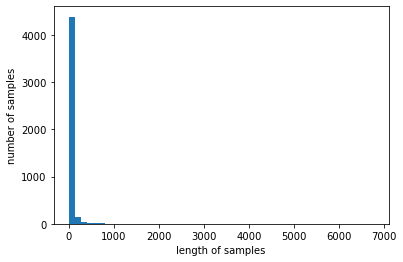

In [304]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [305]:
def create_tokenizer(texts):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_data)
    return tokenizer

In [306]:
src_tokenizer = create_tokenizer(sentences)

In [307]:
ner_tags[0]

[10121, 10121]

In [308]:
print(type(ner_tags[0][1]))

<class 'int'>


In [309]:
src_tokenizer = Tokenizer(oov_token='OOV') # 모든 단어를 사용하지만 인덱스 1에는 단어 'OOV'를 할당한다.
src_tokenizer.fit_on_texts(sentences)
tar_tokenizer = Tokenizer(lower=False) # 태깅 정보들은 내부적으로 대문자를 유지한채로 저장
tar_tokenizer.fit_on_texts(ner_tags)

In [310]:
vocab_size = len(sentences) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 4614
개체명 태깅 정보 집합의 크기 : 4614


In [311]:
X_data = src_tokenizer.texts_to_sequences(sentences)
y_data = tar_tokenizer.texts_to_sequences(ner_tags)

In [312]:
word_to_index = src_tokenizer.word_index
index_to_word = src_tokenizer.index_word
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word
index_to_ner[0] = 'PAD'

In [313]:
decoded = []
for index in X_data[0] : # 첫번째 샘플 안의 인덱스들에 대해서
    decoded.append(index_to_word[index]) # 다시 단어로 변환

print('기존의 문장 : {}'.format(sentences[0]))
print('디코딩 문장 : {}'.format(decoded))

기존의 문장 : ['farm', 'breeding']
디코딩 문장 : ['farm', 'breeding']


In [314]:
max_words =10000
max_len = 26
embedding_dim =100 # 50 차원

In [315]:
# 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.
X_data = pad_sequences(X_data, padding='post', maxlen=max_len)
y_data = pad_sequences(y_data, padding='post', maxlen=max_len)

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.3, random_state=777)

In [317]:
#y_train = to_categorical(y_train, num_classes=tag_size)
#y_test = to_categorical(y_test, num_classes=tag_size)
y_data = to_categorical(y_data, num_classes=tag_size)

In [318]:
print('훈련 샘플 레이블의 크기 : {}'.format(X_data.shape))
#print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_data.shape))
#print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
#print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 레이블의 크기 : (4613, 26)
훈련 샘플 레이블의 크기 : (4613, 26, 4614)


In [319]:
!pip install keras

In [320]:
import tensorflow.python.keras as keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from keras.models import load_model

import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

import os
import numpy as np
import matplotlib.pyplot as plt

2.5.0


In [321]:
model = Sequential()
model.add(Embedding(60000, 128, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation=('softmax'))))
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [377]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 26, 128)           7680000   
_________________________________________________________________
bidirectional (Bidirectional (None, 26, 512)           788480    
_________________________________________________________________
time_distributed (TimeDistri (None, 26, 4614)          2366982   
Total params: 10,835,462
Trainable params: 10,835,462
Non-trainable params: 0
_________________________________________________________________


In [322]:
history = model.fit(X_train, y_data, batch_size=32, epochs=10,  validation_split = 0.1, verbose = 1)

Epoch 1/10
91/91 [==============================] - 27s 245ms/step - loss: 2.7163 - accuracy: 0.4688 - val_loss: 2.6343 - val_accuracy: 0.4455
Epoch 2/10
91/91 [==============================] - 20s 221ms/step - loss: 2.0928 - accuracy: 0.4778 - val_loss: 2.8799 - val_accuracy: 0.4442
Epoch 3/10
91/91 [==============================] - 20s 221ms/step - loss: 1.9594 - accuracy: 0.4770 - val_loss: 3.1471 - val_accuracy: 0.4440
Epoch 4/10
91/91 [==============================] - 20s 220ms/step - loss: 1.8576 - accuracy: 0.4763 - val_loss: 3.3117 - val_accuracy: 0.4442
Epoch 5/10
91/91 [==============================] - 20s 220ms/step - loss: 1.7640 - accuracy: 0.4778 - val_loss: 3.4678 - val_accuracy: 0.4317
Epoch 6/10
91/91 [==============================] - 20s 224ms/step - loss: 1.7033 - accuracy: 0.4769 - val_loss: 3.5546 - val_accuracy: 0.4348
Epoch 7/10
91/91 [==============================] - 20s 221ms/step - loss: 1.6348 - accuracy: 0.4777 - val_loss: 3.6286 - val_accuracy: 0.4194

In [323]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuracy of each epoch:',acc)
epochs = range(1,len(acc)+1)

Accuracy of each epoch: [0.46882250905036926, 0.4777771234512329, 0.47697389125823975, 0.4763491451740265, 0.47783660888671875, 0.4768548905849457, 0.47774738073349, 0.4786398410797119, 0.4780746102333069, 0.4798893332481384]


In [324]:
!pip install rhinoMorph
!pip install jpype1==0.7.0

In [373]:
new_sentence = 'acidquinmeracbas powder Hydroxide '.lower().split()
new_encoded=[]
for w in new_sentence:
    try:
        new_encoded.append(word_to_index.get(w,1))
    except KeyError:
        new_encoded.append(word_to_index['OOV'])
        print("no")
      # 모델이 모르는 단어에 대해서는 'OOV'의 인덱스인 1로 인코딩

print(new_encoded)


[15643, 7, 887]


In [374]:
word_to_index

{'OOV': 1,
 'other': 2,
 'preparation': 3,
 'articles': 4,
 'food': 5,
 'preparations': 6,
 'powder': 7,
 'parts': 8,
 'assy': 9,
 'feed': 10,
 'mixed': 11,
 'steel': 12,
 'plastics': 13,
 'oil': 14,
 'tea': 15,
 'machines': 16,
 'chemical': 17,
 'system': 18,
 'plastic': 19,
 'rubber': 20,
 'extract': 21,
 'cover': 22,
 'beverage': 23,
 'textile': 24,
 'fabric': 25,
 'rice': 26,
 'module': 27,
 'juice': 28,
 'sheet': 29,
 'water': 30,
 'film': 31,
 'machine': 32,
 'motor': 33,
 'fruit': 34,
 'glass': 35,
 'machinery': 36,
 'fibres': 37,
 'acid': 38,
 'prepared': 39,
 'paper': 40,
 'supplementary': 41,
 'part': 42,
 'vegetable': 43,
 'type': 44,
 'plate': 45,
 'starch': 46,
 'vehicles': 47,
 'fabrics': 48,
 'apparatus': 49,
 'black': 50,
 'synthetic': 51,
 'exceeding': 52,
 'wire': 53,
 'liquid': 54,
 'iron': 55,
 'sugar': 56,
 'containing': 57,
 'tube': 58,
 'air': 59,
 'terminal': 60,
 'green': 61,
 'panel': 62,
 'base': 63,
 'frozen': 64,
 'potato': 65,
 'sensor': 66,
 'fittings': 6

In [375]:
new_padded = pad_sequences([new_encoded], padding="post", value=0, maxlen=max_len)

In [376]:
p = model.predict(np.array([new_padded[0]]))
p = np.argmax(p, axis=-1)
print("{:15}||{}".format("단어", "예측값"))
print(30 * "=")
for w, pred in zip(new_sentence, p[0]):
    print("{:15}: {:5}".format(w, index_to_ner[pred]))

단어             ||예측값
acidquinmeracbas: 590220
powder         : 282749
hydroxide      : 392063


In [383]:
X_data.shape

(4613, 26)

In [385]:
y_test = to_categorical(y_test, num_classes=tag_size)

In [386]:
print("result : %.4f" % (model.evaluate(X_test, y_test)[1]))

44/44 [==============================] - 5s 82ms/step - loss: 5.7159 - accuracy: 1.8293e-04
result : 0.0002
